<a href="https://colab.research.google.com/github/emanoelsp/bootcampIA/blob/main/Trabalho_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação de bibliotecas




In [166]:

#Bibliotecas

from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
from sklearn.preprocessing import MultiLabelBinarizer, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_auc_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.multioutput import MultiOutputClassifier


# Sincronização com o gooledrive

In [112]:

#Sincroniza com o google drive e carrega o dataset

drive.mount('/content/drive')

caminho_drive = '/content/drive/MyDrive/IA/DataSetTrabalho/bootcamp_train.csv'

df = pd.read_csv(caminho_drive)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Leitura do DataSet

In [113]:

# Tamanho e leitura das primeiras linhas

print(f"O dataset possui {len(df)} linhas.")

print("\n Leitura das 10 primeiras linhas")
df.head(10)


O dataset possui 3390 linhas.

 Leitura das 10 primeiras linhas


id  x_minimo  x_maximo  y_minimo  y_maximo  peso_da_placa  area_pixels  \
0   0       154     169.0    260124    260136            100           75   
1   1      1121    -186.0   1789332   1789337            100         -206   
2   2        41     216.0   2708878   2708939            100         6298   
3   3       129     157.0     86408     86427            100          276   
4   4       436     442.0   4959398    530985            100           63   
5   5       -11    -186.0    590440    590503            100         -206   
6   6        39     217.0   1359602   1359742            100        10276   
7   7        43     200.0    696884    696948            100         -206   
8   8       772     777.0   1436089   1436092            100           11   
9   9        41    -186.0   1505915   1505982            100         6494   

   perimetro_x  perimetro_y  soma_da_luminosidade  ...  \
0           27           17                9948.0  ...   
1            9         -194                2240.0  ...   
2          275          134              654634.0  ...   
3           39           26               33858.0  ...   
4           17           17                6374.0  ...   
5          198          119              637317.0  ...   
6          552          319             1187807.0  ...   
7          206          129              626256.0  ...   
8         -229            3                1398.0  ...   
9          315          145              671353.0  ...   

   indice_de_luminosidade  sigmoide_das_areas minimo_da_luminosidade falha_1  \
0                  0.0362              0.3068                    125   False   
1                  0.0294              0.1441                    115   False   
2                 -0.1879              1.0000                     42   False   
3                 -0.0416              0.8223                    115   False   
4                 -0.2096              0.2083                     90   False   
5                 -0.1895              1.0000                     45   False   
6                 -0.0970              1.0000                     25       0   
7                 -0.1925              1.0000                     45   False   
8                 -0.0071              0.1284                    111   False   
9                 -0.1923              1.0000                     38   False   

   falha_2  falha_3  falha_4  falha_5  falha_6  falha_outros  
0        0    False    False      não    False           Sim  
1    False    False     True      Não    False           Não  
2    False     True    False      não    False           Não  
3    False     True    False      não    False           Não  
4     True    False    False      Não    False           Não  
5    False     True    False      não    False           Não  
6    False     True    False      não    False           Não  
7    False     True    False      não    False           Não  
8    False    False     True      Não    False           Não  
9    False     True    False      não    False           Não  

[10 rows x 39 columns]

In [114]:

# Ler a variavel temperatura

print(df['temperatura'])


0       80.799570
1       79.790721
2       80.871970
3       77.482247
4       73.854550
          ...    
3385    95.422194
3386    89.777382
3387    76.502729
3388    72.926750
3389    79.587061
Name: temperatura, Length: 3390, dtype: float64


In [115]:

# Gerar estatísticas dos dados — qunatidade, média, desvio padrão, mínimo, quartis, máximo, quartis.

df.describe()


id      x_minimo    x_maximo      y_minimo      y_maximo  \
count  3390.000000   3390.000000  3334.00000  3.390000e+03  3.390000e+03   
mean   1694.500000    995.507375   605.90012  2.692640e+06  1.592301e+06   
std     978.753033   1796.737709   548.07724  5.625693e+06  1.821345e+06   
min       0.000000    -11.000000  -186.00000 -2.000000e+01 -1.660000e+02   
25%     847.250000     41.000000   179.00000  3.934352e+05  3.407380e+05   
50%    1694.500000    614.000000   544.00000  1.265462e+06  1.128297e+06   
75%    2541.750000   1187.500000  1090.00000  2.555025e+06  2.184335e+06   
max    3389.000000  15266.000000  1713.00000  1.041366e+08  1.291709e+07   

       peso_da_placa    area_pixels  perimetro_x   perimetro_y  \
count         3390.0    3390.000000  3390.000000   3390.000000   
mean           100.0    1566.317699    66.733923     47.261062   
std              0.0    4337.683975   195.092105    336.794632   
min            100.0    -206.000000  -229.000000   -194.000000   
25%            100.0      68.000000    12.000000     11.000000   
50%            100.0     142.000000    22.000000     21.000000   
75%            100.0     524.750000    58.000000     56.000000   
max            100.0  152655.000000  1275.000000  18152.000000   

       soma_da_luminosidade  ...  indice_de_variacao_x  indice_de_variacao_y  \
count          3.290000e+03  ...           3390.000000           3390.000000   
mean           1.931079e+05  ...              0.083130              0.192553   
std            4.549965e+05  ...              0.381303              0.473771   
min            2.550000e+02  ...             -0.905854             -1.218085   
25%            9.514500e+03  ...             -0.165640             -0.136793   
50%            1.783600e+04  ...              0.047686              0.115746   
75%            6.797800e+04  ...              0.263110              0.445916   
max            1.159141e+07  ...              2.155819              1.941325   

       indice_global_externo  log_das_areas  log_indice_x  log_indice_y  \
count            3331.000000    3390.000000   3390.000000   3390.000000   
mean                0.589012       2.476344      1.317755      1.395298   
std                 0.480665       0.772512      0.479221      0.429142   
min                 0.000000       0.301000      0.301000      0.000000   
25%                 0.000000       1.929400      1.000000      1.079200   
50%                 1.000000       2.225300      1.146100      1.322200   
75%                 1.000000       2.829625      1.477100      1.724300   
max                 1.000000       5.183700      3.074100      4.258700   

       indice_de_orientaçao  indice_de_luminosidade  sigmoide_das_areas  \
count           3390.000000             3340.000000         3390.000000   
mean               0.099153               -0.134957            0.570363   
std                0.492312                0.133175            0.335394   
min               -0.991000               -0.860300            0.119000   
25%               -0.285700               -0.193725            0.248200   
50%                0.111100               -0.140800            0.472100   
75%                0.526300               -0.079000            0.999300   
max                0.991700                0.591700            1.000000   

       minimo_da_luminosidade  
count             3390.000000  
mean               171.763422  
std                272.952080  
min                  0.000000  
25%                 71.000000  
50%                 93.000000  
75%                111.000000  
max               2086.000000  

[8 rows x 30 columns]

## Análise das váriaveis

In [116]:

# Tipo de dados de cada coluna

df.dtypes


id                                int64
x_minimo                          int64
x_maximo                        float64
y_minimo                          int64
y_maximo                          int64
peso_da_placa                     int64
area_pixels                       int64
perimetro_x                       int64
perimetro_y                       int64
soma_da_luminosidade            float64
maximo_da_luminosidade          float64
comprimento_do_transportador      int64
tipo_do_aço_A300                 object
tipo_do_aço_A400                 object
espessura_da_chapa_de_aço       float64
temperatura                     float64
index_de_bordas                 float64
index_vazio                     float64
index_quadrado                  float64
index_externo_x                 float64
indice_de_bordas_x              float64
indice_de_bordas_y              float64
indice_de_variacao_x            float64
indice_de_variacao_y            float64
indice_global_externo           float64
log_das_areas                   float64
log_indice_x                    float64
log_indice_y                    float64
indice_de_orientaçao            float64
indice_de_luminosidade          float64
sigmoide_das_areas              float64
minimo_da_luminosidade            int64
falha_1                          object
falha_2                          object
falha_3                            bool
falha_4                          object
falha_5                          object
falha_6                            bool
falha_outros                     object
dtype: object

In [117]:

# Verificar a classificação das variáveis

categorical_cols = df.select_dtypes(include=['object']).columns
print("Variáveis categoricas:")
print(categorical_cols)

numerical_cols = df.select_dtypes(include=['number']).columns
print("\nVariáveis numéricas:")
print(numerical_cols)

datetime_cols = df.select_dtypes(include=['boolean']).columns
print("\nVariáveis booleano:")
print(datetime_cols)

datetime_cols = df.select_dtypes(include=['datetime64']).columns
print("\nVariáveis de data:")
print(datetime_cols)

for col in numerical_cols:
  unique_vals = df[col].nunique()
  if unique_vals <= 10:
    print(f"\nA coluna '{col}' tem apenas {unique_vals} esses tipos de valores")
    print(df[col].value_counts())


Variáveis categoricas:
Index(['tipo_do_aço_A300', 'tipo_do_aço_A400', 'falha_1', 'falha_2', 'falha_4',
       'falha_5', 'falha_outros'],
      dtype='object')

Variáveis numéricas:
Index(['id', 'x_minimo', 'x_maximo', 'y_minimo', 'y_maximo', 'peso_da_placa',
       'area_pixels', 'perimetro_x', 'perimetro_y', 'soma_da_luminosidade',
       'maximo_da_luminosidade', 'comprimento_do_transportador',
       'espessura_da_chapa_de_aço', 'temperatura', 'index_de_bordas',
       'index_vazio', 'index_quadrado', 'index_externo_x',
       'indice_de_bordas_x', 'indice_de_bordas_y', 'indice_de_variacao_x',
       'indice_de_variacao_y', 'indice_global_externo', 'log_das_areas',
       'log_indice_x', 'log_indice_y', 'indice_de_orientaçao',
       'indice_de_luminosidade', 'sigmoide_das_areas',
       'minimo_da_luminosidade'],
      dtype='object')

Variáveis booleano:
Index(['falha_3', 'falha_6'], dtype='object')

Variáveis de data:
Index([], dtype='object')

A coluna 'peso_da_placa' tem apena

In [118]:

# Quantidade de váriaveis númericas, string e boleanas e o percentual em relacao do total

numeric_cols = df.select_dtypes(include=np.number).columns
string_cols = df.select_dtypes(include=object).columns
bool_cols = df.select_dtypes(include=bool).columns

num_numeric = len(numeric_cols)
num_string = len(string_cols)
num_bool = len(bool_cols)

total_cols = len(df.columns)

print("Total de variáveis:", len(df.columns))
print("Quantidade de variáveis numéricas:", num_numeric)
print(f"Percentual de váriáveis numéricas: {(num_numeric/total_cols)*100:.2f}%")
print("Quantidade de variáveis string:", num_string)
print(f"Percentual de variáveis string: {(num_string/total_cols)*100:.2f}%")
print("Quantidade de variáveis booleanas:", num_bool)
print(f"Percentual de variáveis booleanas: {(num_bool/total_cols)*100:.2f}%")


Total de variáveis: 39
Quantidade de variáveis numéricas: 30
Percentual de váriáveis numéricas: 76.92%
Quantidade de variáveis string: 7
Percentual de variáveis string: 17.95%
Quantidade de variáveis booleanas: 2
Percentual de variáveis booleanas: 5.13%


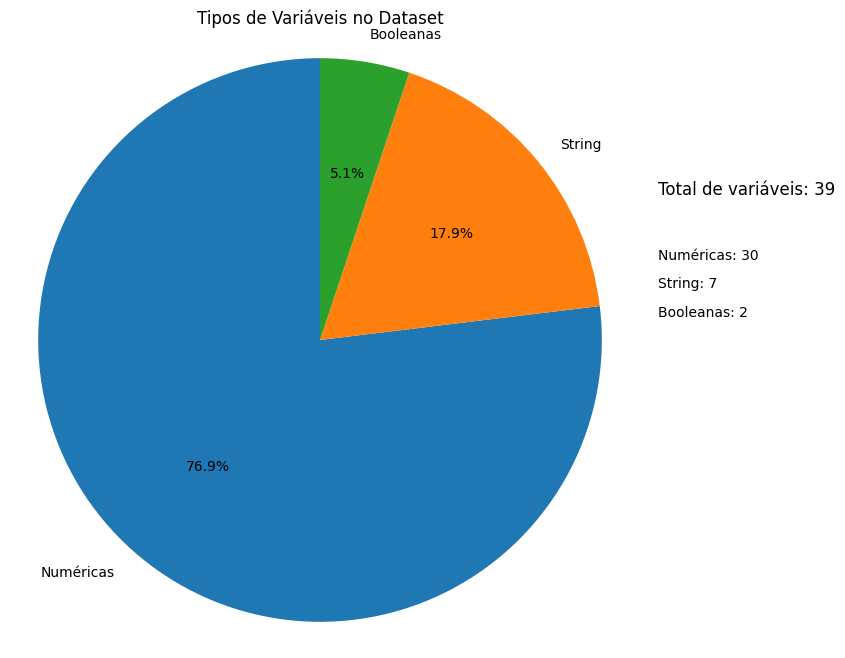

In [119]:

# Gráfico da distribuição dos tipos de variáveis

tipo_variaveis = {
    'Numéricas': num_numeric,
    'String': num_string,
    'Booleanas': num_bool
}

plt.figure(figsize=(8, 8))
plt.pie(tipo_variaveis.values(), labels=tipo_variaveis.keys(), autopct='%1.1f%%', startangle=90)
plt.title('Tipos de Variáveis no Dataset')

# Adicionando as estatísticas no gráfico
total_variaveis = num_numeric + num_string + num_bool
plt.text(1.2, 0.5, f"Total de variáveis: {total_variaveis}\n", fontsize=12, ha='left', va='center')
plt.text(1.2, 0.3, f"Numéricas: {num_numeric}", fontsize=10, ha='left', va='center')
plt.text(1.2, 0.2, f"String: {num_string}", fontsize=10, ha='left', va='center')
plt.text(1.2, 0.1, f"Booleanas: {num_bool}", fontsize=10, ha='left', va='center')


plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [120]:

# Leitura das váriaveis com dados true e false

df[['tipo_do_aço_A300', 'tipo_do_aço_A400', 'falha_1', 'falha_2', 'falha_3', 'falha_4', 'falha_5', 'falha_6', 'falha_outros']]


tipo_do_aço_A300 tipo_do_aço_A400 falha_1 falha_2  falha_3 falha_4  \
0                 Não              sim   False       0    False   False   
1                 Não              sim   False   False    False    True   
2                 não              sim   False   False     True   False   
3                 Não              Sim   False   False     True   False   
4                   1              Não   False    True    False   False   
...               ...              ...     ...     ...      ...     ...   
3385              Não              Sim   False   False    False   False   
3386              Não              Sim       0   False    False   False   
3387              Sim              Não   False   False    False   False   
3388              não              Sim   False       0    False   False   
3389              Não              Sim   False   False    False   False   

     falha_5  falha_6 falha_outros  
0        não    False          Sim  
1        Não    False          Não  
2        não    False          Não  
3        não    False          Não  
4        Não    False          Não  
...      ...      ...          ...  
3385     não     True          Não  
3386     não    False          Sim  
3387     Não     True          Não  
3388     Não    False          Sim  
3389     Não    False          Sim  

[3390 rows x 9 columns]

In [121]:

# Quantidade de dados para cada tipo de dado nas colunas de falhas

failure_columns = ['tipo_do_aço_A300', 'tipo_do_aço_A400','falha_1', 'falha_2', 'falha_3', 'falha_4', 'falha_5', 'falha_6', 'falha_outros']  # Exemplo

for col in failure_columns:
    if col in df.columns:
        print(f"\nContagem de valores para a coluna '{col}':")
        print(df[col].value_counts())
    else:
        print(f"Coluna '{col}' não encontrada no DataFrame.")



Contagem de valores para a coluna 'tipo_do_aço_A300':
tipo_do_aço_A300
Não    1169
Sim     802
não     770
sim     537
N        40
0        39
1        27
-         6
Name: count, dtype: int64

Contagem de valores para a coluna 'tipo_do_aço_A400':
tipo_do_aço_A400
Sim    1142
Não     772
sim     757
não     513
S        40
1        39
nao      26
0        25
Name: count, dtype: int64

Contagem de valores para a coluna 'falha_1':
falha_1
False    2992
True      265
nao        62
0          61
1           5
S           5
Name: count, dtype: int64

Contagem de valores para a coluna 'falha_2':
falha_2
False    3064
True      249
0          62
y           5
1           5
S           5
Name: count, dtype: int64

Contagem de valores para a coluna 'falha_3':
falha_3
False    2741
True      649
Name: count, dtype: int64

Contagem de valores para a coluna 'falha_4':
falha_4
False    3145
True      112
nao        65
0          64
S           2
1           2
Name: count, dtype: int64

Contagem de

In [122]:

# Padronização dos multirotulos

colunas_falhas = [col for col in df.columns if "falha" in col]

df[colunas_falhas] = df[colunas_falhas].applymap(
    lambda x: str(x).strip().lower() in ['true', '1', 'sim', 'yes']
)

colunas_falhas = [col for col in df.columns if "tipo_do_aço" in col]

df[colunas_falhas] = df[colunas_falhas].applymap(
    lambda x: str(x).strip().lower() in ['true', '1', 'sim', 'yes']
)


<ipython-input-122-e6ad366f20f3>:5: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-122-e6ad366f20f3>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [123]:

# Verificar se alguma linha  possui mais de um tipo de falha ao mesmo tempo

failure_cols = ['falha_1', 'falha_2', 'falha_3', 'falha_4', 'falha_5', 'falha_6', 'falha_outros']

rows_with_multiple_failures = df[df[failure_cols].sum(axis=1) > 1]

print("\nLinhas com multiplas falhas", rows_with_multiple_failures)

print("\nNúmero de linhas com multiplas falhas:", len(rows_with_multiple_failures))



Linhas com multiplas falhas Empty DataFrame
Columns: [id, x_minimo, x_maximo, y_minimo, y_maximo, peso_da_placa, area_pixels, perimetro_x, perimetro_y, soma_da_luminosidade, maximo_da_luminosidade, comprimento_do_transportador, tipo_do_aço_A300, tipo_do_aço_A400, espessura_da_chapa_de_aço, temperatura, index_de_bordas, index_vazio, index_quadrado, index_externo_x, indice_de_bordas_x, indice_de_bordas_y, indice_de_variacao_x, indice_de_variacao_y, indice_global_externo, log_das_areas, log_indice_x, log_indice_y, indice_de_orientaçao, indice_de_luminosidade, sigmoide_das_areas, minimo_da_luminosidade, falha_1, falha_2, falha_3, falha_4, falha_5, falha_6, falha_outros]
Index: []

[0 rows x 39 columns]

Número de linhas com multiplas falhas: 0


In [124]:

# Rmover linhas que 'tipo_do_aço_A300' e 'tipo_do_aço_A400' são ambos True ou ambos False

rows_to_remove = df[
    ((df['tipo_do_aço_A300'] == True) & (df['tipo_do_aço_A400'] == True)) |
    ((df['tipo_do_aço_A300'] == False) & (df['tipo_do_aço_A400'] == False))
]

print("IDs das linhas a serem removidas:")
print(rows_to_remove['id'])

print("\nQuantidade de linhas:")
print(len(rows_to_remove['id']))

df = df[
    ~((df['tipo_do_aço_A300'] == True) & (df['tipo_do_aço_A400'] == True)) &
    ~((df['tipo_do_aço_A300'] == False) & (df['tipo_do_aço_A400'] == False))
]

print("\nNúmero de linhas após a remoção:")
print(len(df))

IDs das linhas a serem removidas:
32        32
62        62
152      152
360      360
393      393
        ... 
3286    3286
3314    3314
3346    3346
3367    3367
3379    3379
Name: id, Length: 86, dtype: int64

Quantidade de linhas:
86

Número de linhas após a remoção:
3304


## Análise dos dados nulos ou vazio

In [125]:

# Ver um resumo do DataFrame: número da coluna, nome da coluna, quantidade de dados não nulos, tipo de dados.

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3304 entries, 0 to 3389
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            3304 non-null   int64  
 1   x_minimo                      3304 non-null   int64  
 2   x_maximo                      3250 non-null   float64
 3   y_minimo                      3304 non-null   int64  
 4   y_maximo                      3304 non-null   int64  
 5   peso_da_placa                 3304 non-null   int64  
 6   area_pixels                   3304 non-null   int64  
 7   perimetro_x                   3304 non-null   int64  
 8   perimetro_y                   3304 non-null   int64  
 9   soma_da_luminosidade          3209 non-null   float64
 10  maximo_da_luminosidade        3206 non-null   float64
 11  comprimento_do_transportador  3304 non-null   int64  
 12  tipo_do_aço_A300              3304 non-null   bool   
 13  tipo_do_

In [126]:

# Linhas com valores nulo ou vazio

rows_with_nulls = df.isnull().any(axis=1).sum()
rows_with_empty_strings = (df == '').any(axis=1).sum()
rows_with_nulls_or_empty = rows_with_nulls + rows_with_empty_strings

total_rows = len(df)
percentage_nulls_or_empty = (rows_with_nulls_or_empty / total_rows) * 100

print(f"Quantidade de linhas com valores nulo ou vazio: {rows_with_nulls_or_empty}")
print(f"Percentual de linhas com valores nulo ou vazio: {percentage_nulls_or_empty:.2f}%")


Quantidade de linhas com valores nulo ou vazio: 409
Percentual de linhas com valores nulo ou vazio: 12.38%


In [127]:

# Gráfico de Distribuição dos dados

rows_with_nulls = df.isnull().any(axis=1).sum()
rows_with_empty_strings = (df == '').any(axis=1).sum()
rows_with_nulls_or_empty = rows_with_nulls + rows_with_empty_strings
total_rows = len(df)

labels = ['Dados nulos ', 'Dados populados']
values = [rows_with_nulls_or_empty, total_rows - rows_with_nulls_or_empty]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="Distribuição dos dados nulos ou vazio",
                   annotations=[dict(text=f"Total de dados: {total_rows}",
                                    x=0.5, y=-0.15,
                                    font_size=12, showarrow=False)])
fig.show()


In [128]:

# Remover do dataset as linhas com valores nulo ou vazio

df = df.dropna()
df = df.replace('', np.nan).dropna()

print(f"O novo dataset possui {len(df)} linhas.")


O novo dataset possui 2895 linhas.


# Analise de valores negativos

In [129]:

# Lista das váriaveis que possuem valores negativos

variaveis_negativas = []

for coluna in df.select_dtypes(include=np.number).columns:
  if (df[coluna] < 0).any():
    variaveis_negativas.append(coluna)

print("Variáveis com valores negativos:")
for variaveis_negativas in variaveis_negativas:
  print(variaveis_negativas)


Variáveis com valores negativos:
x_minimo
x_maximo
y_minimo
y_maximo
area_pixels
perimetro_x
perimetro_y
comprimento_do_transportador
espessura_da_chapa_de_aço
indice_de_variacao_x
indice_de_variacao_y
indice_de_orientaçao
indice_de_luminosidade


In [130]:
# Ver linhas com pelo menos um valor negativo

columns_to_check = [
    'area_pixels',
    'perimetro_x',
    'perimetro_y',
    'comprimento_do_transportador',
    'espessura_da_chapa_de_aço'
]

negative_mask = (df[columns_to_check] < 0).any(axis=1)

total_negative_rows = negative_mask.sum()

print(f"Total de linhas com pelo menos um \n valor negativo nas colunas especificadas: {total_negative_rows}")
print(f"Percentual de linhas problemáticas: {(total_negative_rows / len(df)) * 100:.2f}%")


Total de linhas com pelo menos um 
 valor negativo nas colunas especificadas: 1015
Percentual de linhas problemáticas: 35.06%


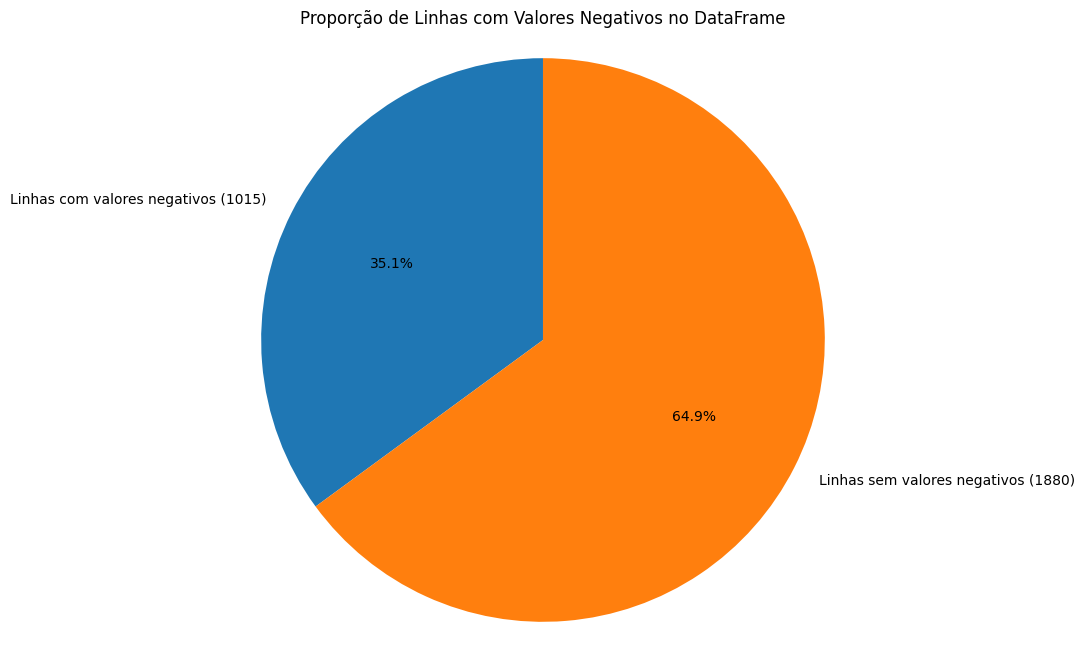

In [131]:

# Gráfico com a relacao aos dados accima e o total do data frame

total_rows = len(df)

plt.figure(figsize=(8, 8))
plt.pie([total_negative_rows, total_rows - total_negative_rows],
        labels=[f"Linhas com valores negativos ({total_negative_rows})",
                f"Linhas sem valores negativos ({total_rows - total_negative_rows})"],
        autopct='%1.1f%%', startangle=90)
plt.title('Proporção de Linhas com Valores Negativos no DataFrame')
plt.axis('equal')
plt.show()


In [132]:

# Desvio padrao das variaveis

std_values = df.describe().loc[['std'], ['area_pixels', 'perimetro_x', 'perimetro_y', 'comprimento_do_transportador', 'espessura_da_chapa_de_aço']]

std_values = std_values.transpose()

for col in std_values.index:
    std = std_values.loc[col, 'std']
    mean = df[col].mean()
    if mean != 0:
      percentage = (std / mean) * 100
    else:
      percentage = 0
    print(f"Variável: {col}")
    print(f"STD: {std:.2f}")
    print(f"Percentual: {percentage:.2f}% \n")


Variável: area_pixels
STD: 4462.46
Percentual: 279.14% 

Variável: perimetro_x
STD: 189.25
Percentual: 273.50% 

Variável: perimetro_y
STD: 359.09
Percentual: 743.72% 

Variável: comprimento_do_transportador
STD: 459.43
Percentual: 34.27% 

Variável: espessura_da_chapa_de_aço
STD: 82.32
Percentual: 147.58% 



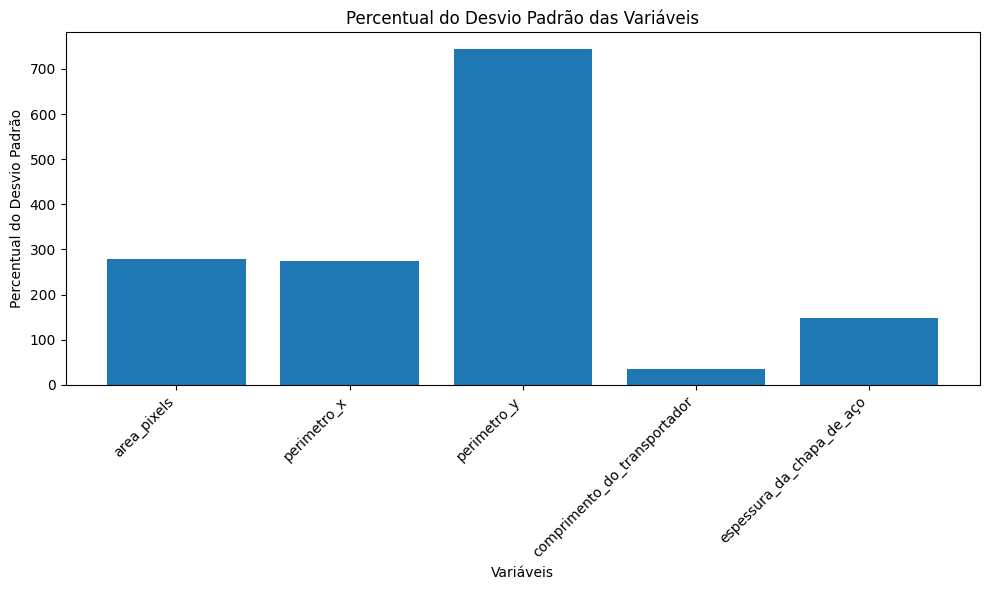

In [133]:

# Gráfico do percentual do desvio padrão das variaveis acima

std_values = df.describe().loc[['std'], ['area_pixels', 'perimetro_x', 'perimetro_y', 'comprimento_do_transportador', 'espessura_da_chapa_de_aço']]
std_values = std_values.transpose()

percentages = []
for col in std_values.index:
    std = std_values.loc[col, 'std']
    mean = df[col].mean()
    if mean != 0:
      percentage = (std / mean) * 100
    else:
      percentage = 0
    percentages.append(percentage)

plt.figure(figsize=(10, 6))
plt.bar(std_values.index, percentages)
plt.xlabel("Variáveis")
plt.ylabel("Percentual do Desvio Padrão")
plt.title("Percentual do Desvio Padrão das Variáveis")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [137]:

# Substituir pela média a variavel comprimento do trasnportado

mean_comprimento = df.loc[df['comprimento_do_transportador']
                          >= 0, 'comprimento_do_transportador'].mean()

df.loc[df['comprimento_do_transportador']
       < 0, 'comprimento_do_transportador'] = mean_comprimento


In [135]:

# Substituir pela média a variavel espessura da chapa de aço

mean_espessura = df.loc[df['espessura_da_chapa_de_aço'] >= 0,
                        'espessura_da_chapa_de_aço'].mean()

df.loc[df['espessura_da_chapa_de_aço']
       < 0, 'espessura_da_chapa_de_aço'] = mean_espessura


In [139]:

# Excluir as linhas em que aparecem valores negativos para as variaveis  'area_pixels', perimetro_x, perimetro_y

df = df[(df['area_pixels'] >= 0) & (df['perimetro_x'] >= 0)
& (df['perimetro_y'] >= 0)]


## Padronização/Normalização

In [141]:
# prompt: faça a padronização / normalizacao das classes

numerical_cols_to_scale = ['area_pixels', 'perimetro_x', 'perimetro_y',
                           'comprimento_do_transportador', 'espessura_da_chapa_de_aço',
                           'temperatura']

scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

df_scaled = df.copy()
df_scaled[numerical_cols_to_scale] = scaler.fit_transform(df[numerical_cols_to_scale])

print("\nDataFrame normalizado (StandardScaler):")
df_scaled.head()



DataFrame normalizado (StandardScaler):


id  x_minimo  x_maximo  y_minimo  y_maximo  peso_da_placa  area_pixels  \
0   0       154     169.0    260124    260136            100    -0.453513   
2   2        41     216.0   2708878   2708939            100     1.279197   
3   3       129     157.0     86408     86427            100    -0.397547   
4   4       436     442.0   4959398    530985            100    -0.456854   
6   6        39     217.0   1359602   1359742            100     2.386817   

   perimetro_x  perimetro_y  soma_da_luminosidade  ...  \
0    -0.411774    -0.473908                9948.0  ...   
2     1.012265     0.627119              654634.0  ...   
3    -0.342869    -0.389213               33858.0  ...   
4    -0.469195    -0.473908                6374.0  ...   
6     2.602824     2.368059             1187807.0  ...   

   indice_de_luminosidade  sigmoide_das_areas  minimo_da_luminosidade  \
0                  0.0362              0.3068                     125   
2                 -0.1879              1.0000                      42   
3                 -0.0416              0.8223                     115   
4                 -0.2096              0.2083                      90   
6                 -0.0970              1.0000                      25   

   falha_1  falha_2  falha_3  falha_4  falha_5  falha_6  falha_outros  
0    False    False    False    False    False    False          True  
2    False    False     True    False    False    False         False  
3    False    False     True    False    False    False         False  
4    False     True    False    False    False    False         False  
6    False    False     True    False    False    False         False  

[5 rows x 39 columns]



## Análise de valores duplicados nas linhas



In [142]:

# Verificação se existe alguma linha com valor duplicado

duplicate_rows = df[df.duplicated(
    subset=df.columns.difference(['id']), keep=False)]

print(duplicate_rows)

if not duplicate_rows.empty:
  print("\nLinhas com valores duplicados:")
  print(duplicate_rows)
else:
  print("\nNão existem linhas com valores duplicados.")


Empty DataFrame
Columns: [id, x_minimo, x_maximo, y_minimo, y_maximo, peso_da_placa, area_pixels, perimetro_x, perimetro_y, soma_da_luminosidade, maximo_da_luminosidade, comprimento_do_transportador, tipo_do_aço_A300, tipo_do_aço_A400, espessura_da_chapa_de_aço, temperatura, index_de_bordas, index_vazio, index_quadrado, index_externo_x, indice_de_bordas_x, indice_de_bordas_y, indice_de_variacao_x, indice_de_variacao_y, indice_global_externo, log_das_areas, log_indice_x, log_indice_y, indice_de_orientaçao, indice_de_luminosidade, sigmoide_das_areas, minimo_da_luminosidade, falha_1, falha_2, falha_3, falha_4, falha_5, falha_6, falha_outros]
Index: []

[0 rows x 39 columns]

Não existem linhas com valores duplicados.


## Analise de valores duplicados nas colnas

In [143]:

# Verificação se tem colunas em que todos os valores são iguais

constant_columns = []
for col in df.columns:
  if len(df[col].unique()) == 1:
    constant_columns.append(col)

if constant_columns:
  print("Existem colunas com valores iguais:")
  for col in constant_columns:
    print(col)
else:
  print("Não existem colunas com valores iguais")


Existem colunas com valores iguais:
peso_da_placa


In [144]:

# Excluir a coluna retornada peso_placa

if 'peso_da_placa' in df.columns:
    df = df.drop('peso_da_placa', axis=1)
    print("Coluna peso_da_placa excluída")
else:
    print("Erro ao excluir a coluna peso_da_placa")


Coluna peso_da_placa excluída


## Analise de perímetro e área

In [145]:

# Verificacao do perimetro calculado x perimetro do data set

perimetro_x_calculado = df['x_maximo'] - df['x_minimo']

perimetro_y_calculado = df['y_maximo'] - df['y_minimo']

comparison_df = pd.DataFrame({
    'perimetro_x_calculado': perimetro_x_calculado,
    'perimetro_x_dataset': df['perimetro_x'],
    'perimetro_y_calculado': perimetro_y_calculado,
    'perimetro_y_dataset': df['perimetro_y']
})

different_values = comparison_df[
    (comparison_df['perimetro_x_calculado'] != comparison_df['perimetro_x_dataset']) |
    (comparison_df['perimetro_y_calculado'] != comparison_df['perimetro_y_dataset'])
]

different_values


perimetro_x_calculado  perimetro_x_dataset  perimetro_y_calculado  \
0                      15.0                   27                     12   
2                     175.0                  275                     61   
3                      28.0                   39                     19   
4                       6.0                   17               -4428413   
6                     178.0                  552                    140   
...                     ...                  ...                    ...   
3382                   14.0                   24               -2878797   
3383                    9.0                   10                     59   
3385                   23.0                  177                     29   
3386                  147.0                  248                     47   
3389                   10.0                    5                      8   

      perimetro_y_dataset  
0                      17  
2                     134  
3                      26  
4                      17  
6                     319  
...                   ...  
3382                   15  
3383                   10  
3385                   17  
3386                  116  
3389                    5  

[2203 rows x 4 columns]

In [146]:

# Incidencia de perimetro calculado diferente do perfimetro do data set

count_x = len(different_values[different_values['perimetro_x_calculado'] == different_values['perimetro_x_dataset']])

count_y = len(different_values[different_values['perimetro_y_calculado'] == different_values['perimetro_y_dataset']])

print("Number of variables where perimetro_x_calculado equals perimetro_x_dataset:", count_x)
print("Number of variables where perimetro_y_calculado equals perimetro_y_dataset:", count_y)


Number of variables where perimetro_x_calculado equals perimetro_x_dataset: 47
Number of variables where perimetro_y_calculado equals perimetro_y_dataset: 357


## Analise indice maximo menor que indice mínimo

In [147]:

# Linhas onde as váriaveis minimo e máximo são inversas

x_min_maior_x_max = df[df['x_minimo'] > df['x_maximo']]
print("Linhas onde x_minimo maior que x_maximo:")
print(x_min_maior_x_max[['id', 'x_minimo', 'x_maximo']])

y_min_maior_y_max = df[df['y_minimo'] > df['y_maximo']]
print("\nLinhas onde y_minimo maior que y_maximo:")
print(y_min_maior_y_max[['id', 'y_minimo', 'y_maximo']])



Linhas onde x_minimo maior que x_maximo:
        id  x_minimo  x_maximo
9        9        41    -186.0
10      10       843    -186.0
14      14      5261     643.0
17      17      7734    1103.0
29      29       251    -186.0
...    ...       ...       ...
3317  3317       847    -186.0
3332  3332       981    -186.0
3336  3336       860    -186.0
3340  3340     10659    1071.0
3370  3370      2024     211.0

[391 rows x 3 columns]

Linhas onde y_minimo maior que y_maximo:
        id  y_minimo  y_maximo
4        4   4959398    530985
18      18   1863816      -166
22      22   1723382      -166
30      30   2113679      -166
36      36  16578476   2636459
...    ...       ...       ...
3366  3366    439180      -166
3369  3369   8301415   1136924
3375  3375   5996730      -166
3380  3380    200030      -166
3382  3382   3223626    344829

[441 rows x 3 columns]


In [148]:

# Total de cada Linhas onde minimo e máximo são inversos

x_min_maior_x_max = df[df['x_minimo'] > df['x_maximo']]
count_x_min_maior_x_max = len(x_min_maior_x_max)
print(f"Total de linhas onde x_minimo > x_maximo: {count_x_min_maior_x_max}")

y_min_maior_y_max = df[df['y_minimo'] > df['y_maximo']]
count_y_min_maior_y_max = len(y_min_maior_y_max)
print(f"Total de linhas onde y_minimo > y_maximo: {count_y_min_maior_y_max}")


Total de linhas onde x_minimo > x_maximo: 391
Total de linhas onde y_minimo > y_maximo: 441


## Verificação de outliers

In [149]:

# Numero de outliers por variável

def count_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

numerical_cols = df.select_dtypes(include=['number']).columns
outlier_counts = {}
for col in numerical_cols:
    outlier_counts[col] = count_outliers(df, col)

print("Number of outliers per variable:")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")


Number of outliers per variable:
id: 0
x_minimo: 111
x_maximo: 0
y_minimo: 227
y_maximo: 101
area_pixels: 447
perimetro_x: 450
perimetro_y: 210
soma_da_luminosidade: 457
maximo_da_luminosidade: 200
comprimento_do_transportador: 0
espessura_da_chapa_de_aço: 228
temperatura: 15
index_de_bordas: 0
index_vazio: 15
index_quadrado: 0
index_externo_x: 426
indice_de_bordas_x: 0
indice_de_bordas_y: 0
indice_de_variacao_x: 104
indice_de_variacao_y: 57
indice_global_externo: 0
log_das_areas: 20
log_indice_x: 254
log_indice_y: 1
indice_de_orientaçao: 0
indice_de_luminosidade: 155
sigmoide_das_areas: 0
minimo_da_luminosidade: 214


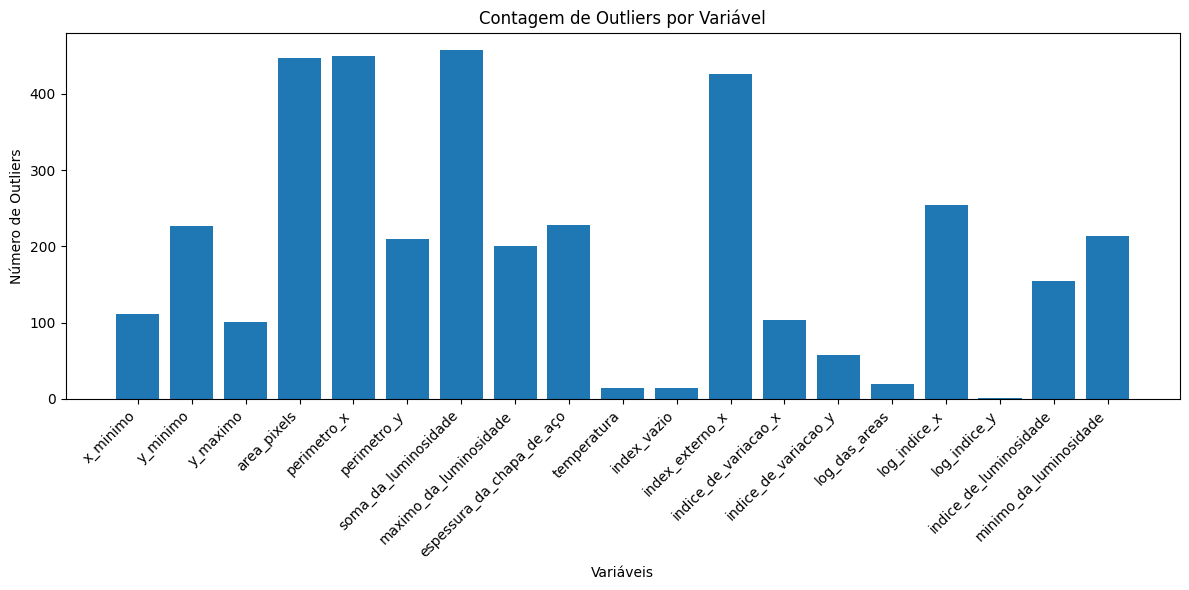

In [150]:

# Gráfico dos outliers, somente para variáveis com outliers

import matplotlib.pyplot as plt

numerical_cols = df.select_dtypes(include=['number']).columns
outlier_counts = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

# Filtrar variáveis com outliers
outlier_counts_filtered = {k: v for k, v in outlier_counts.items() if v > 0}

plt.figure(figsize=(12, 6))
plt.bar(outlier_counts_filtered.keys(), outlier_counts_filtered.values())
plt.xlabel("Variáveis")
plt.ylabel("Número de Outliers")
plt.title("Contagem de Outliers por Variável")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [151]:

# Outliers mais distantes

def get_max_outlier_distance(df):


    numerical_cols = df.select_dtypes(include=['number']).columns
    max_distances = {}

    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        if not outliers.empty:
            # Calculate distances of outliers from the bounds
            lower_distances = lower_bound - outliers.loc[outliers[col] < lower_bound, col]
            upper_distances = outliers.loc[outliers[col] > upper_bound, col] - upper_bound

            distances = pd.concat([lower_distances, upper_distances])
            max_distances[col] = distances.max()
        else:
            max_distances[col] = 0  # No outliers

    return max_distances

max_outlier_distances = get_max_outlier_distance(df)
max_outlier_distances


{'id': 0,
 'x_minimo': 10698.0,
 'x_maximo': 0,
 'y_minimo': 98386374.5,
 'y_maximo': 7926292.5,
 'area_pixels': 35695.0,
 'perimetro_x': 1127.5,
 'perimetro_y': 747.5,
 'soma_da_luminosidade': 3758684.0,
 'maximo_da_luminosidade': 100.5,
 'comprimento_do_transportador': 0,
 'espessura_da_chapa_de_aço': 160.0,
 'temperatura': 14.805299427086425,
 'index_de_bordas': 0,
 'index_vazio': 0.16279999999999983,
 'index_quadrado': 0,
 'index_externo_x': 0.83255,
 'indice_de_bordas_x': 0,
 'indice_de_bordas_y': 0,
 'indice_de_variacao_x': 1.2458746679107293,
 'indice_de_variacao_y': 0.6286177134404636,
 'indice_global_externo': 0,
 'log_das_areas': 0.33804999999999996,
 'log_indice_x': 0.8813499999999999,
 'log_indice_y': 0.06379999999999963,
 'indice_de_orientaçao': 0,
 'indice_de_luminosidade': 0.49865,
 'sigmoide_das_areas': 0,
 'minimo_da_luminosidade': 1916.0}

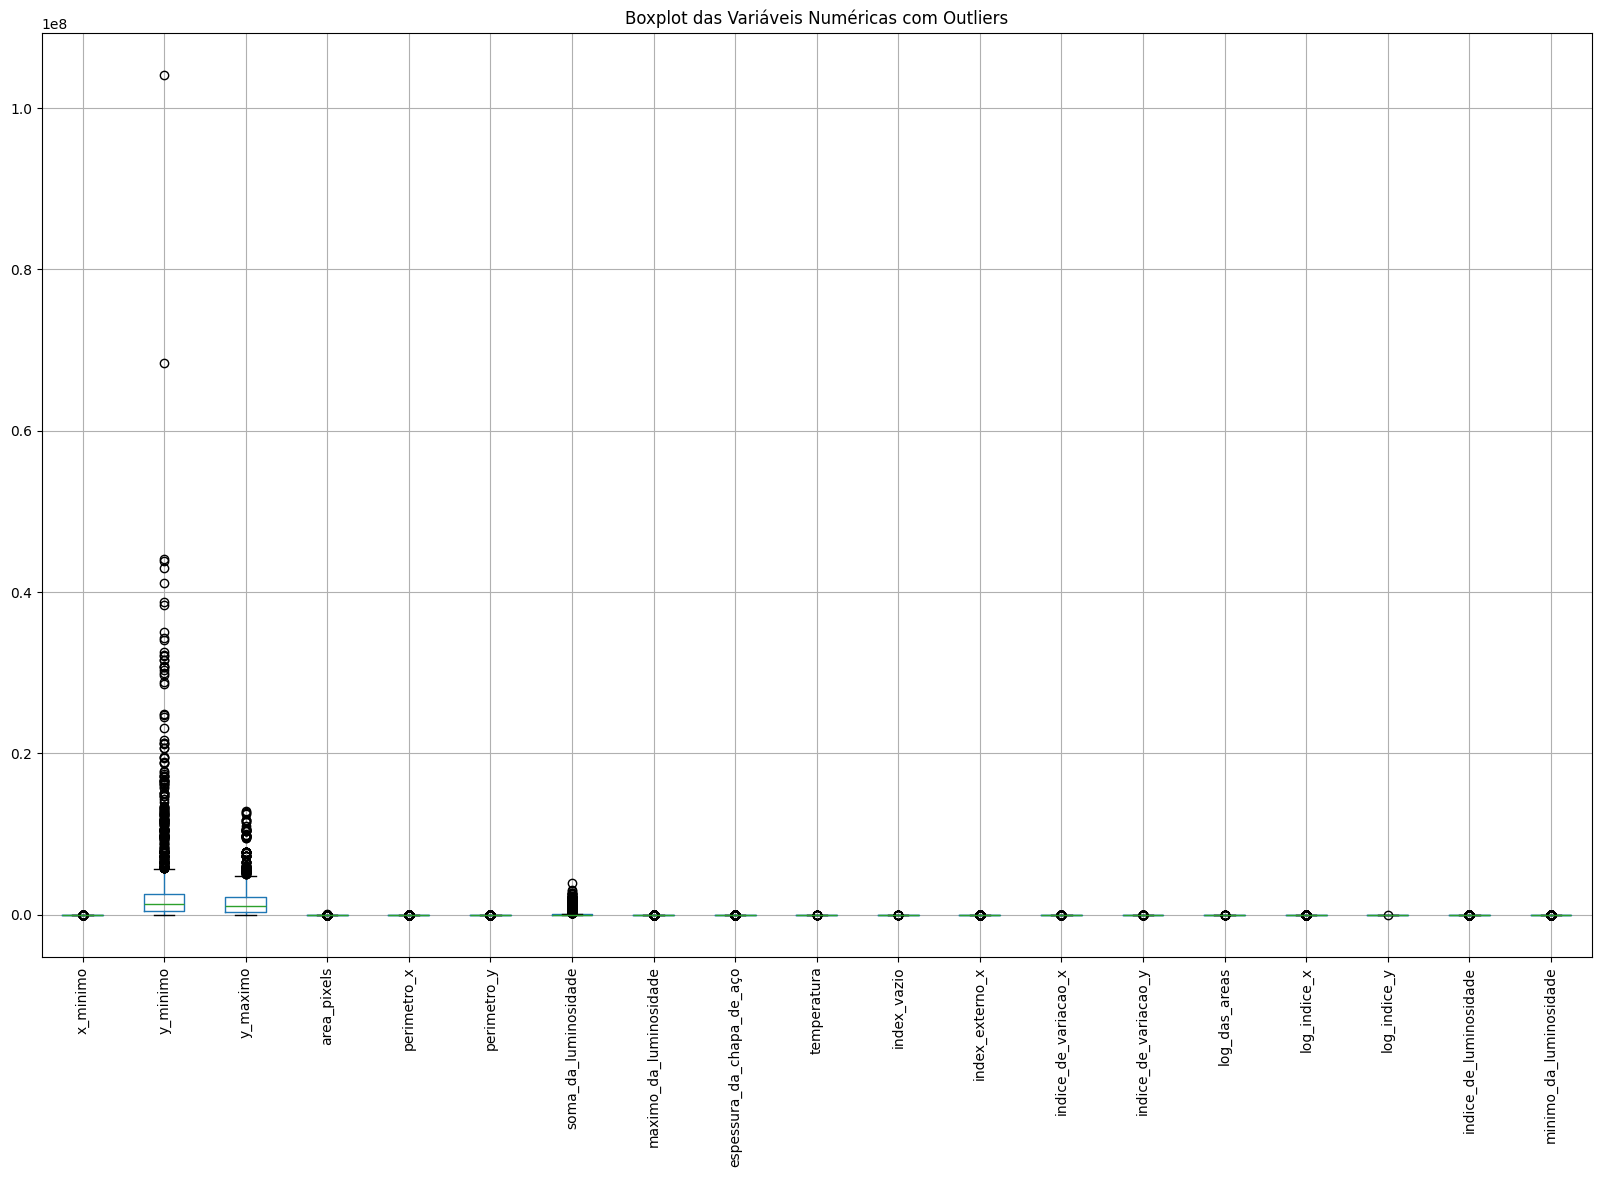

   id  x_minimo  x_maximo  y_minimo  y_maximo  area_pixels  perimetro_x  \
0   0       154     169.0    260124    260136           75           27   
2   2        41     216.0   2708878   2708939         6298          275   
3   3       129     157.0     86408     86427          276           39   
4   4       436     442.0   4959398    530985           63           17   
6   6        39     217.0   1359602   1359742        10276          552   

   perimetro_y  soma_da_luminosidade  maximo_da_luminosidade  ...  \
0           17                9948.0                   143.0  ...   
2          134              654634.0                   126.0  ...   
3           26               33858.0                   135.0  ...   
4           17                6374.0                   116.0  ...   
6          319             1187807.0                   141.0  ...   

   indice_de_luminosidade  sigmoide_das_areas  minimo_da_luminosidade  \
0                  0.0362              0.3068                

In [152]:
# Gráfico das colunas numéricas com outliers
outlier_cols = [col for col, count in outlier_counts.items() if count > 0]
df_outliers = df[outlier_cols]
df_outliers = df_outliers.copy()


plt.figure(figsize=(20, 12))
df_outliers.boxplot(rot=90)
plt.title('Boxplot das Variáveis Numéricas com Outliers')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

print(df.head())


In [153]:

# Remover outliers mais distantes

Q1_ymin = df['y_minimo'].quantile(0.25)
Q3_ymin = df['y_minimo'].quantile(0.75)
IQR_ymin = Q3_ymin - Q1_ymin

Q1_ymax = df['y_maximo'].quantile(0.25)
Q3_ymax = df['y_maximo'].quantile(0.75)
IQR_ymax = Q3_ymax - Q1_ymax

lower_bound_ymin = Q1_ymin - 0.2 * IQR_ymin
upper_bound_ymin = Q3_ymin + 0.2 * IQR_ymin
lower_bound_ymax = Q1_ymax - 0.2 * IQR_ymax
upper_bound_ymax = Q3_ymax + 0.2 * IQR_ymax

print(f"Linhas antes de remover outliers: {len(df)}")

df = df[
    (df['y_minimo'] >= lower_bound_ymin) & (df['y_minimo'] <= upper_bound_ymin) &
    (df['y_maximo'] >= lower_bound_ymax) & (df['y_maximo'] <= upper_bound_ymax)
    ]

print(f"Linhas depois de remover outliers: {len(df)}")


Linhas antes de remover outliers: 2225
Linhas depois de remover outliers: 1635


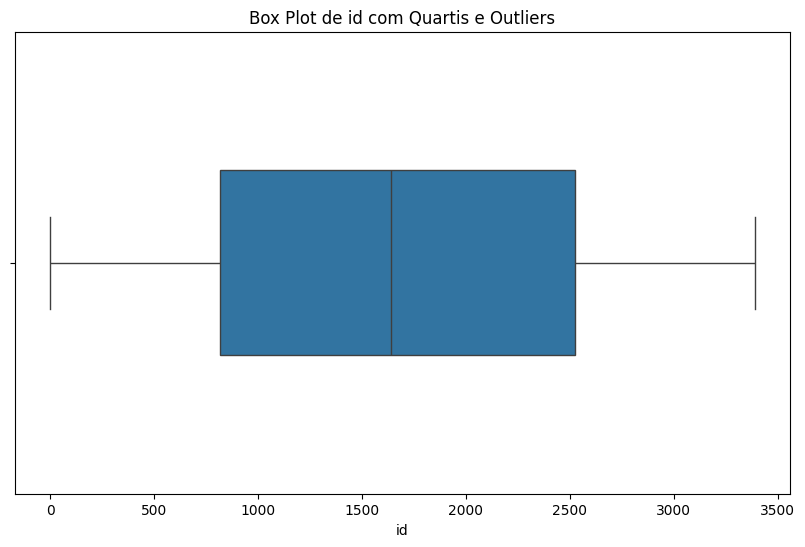

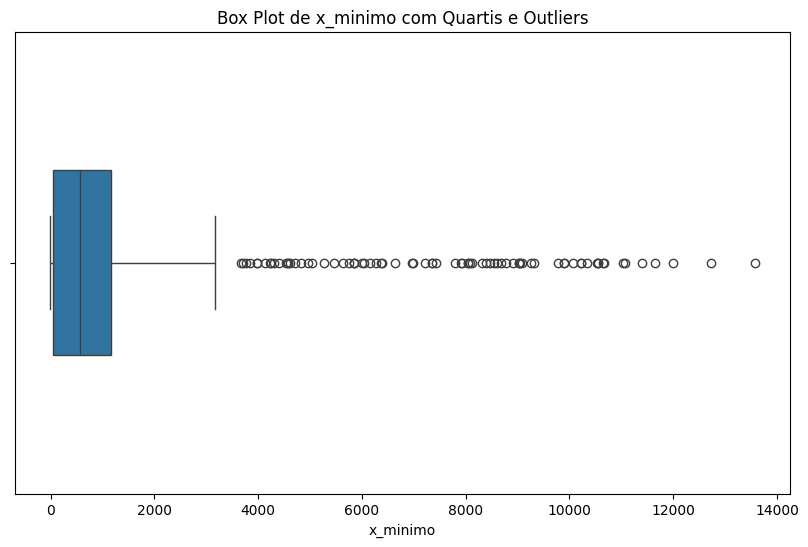

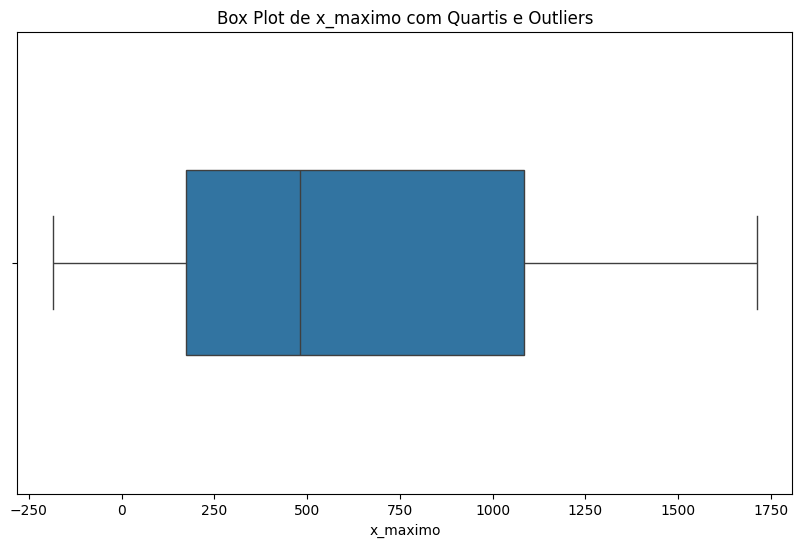

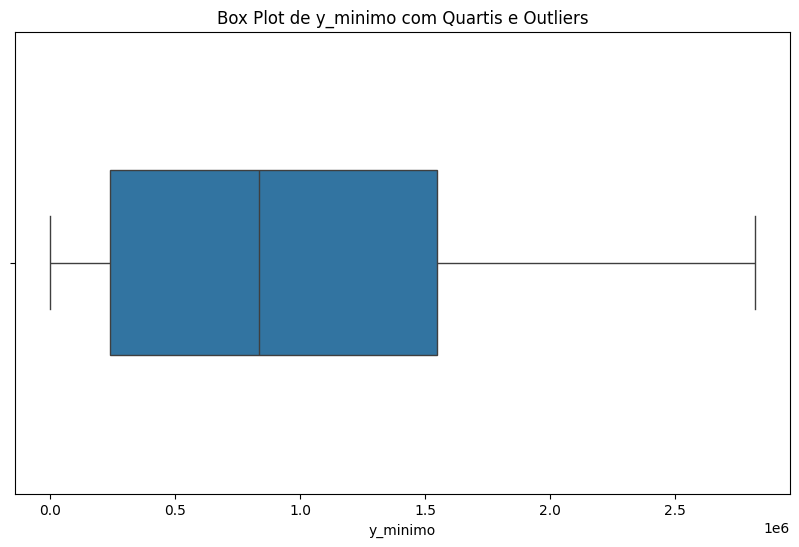

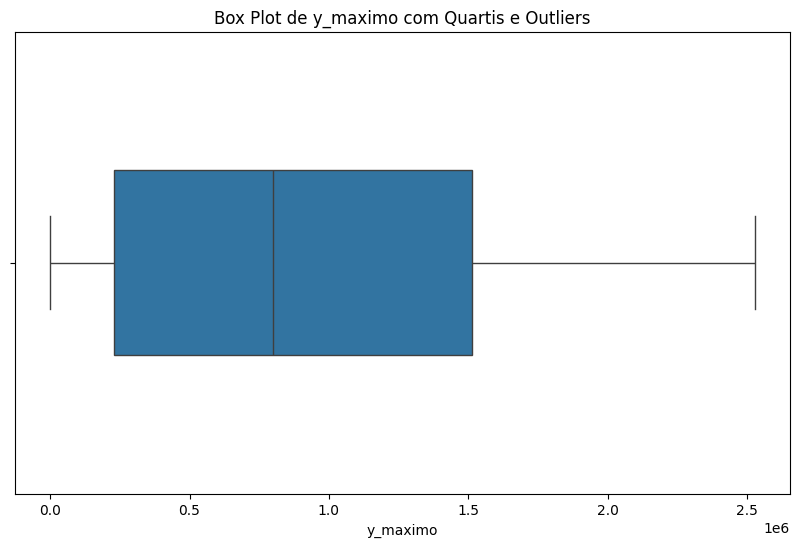

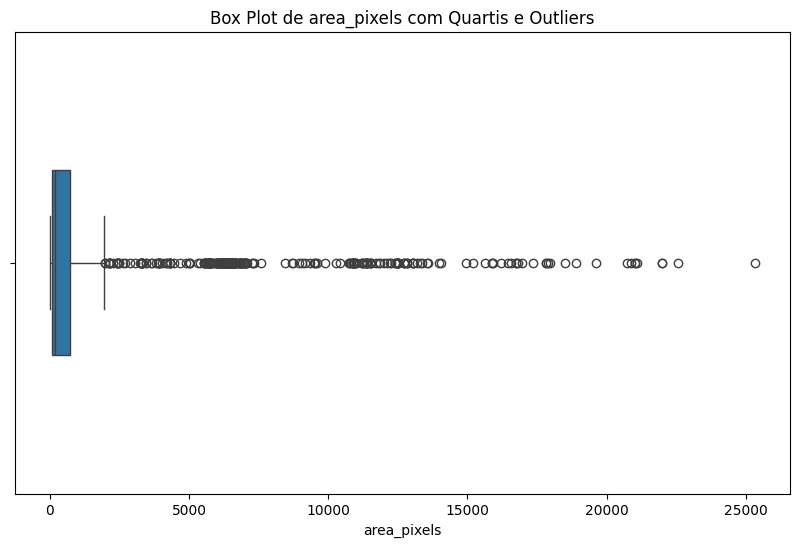

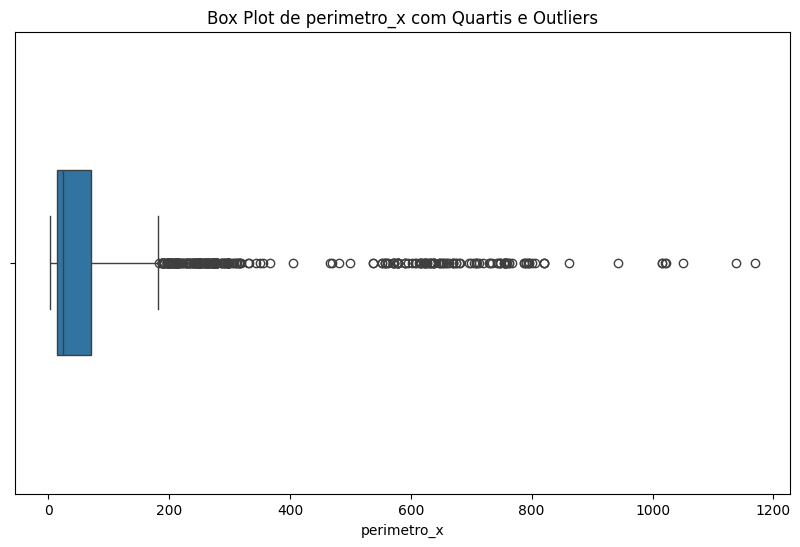

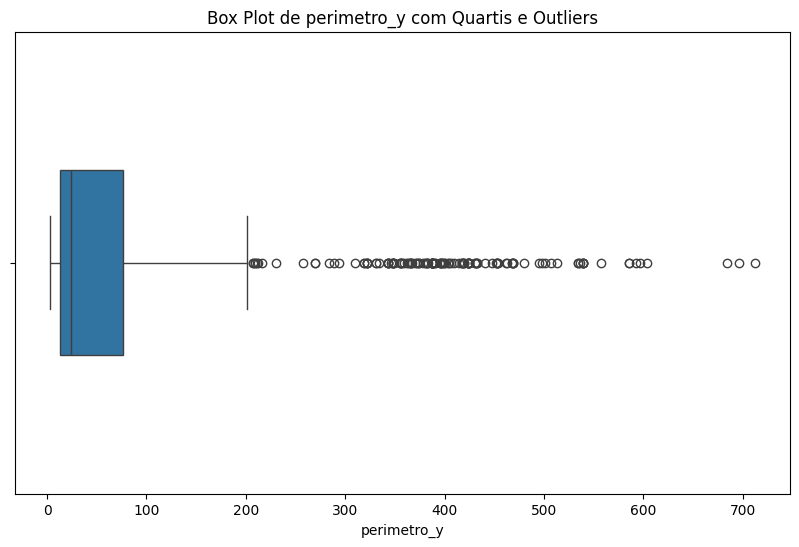

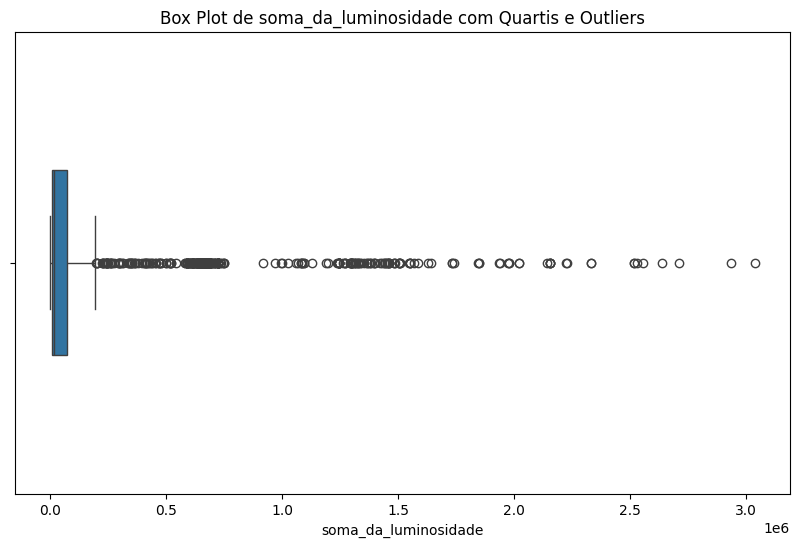

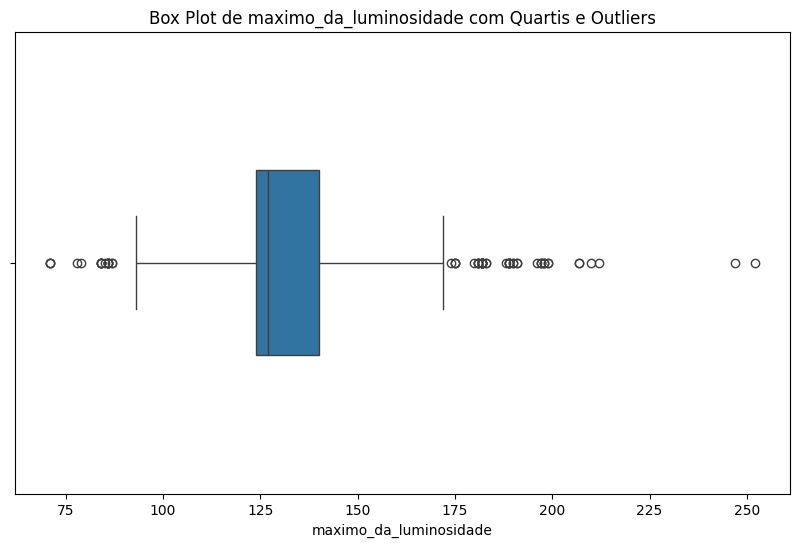

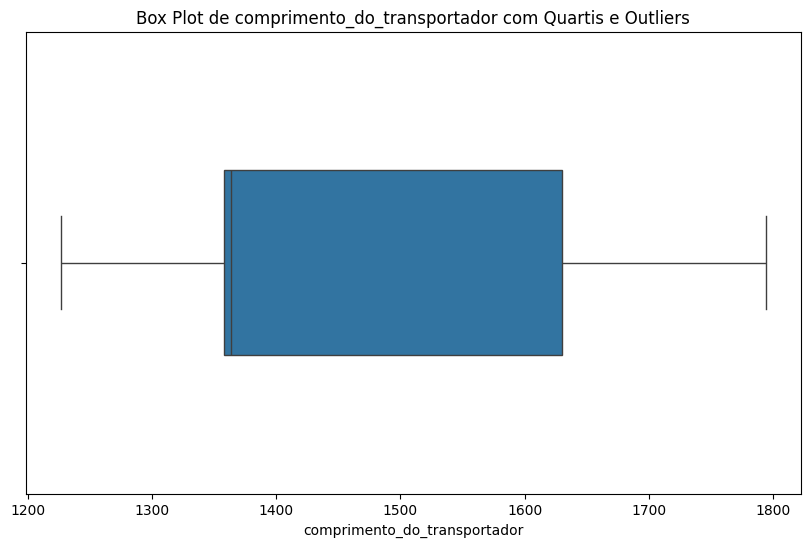

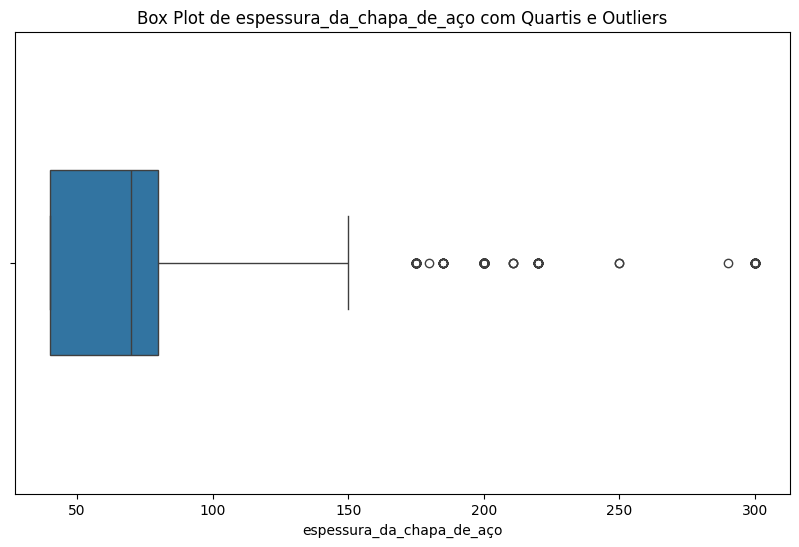

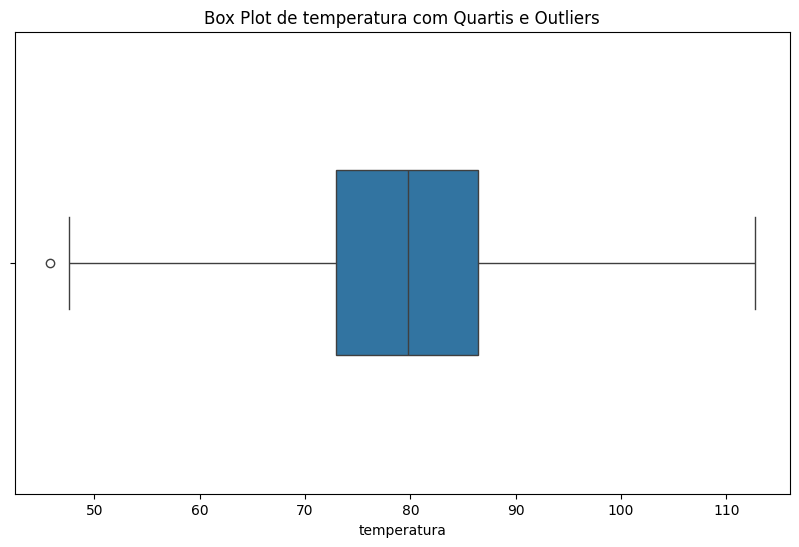

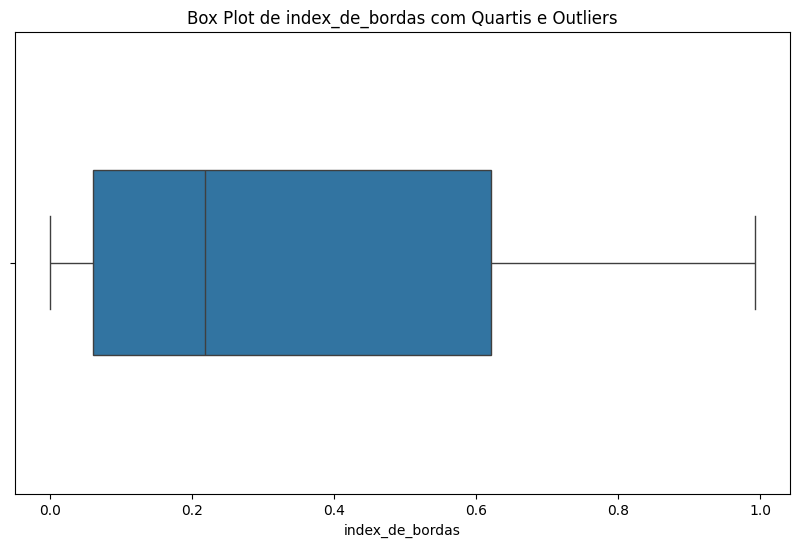

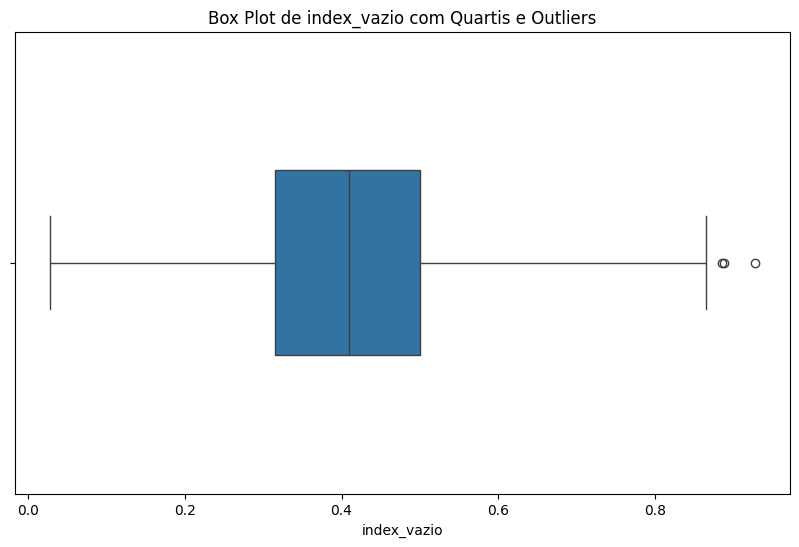

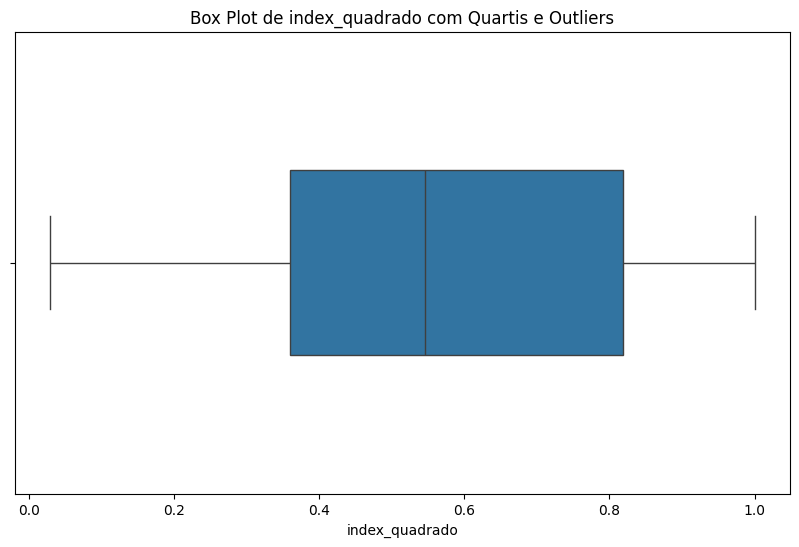

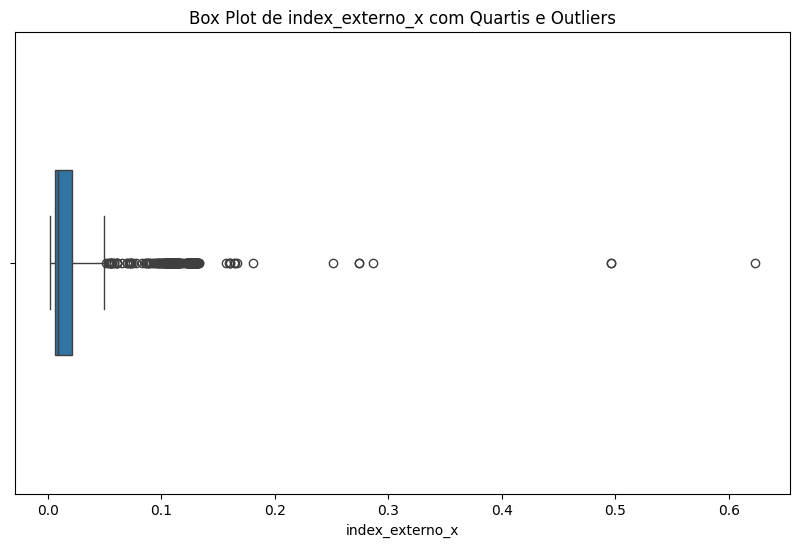

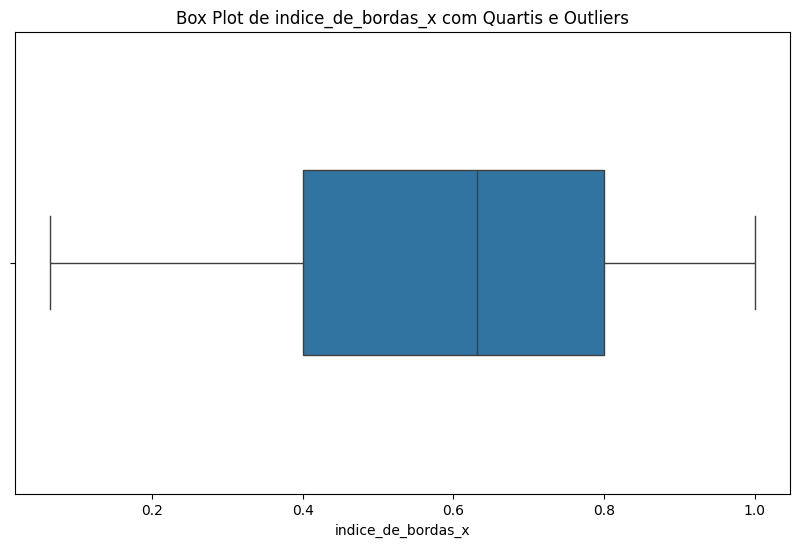

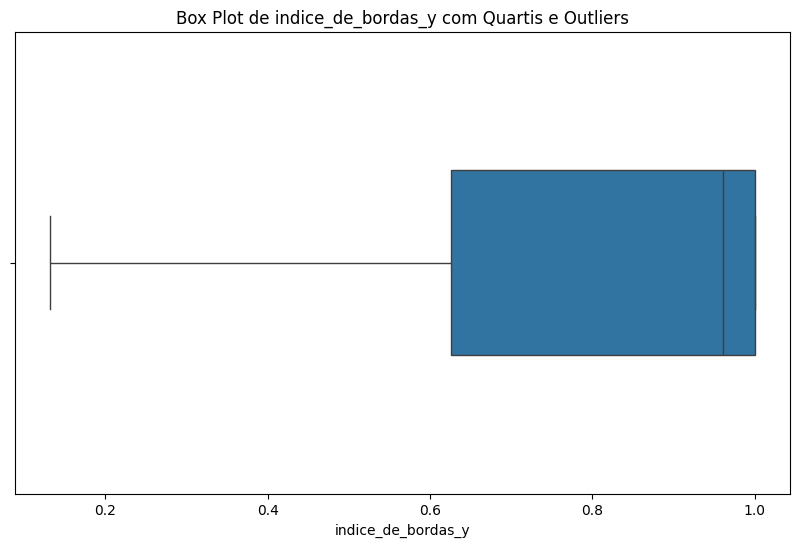

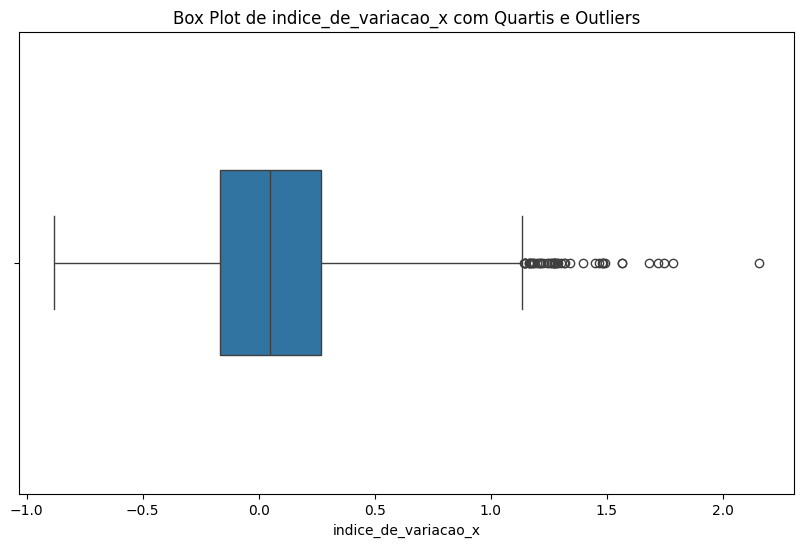

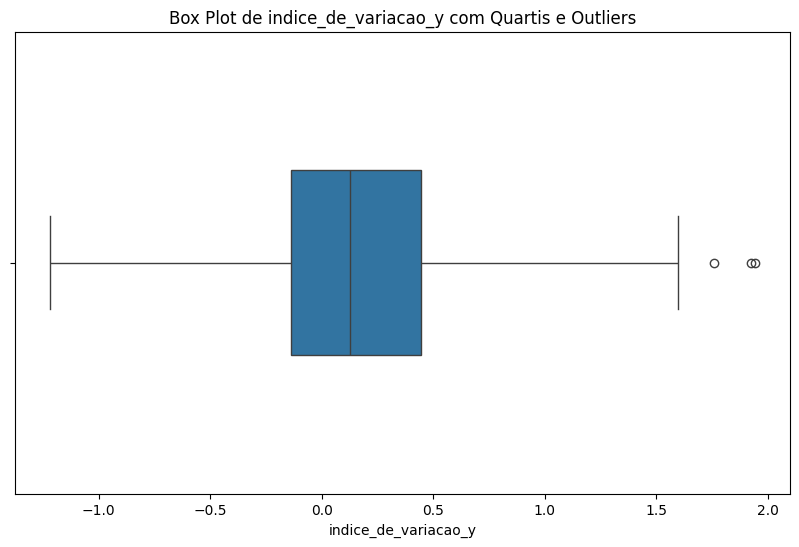

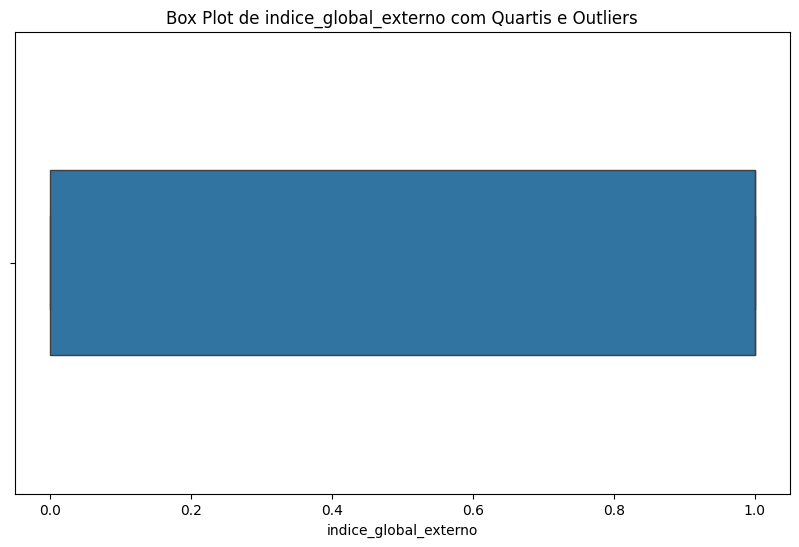

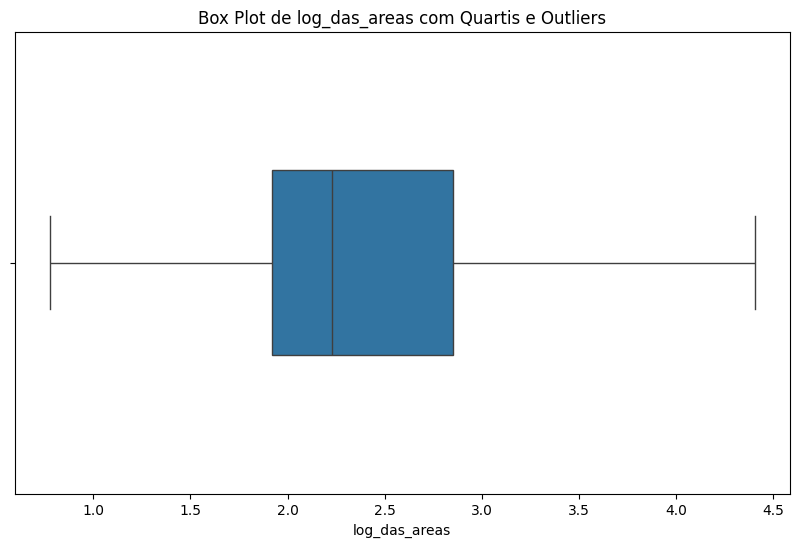

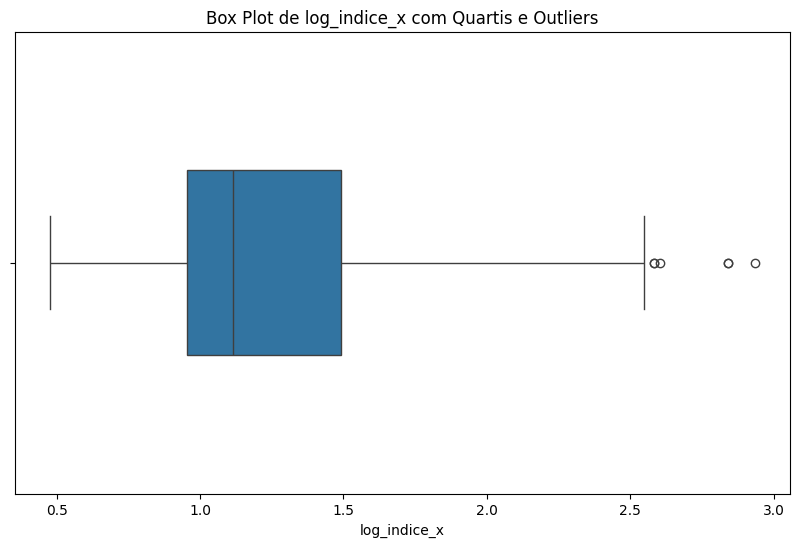

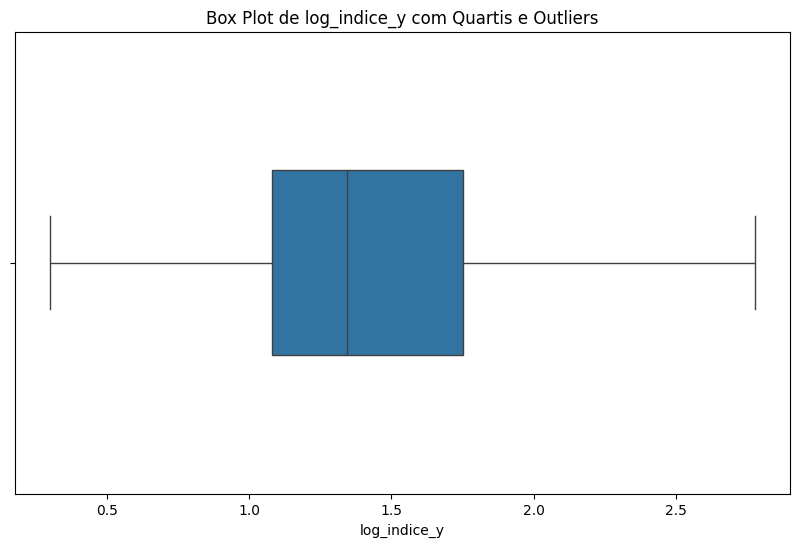

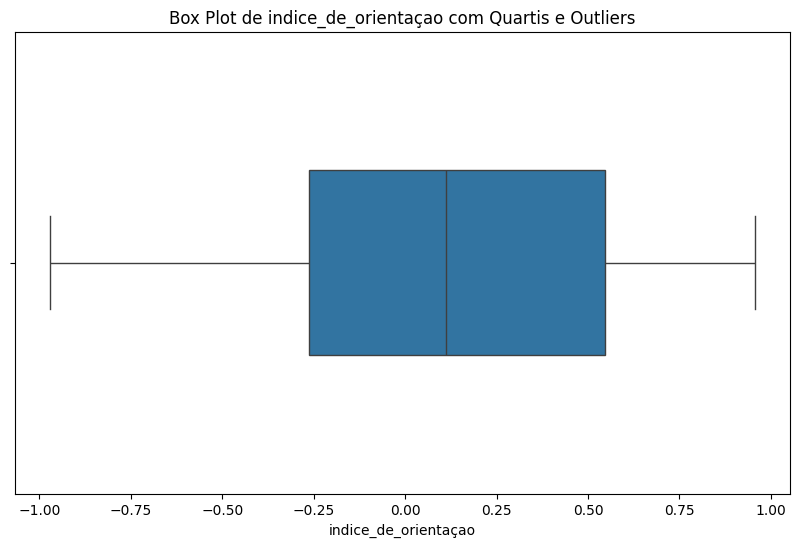

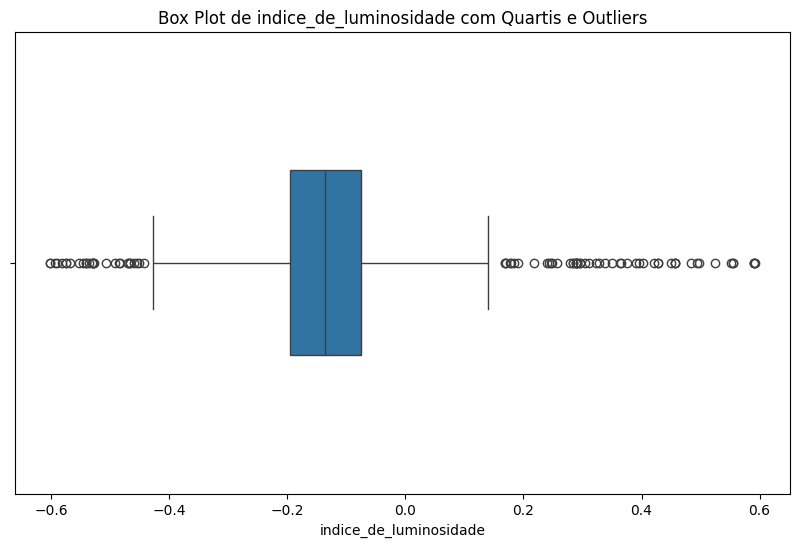

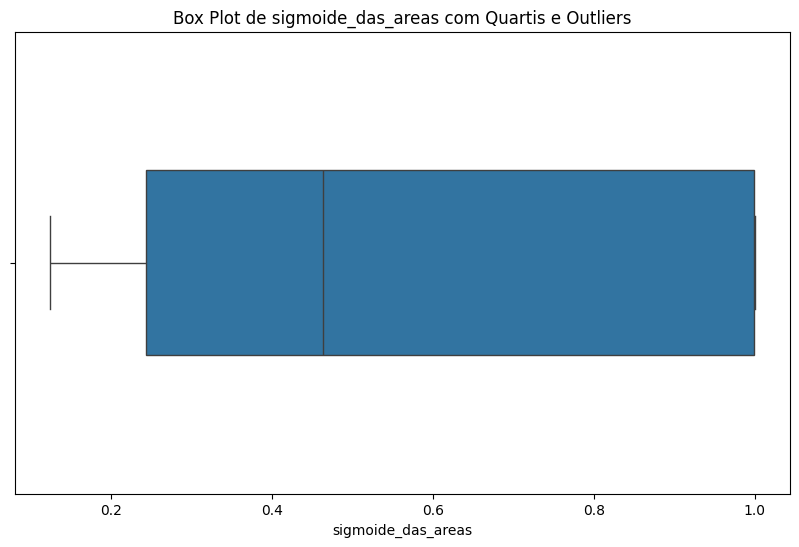

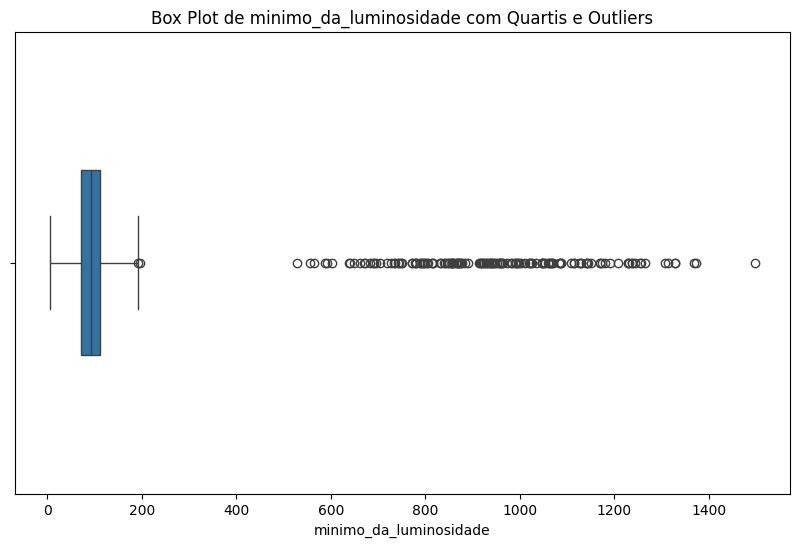

In [154]:

# Outliers por variável

def enhanced_boxplot(df):

  numerical_cols = df.select_dtypes(include=['number']).columns
  for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col], width=0.4, whis=2.0)
    plt.title(f'Box Plot de {col} com Quartis e Outliers')
    plt.xlabel(col)
    plt.show()

enhanced_boxplot(df)


## Analise das probabilidades de falhas

In [155]:

# Relação do percentual de falhas ocorridas

failure_counts = df[failure_cols].sum()

total_failures = failure_counts.sum()

failure_percentages = (failure_counts / total_failures) * 100

print("Percentual de cada tipo de falha:")
failure_percentages


Percentual de cada tipo de falha:


falha_1          7.820197
falha_2          8.251232
falha_3         20.012315
falha_4          3.879310
falha_5          2.955665
falha_6         22.105911
falha_outros    34.975369
dtype: float64

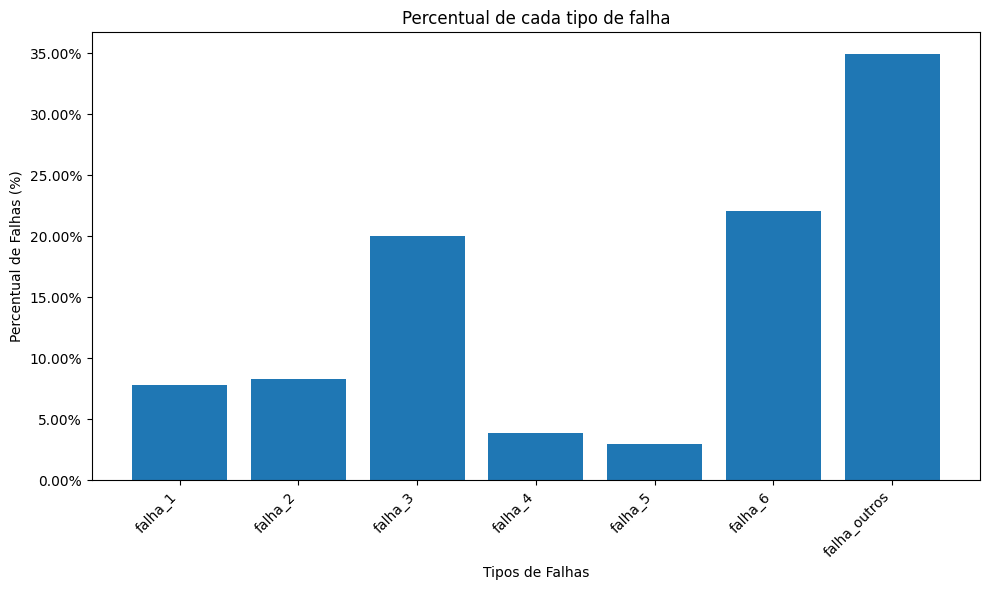

In [156]:

# Gráfico dos percentuais de falha acima, arrendonde 2 casa depois do . e ponha o simbolo de %

failure_cols = ['falha_1', 'falha_2', 'falha_3', 'falha_4', 'falha_5', 'falha_6', 'falha_outros']
failure_counts = df[failure_cols].sum()
total_failures = failure_counts.sum()
failure_percentages = (failure_counts / total_failures) * 100

plt.figure(figsize=(10, 6))
plt.bar(failure_percentages.index, failure_percentages.values)
plt.xlabel("Tipos de Falhas")
plt.ylabel("Percentual de Falhas (%)")
plt.title("Percentual de cada tipo de falha")
plt.xticks(rotation=45, ha="right")
plt.gca().yaxis.set_major_formatter(lambda x, loc: f"{x:.2f}%")
plt.tight_layout()
plt.show()


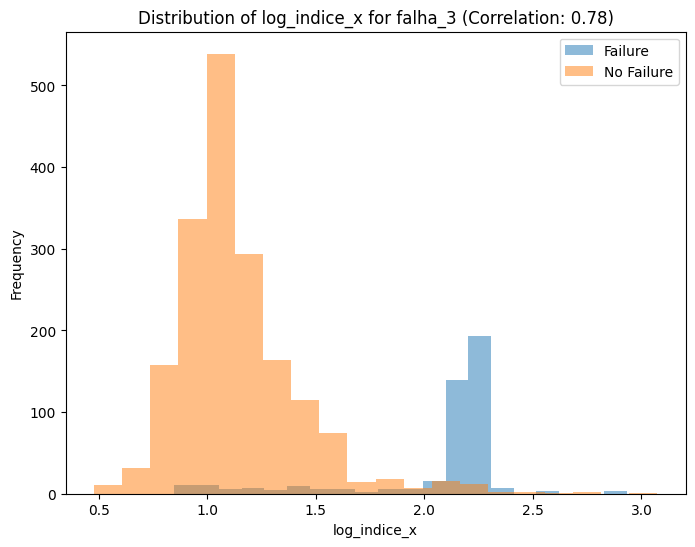

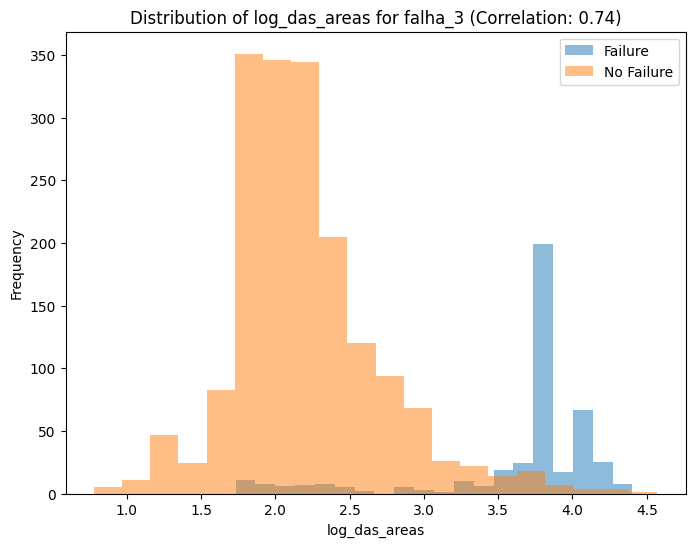

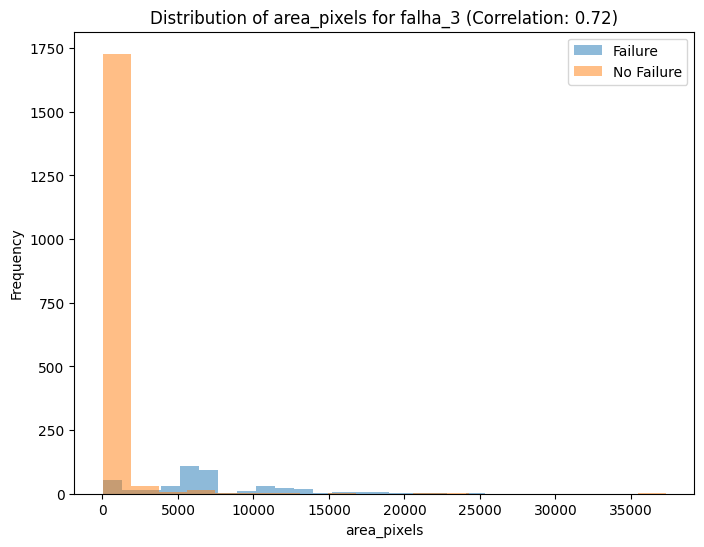

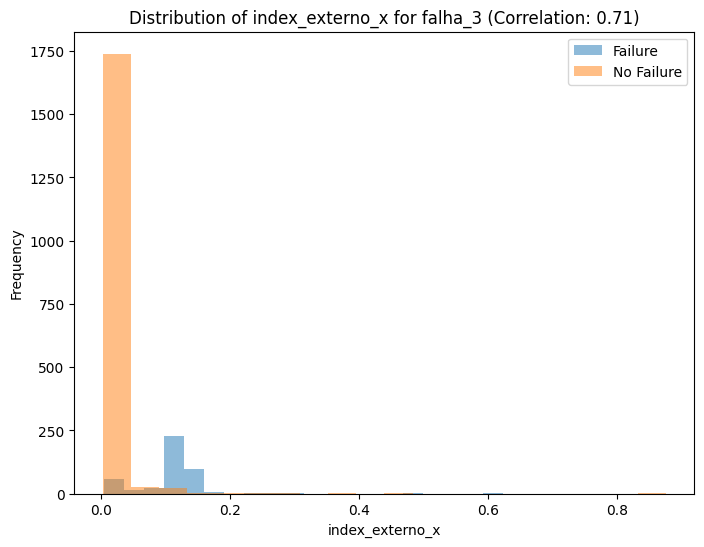

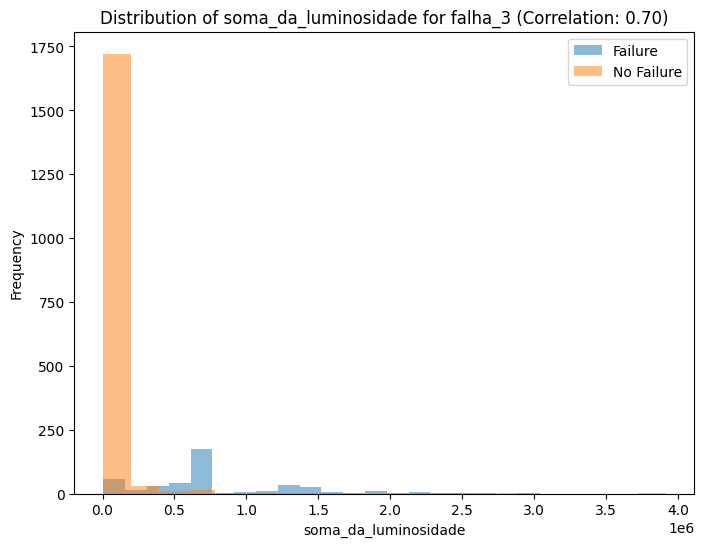

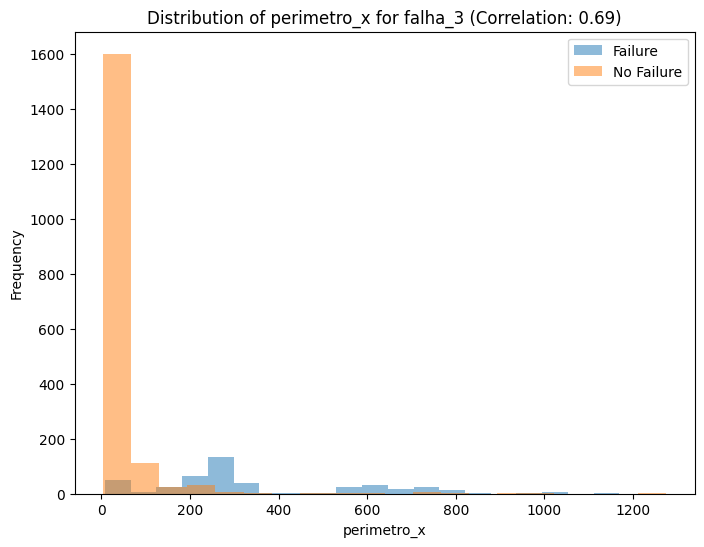

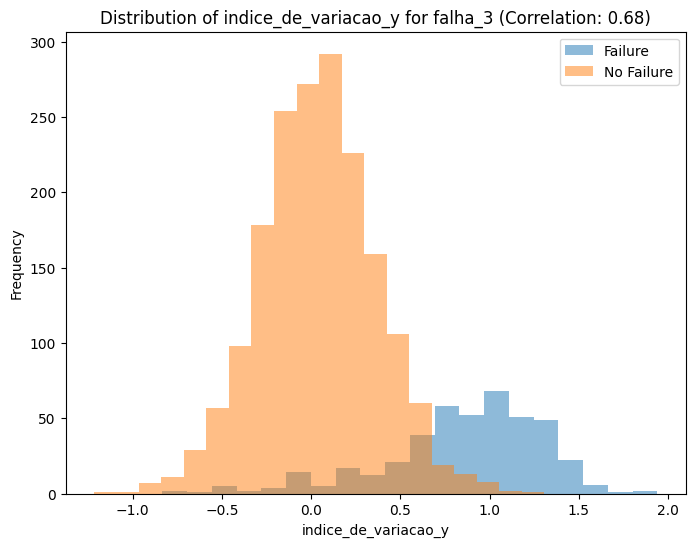

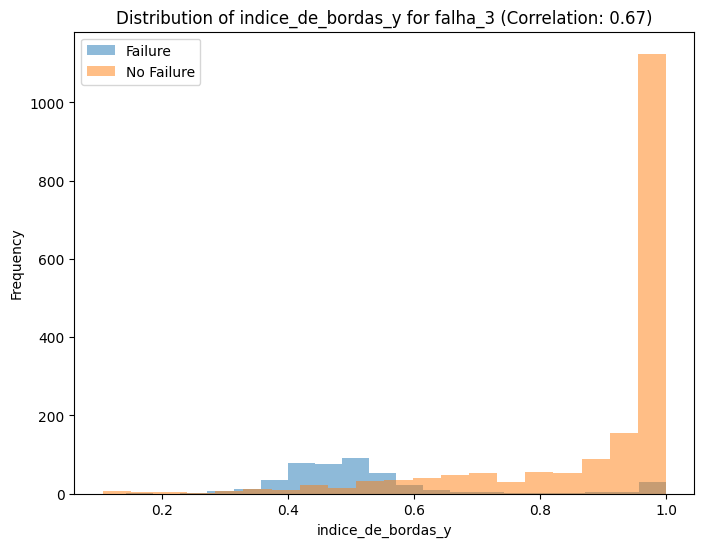

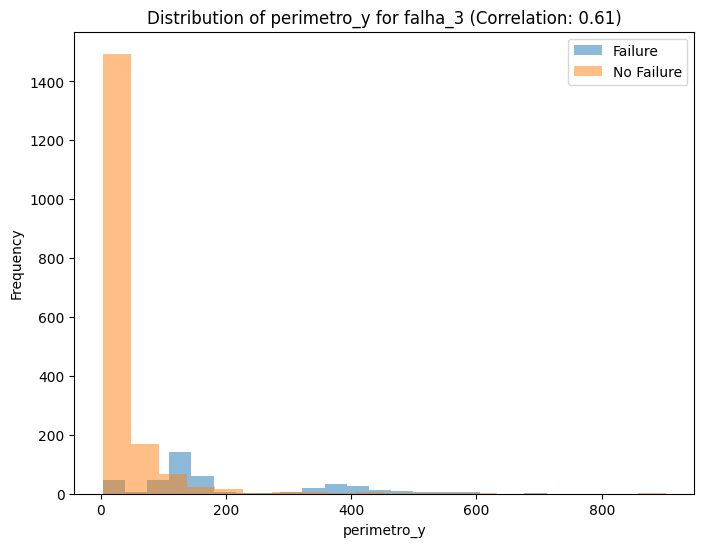

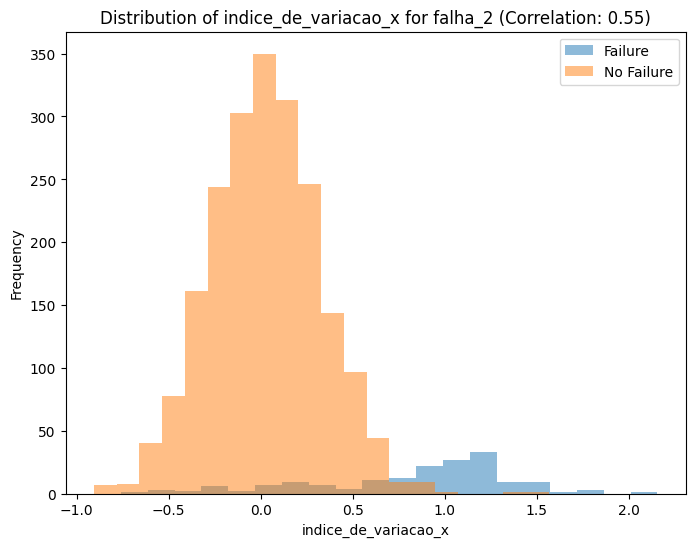

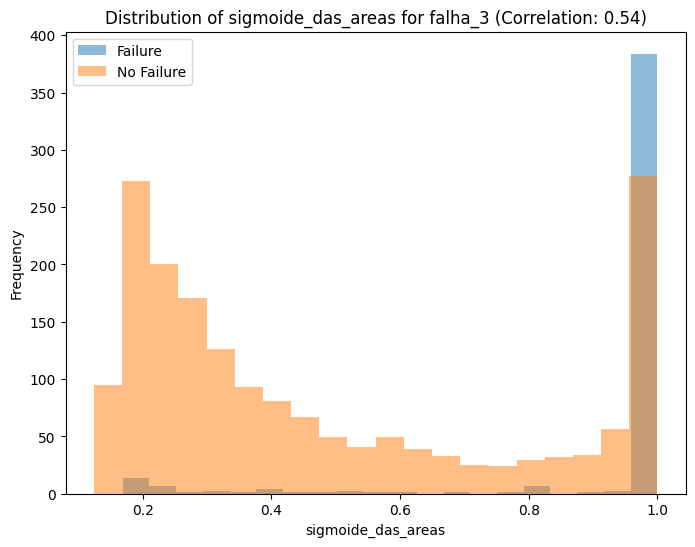

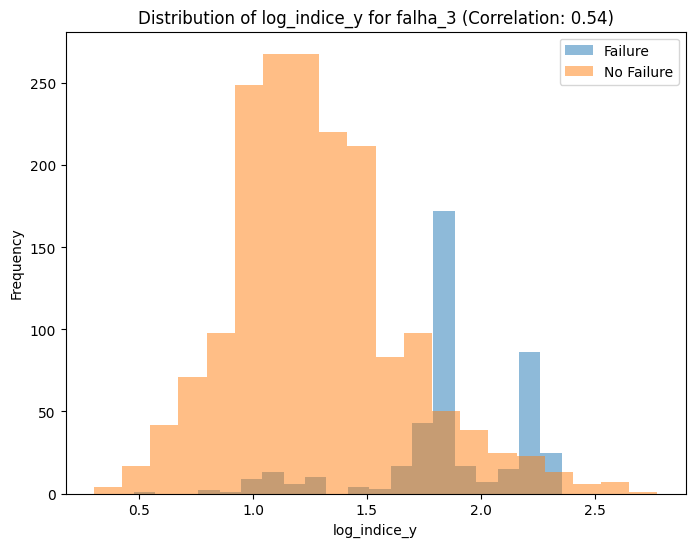

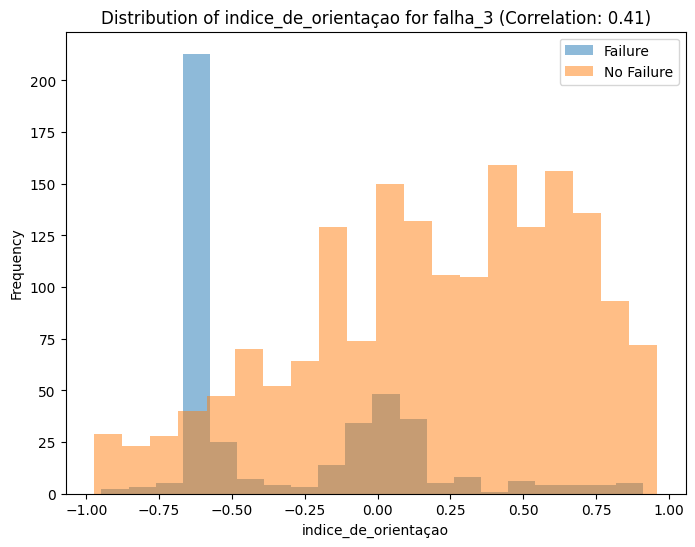

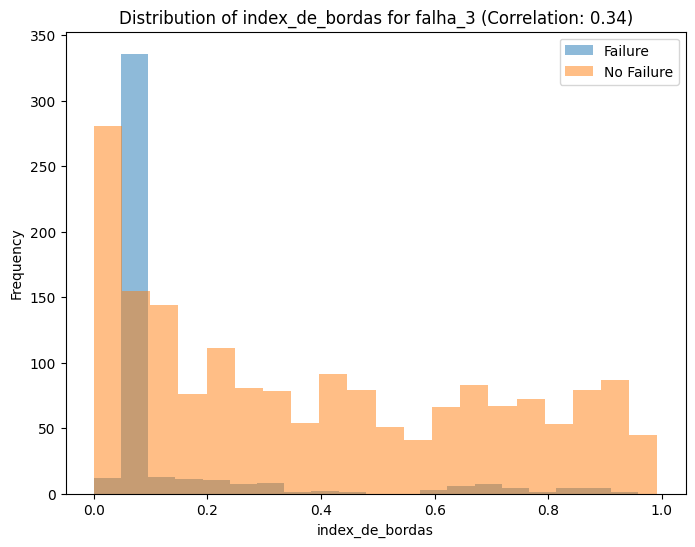

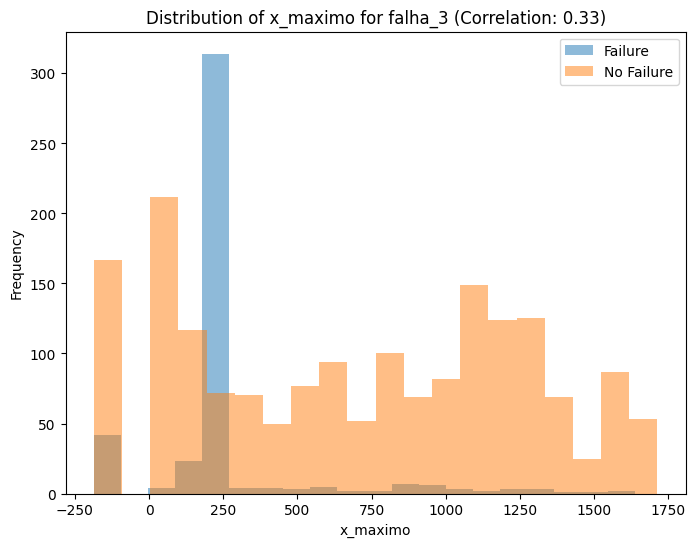

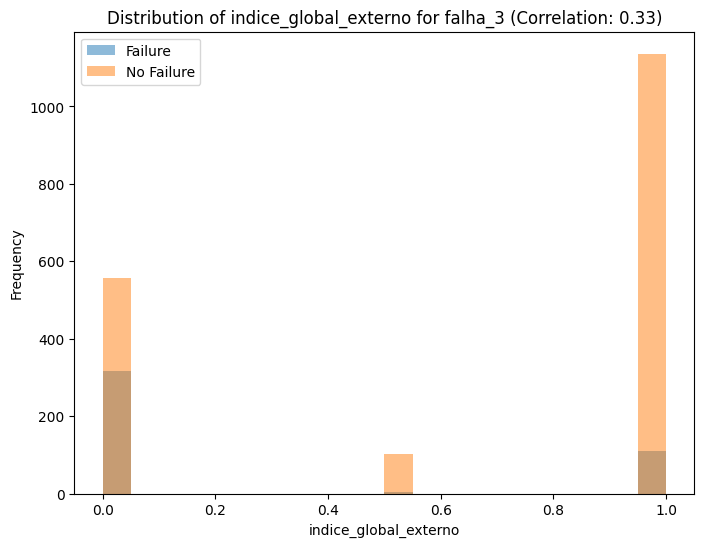

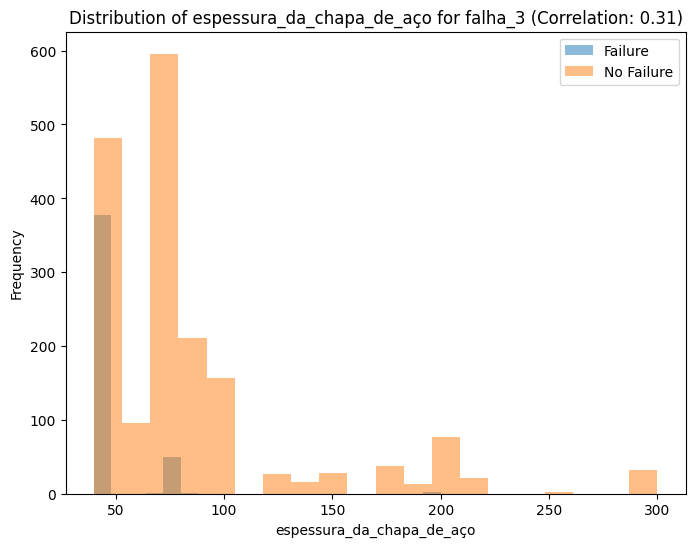

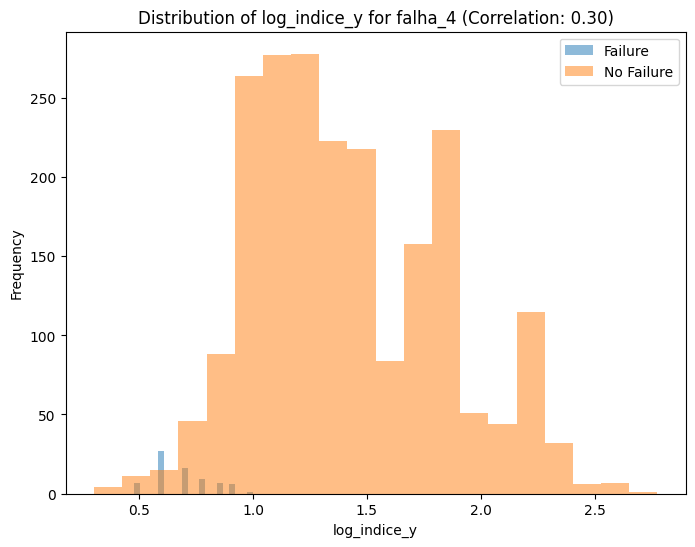

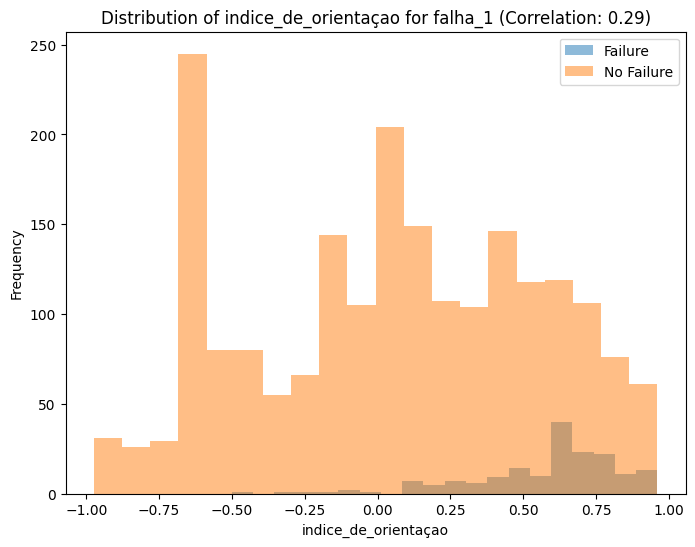

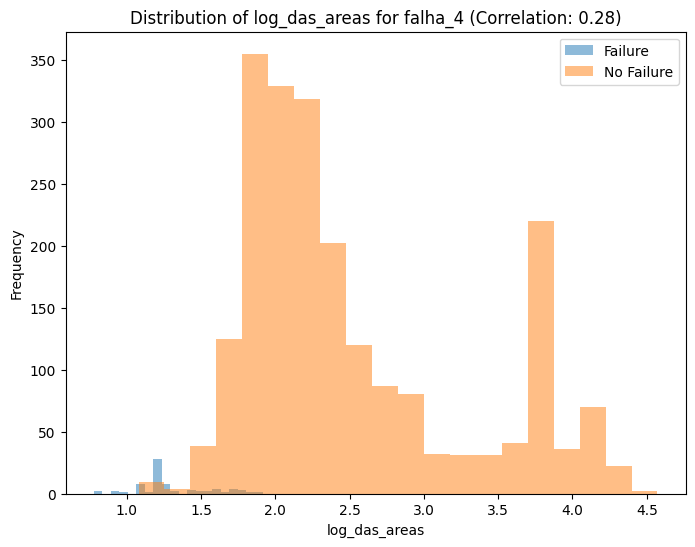

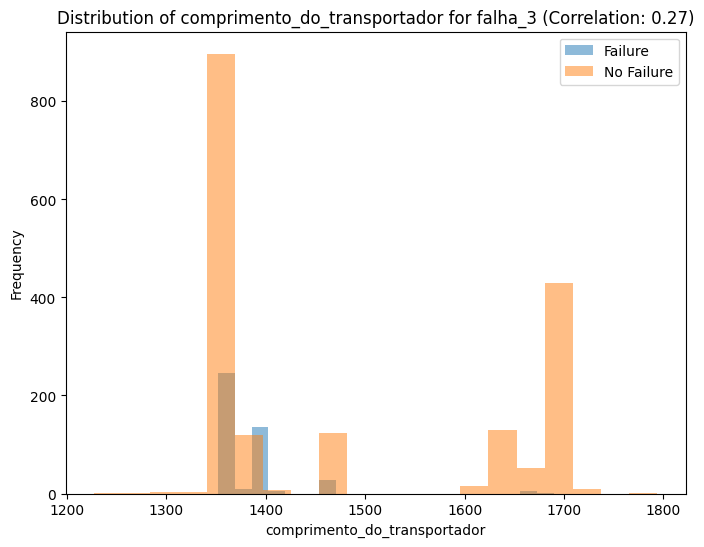

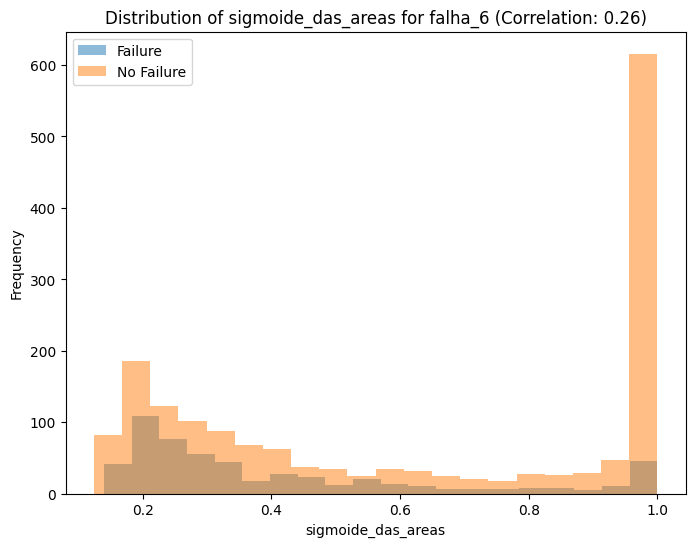

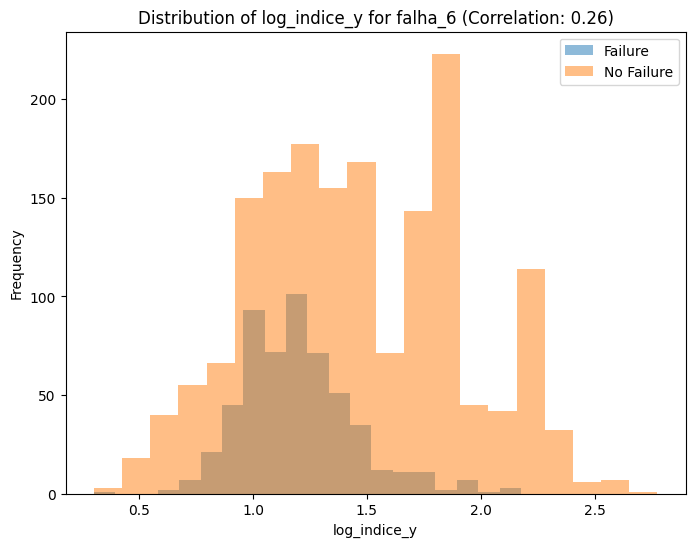

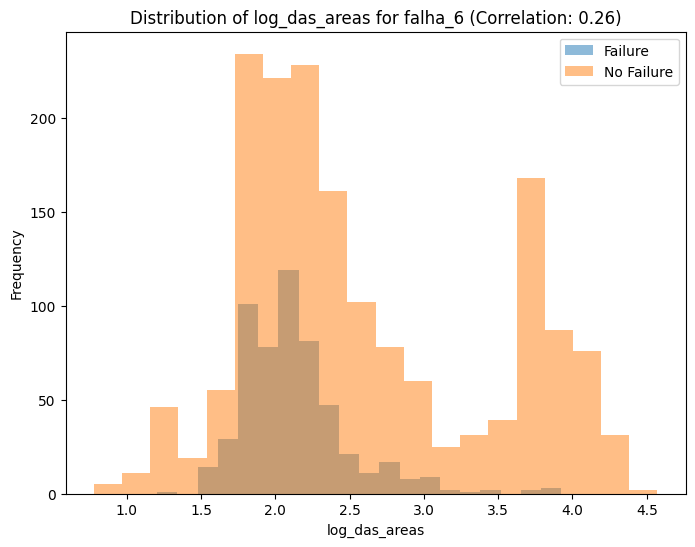

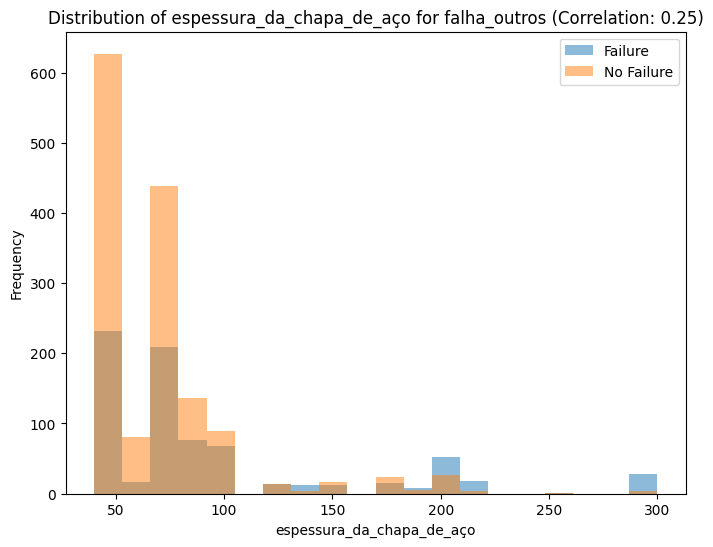

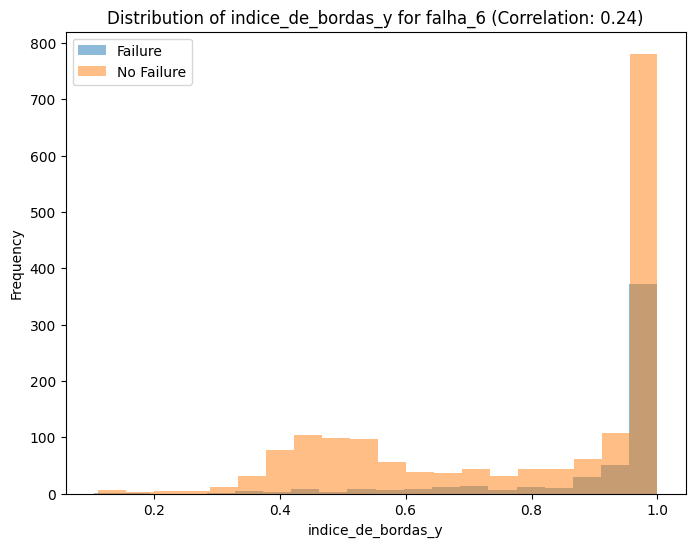

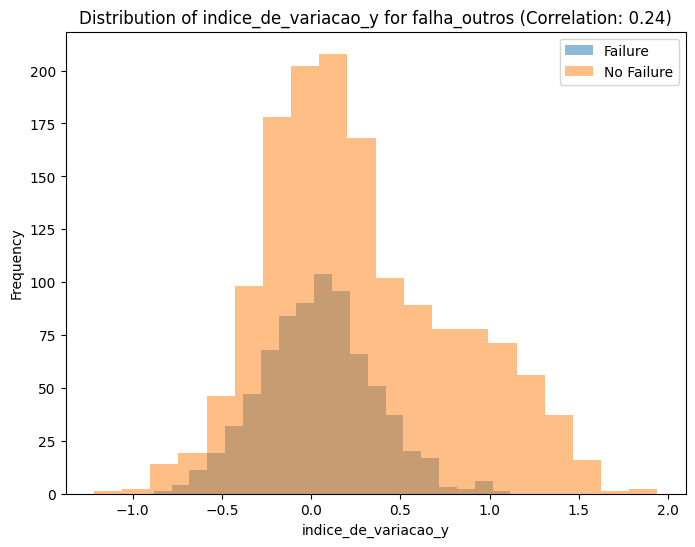

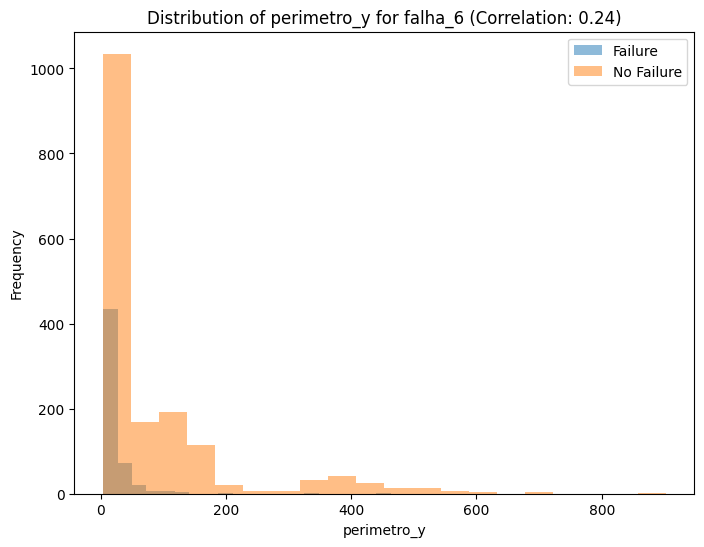

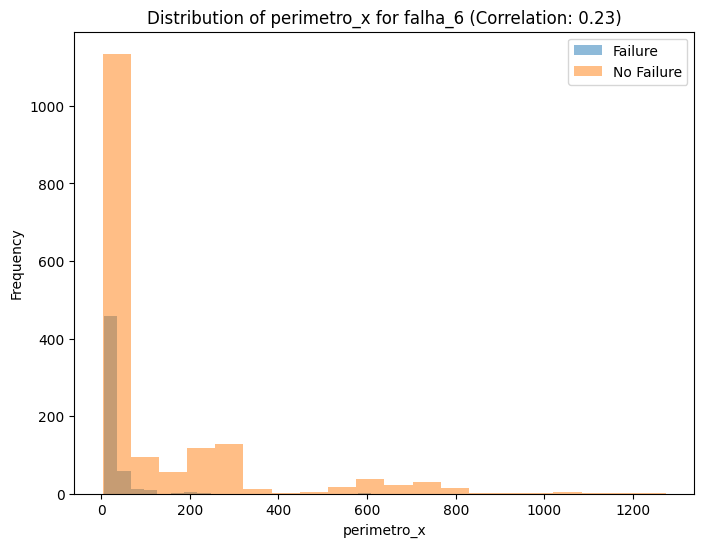

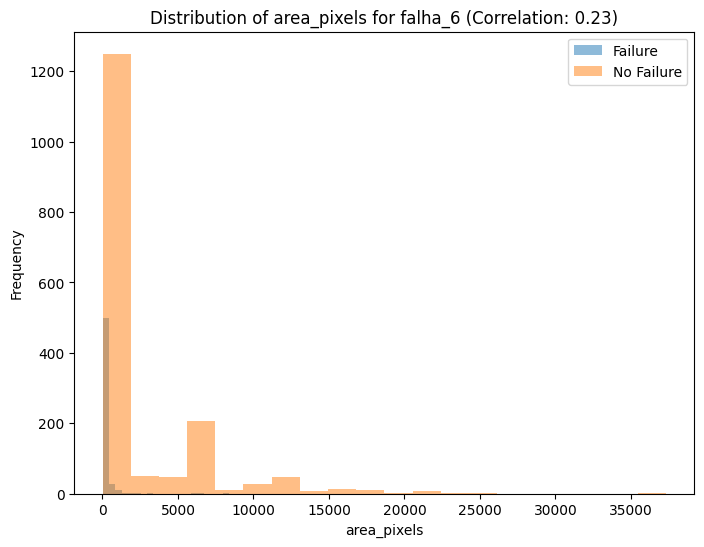

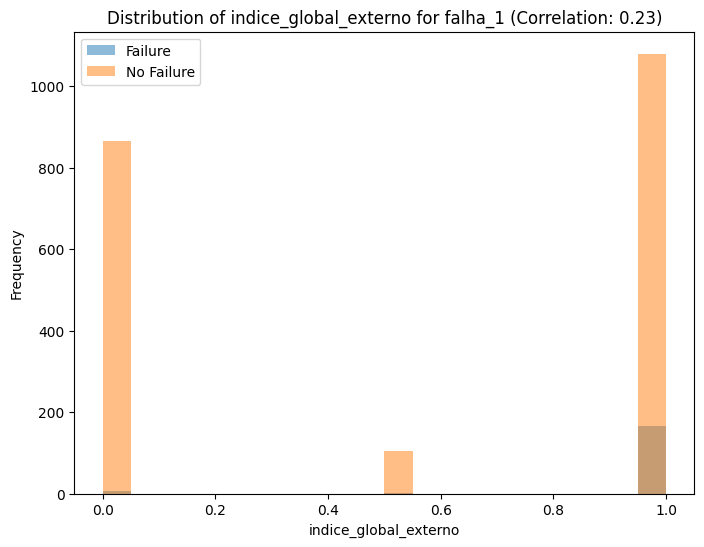

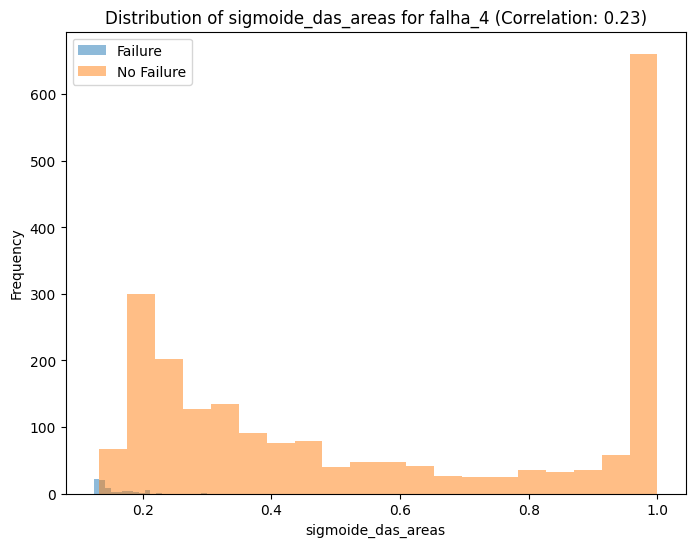

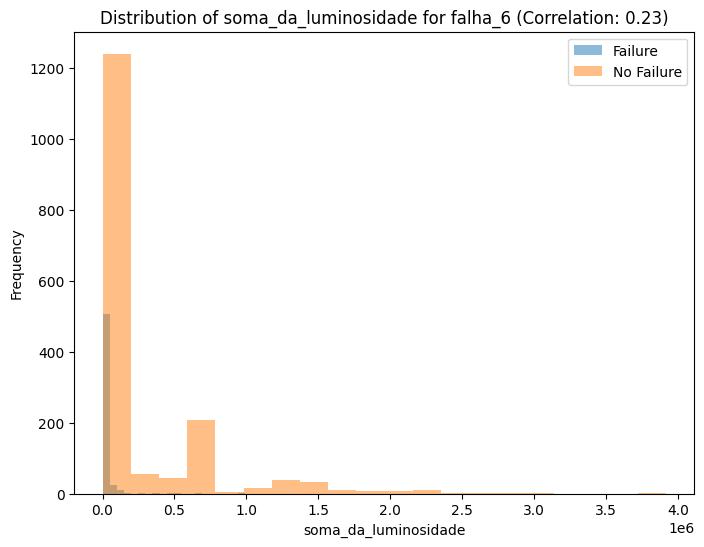

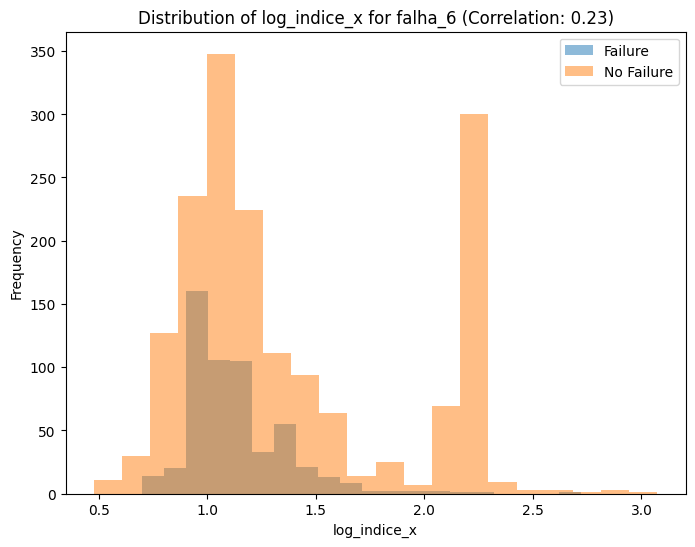

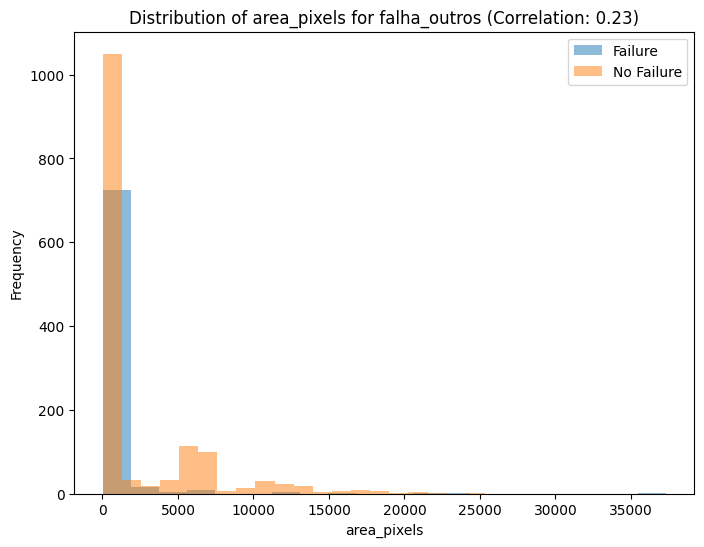

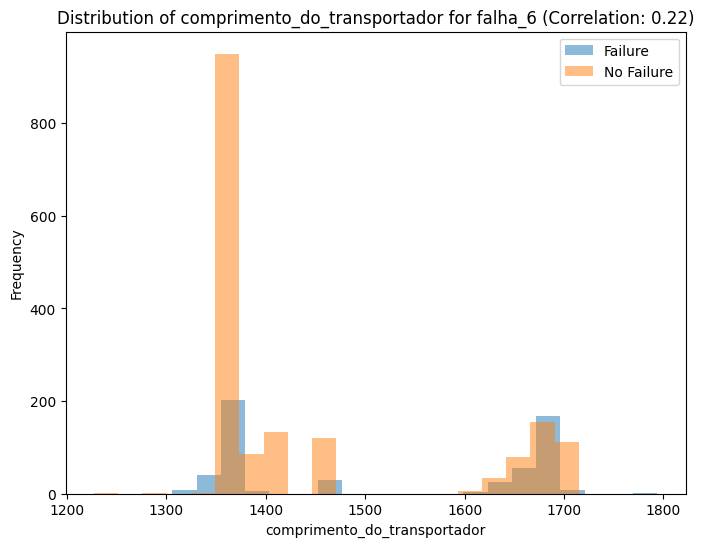

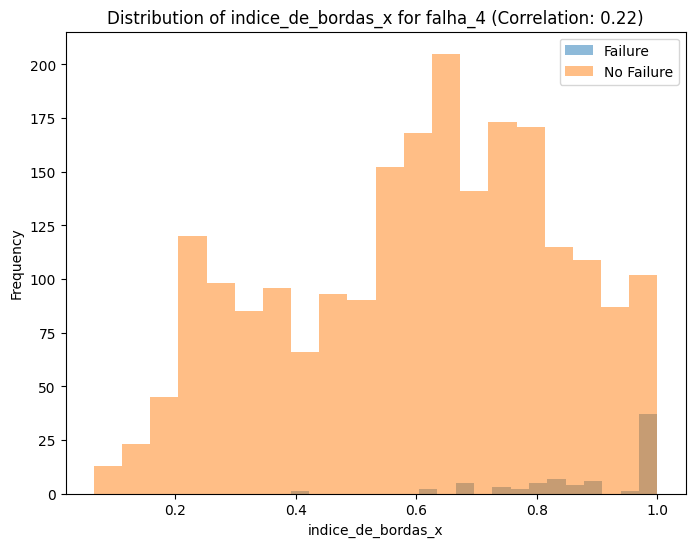

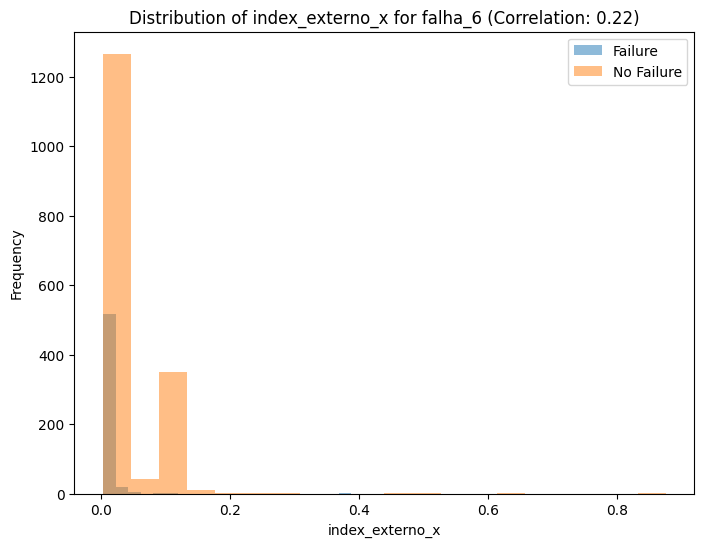

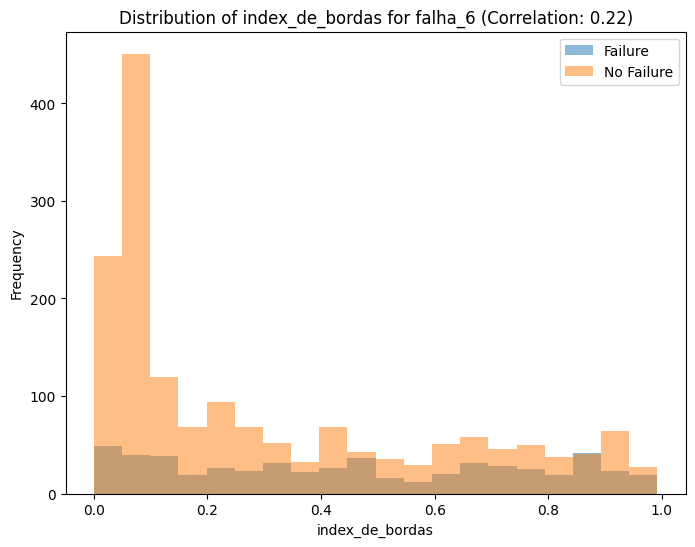

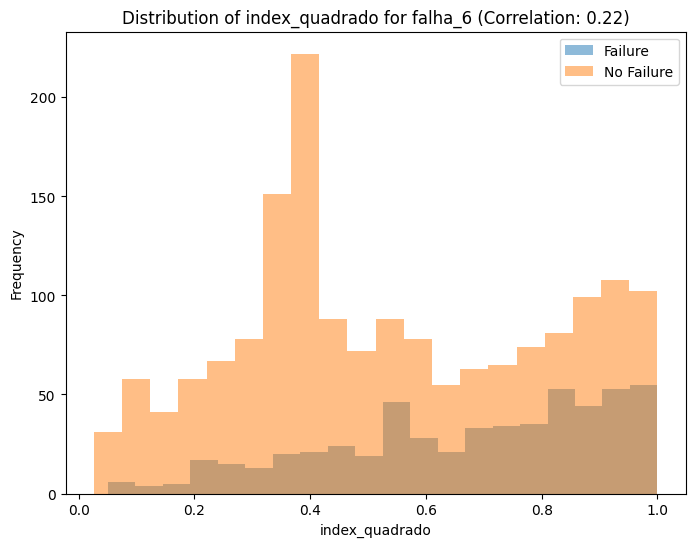

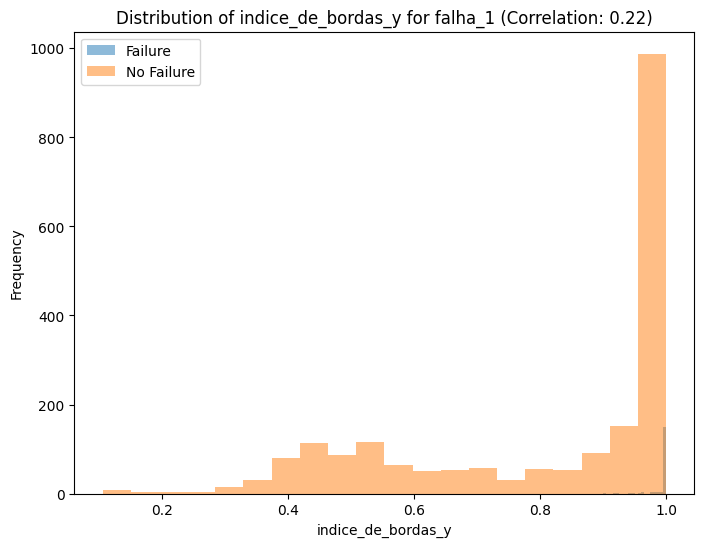

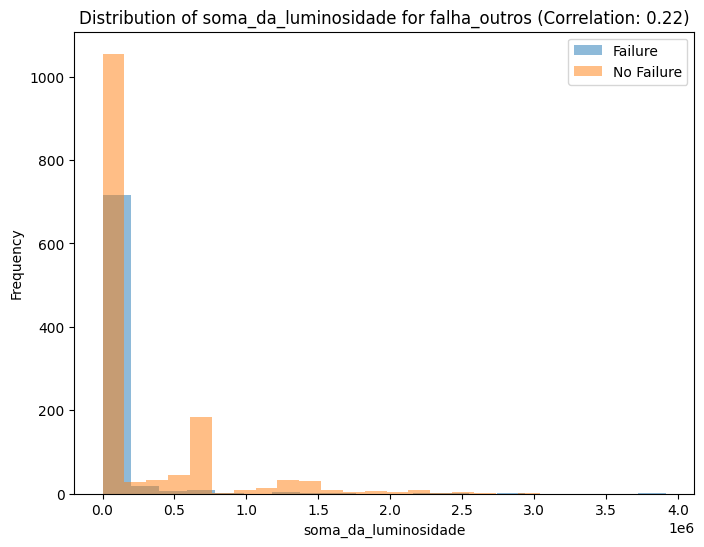

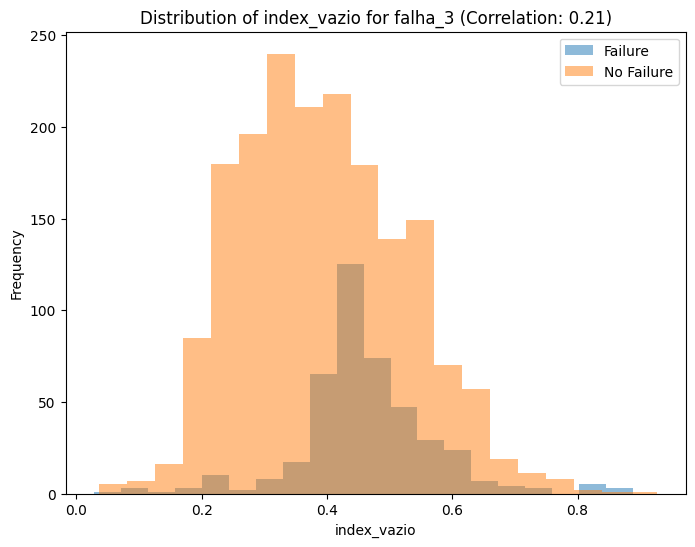

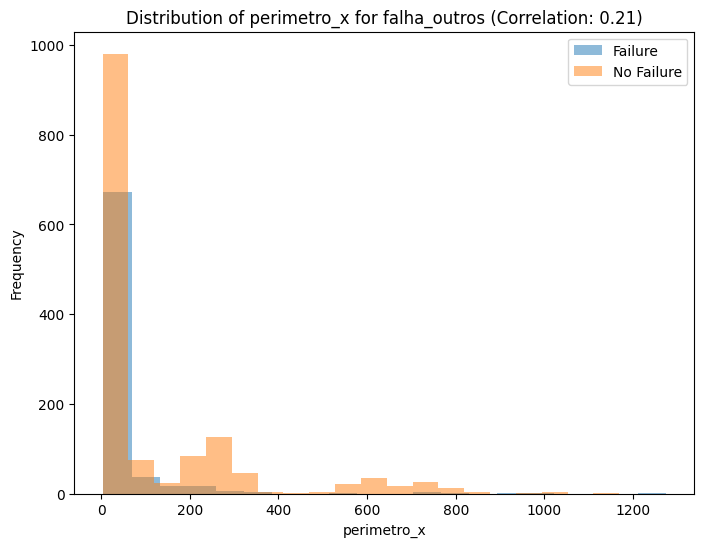

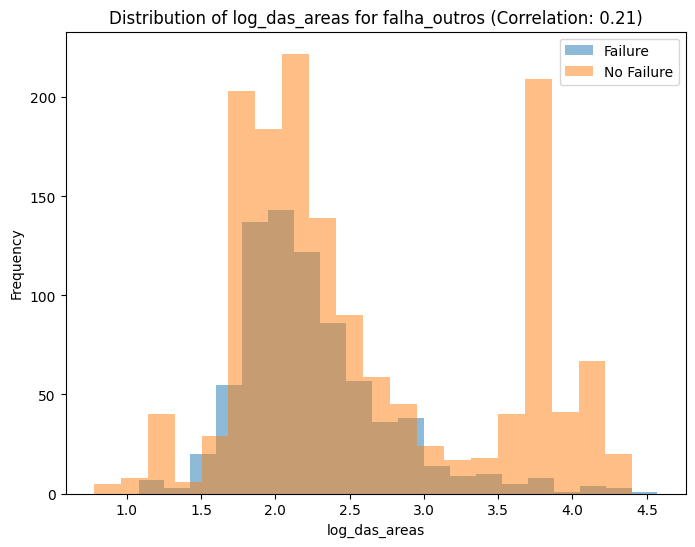

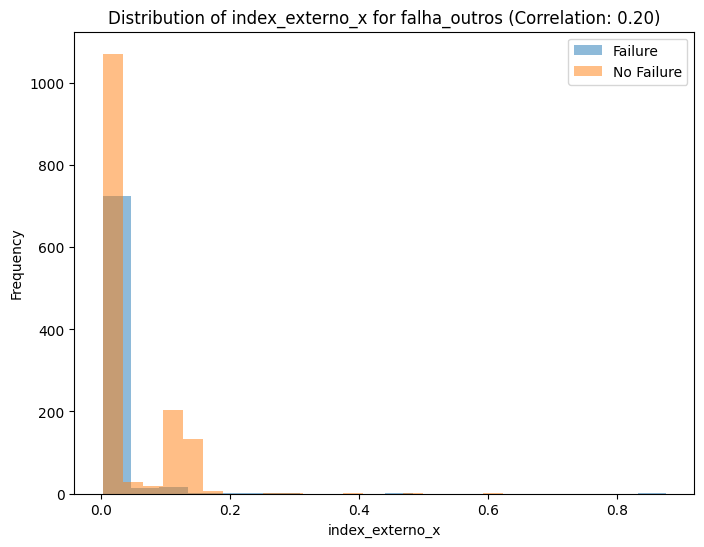

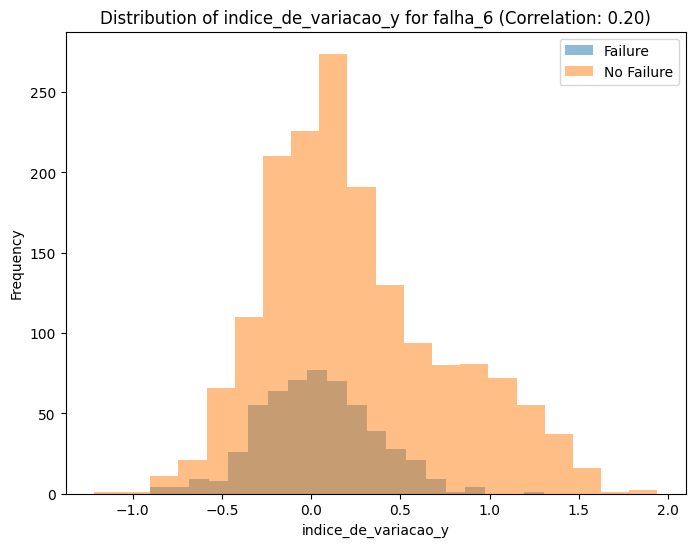

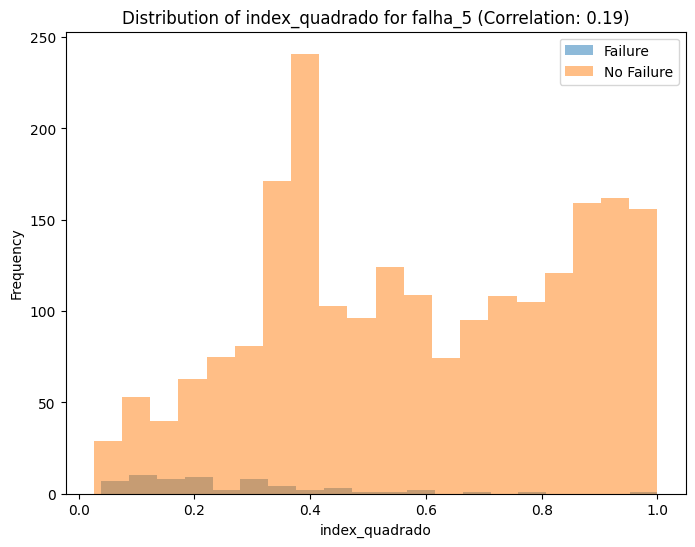

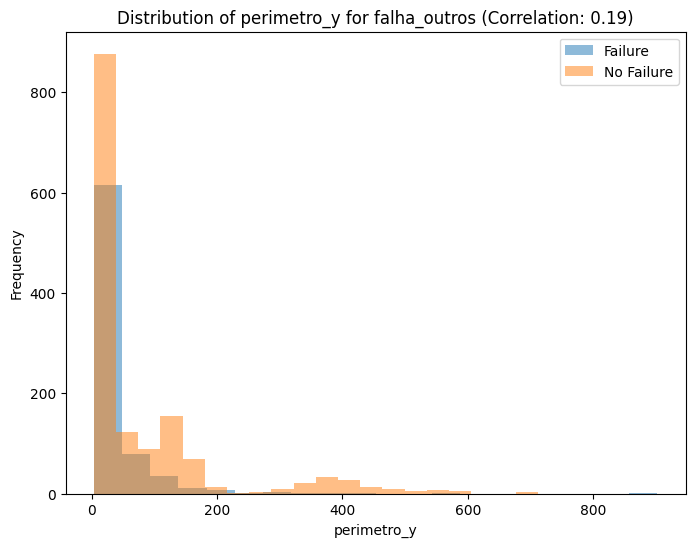

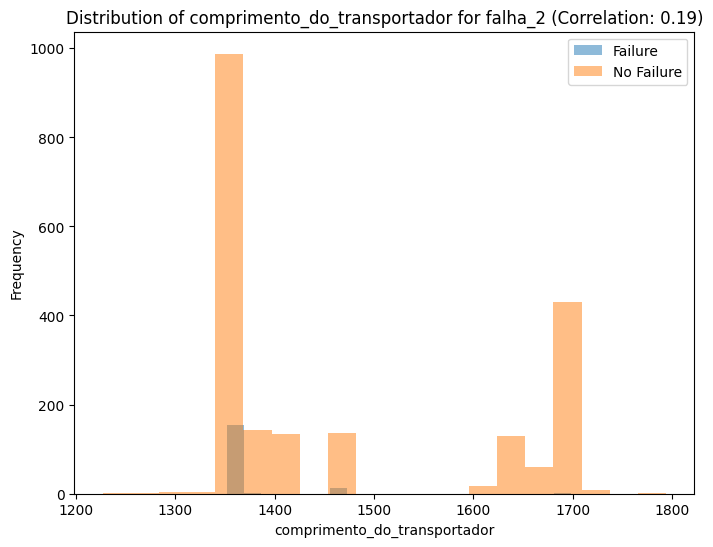

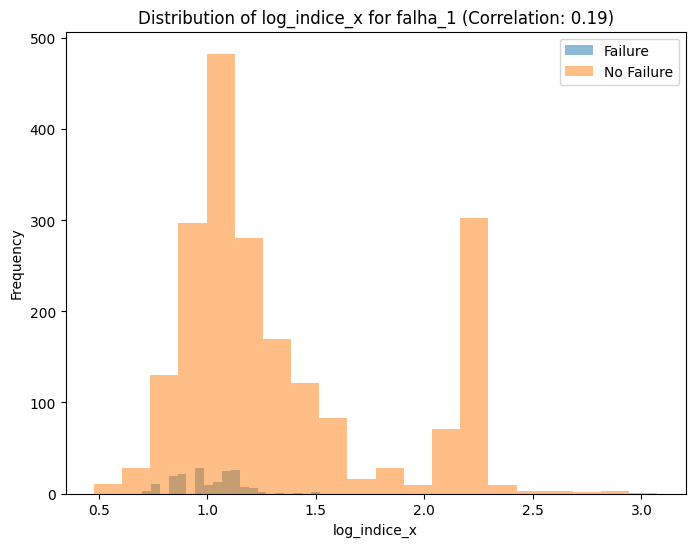

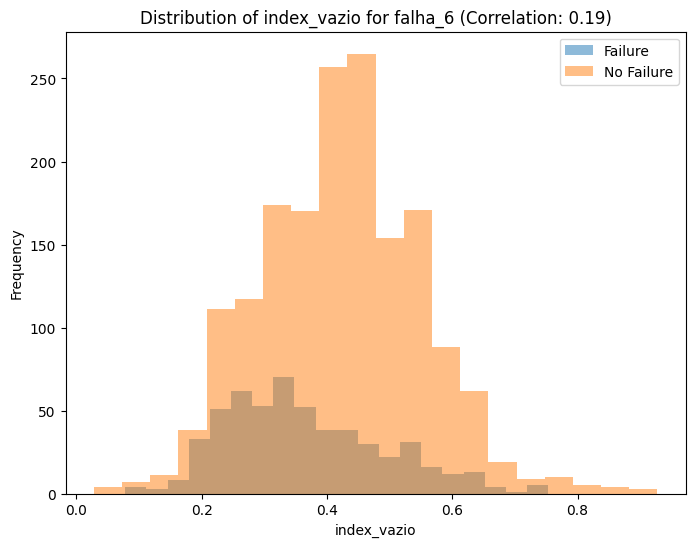

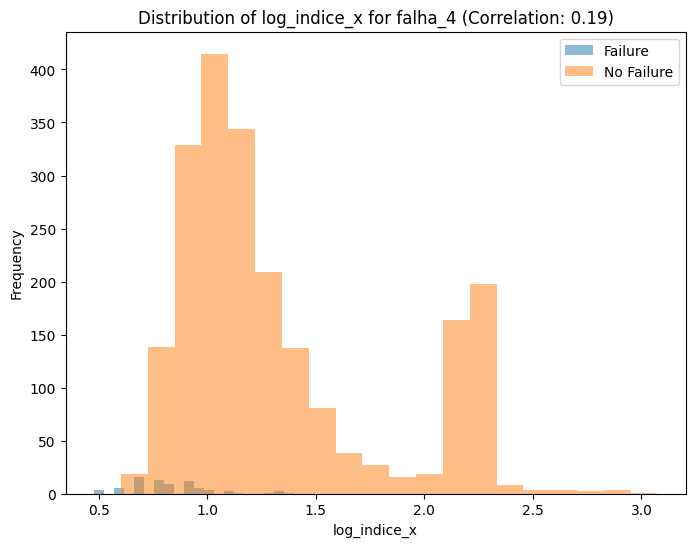

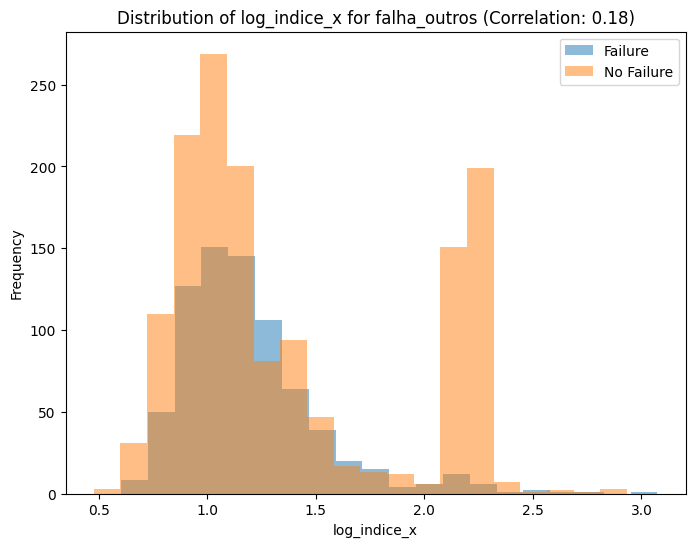

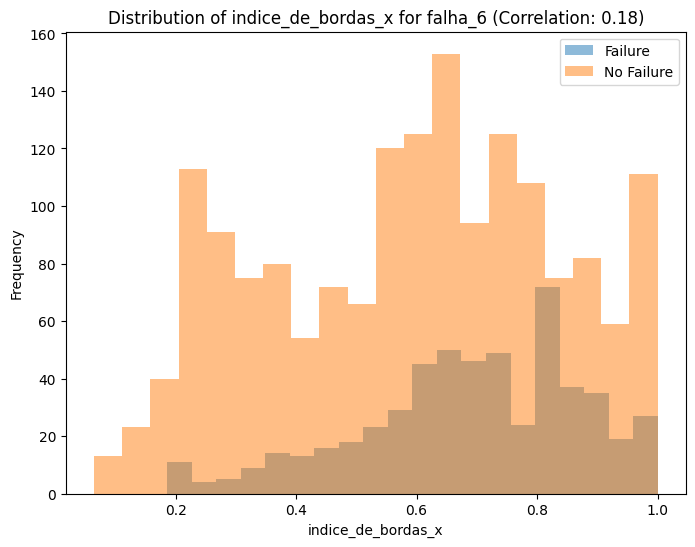

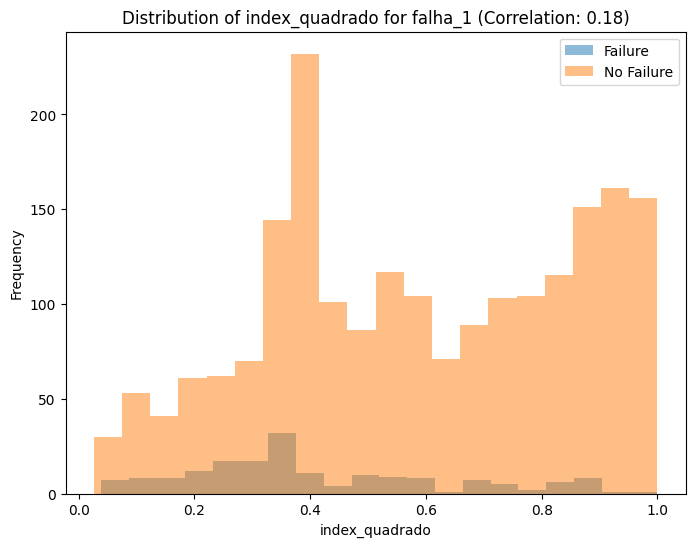

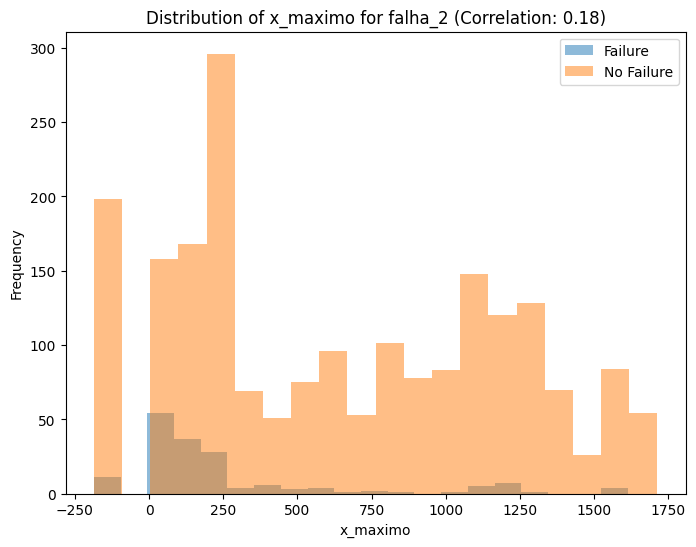

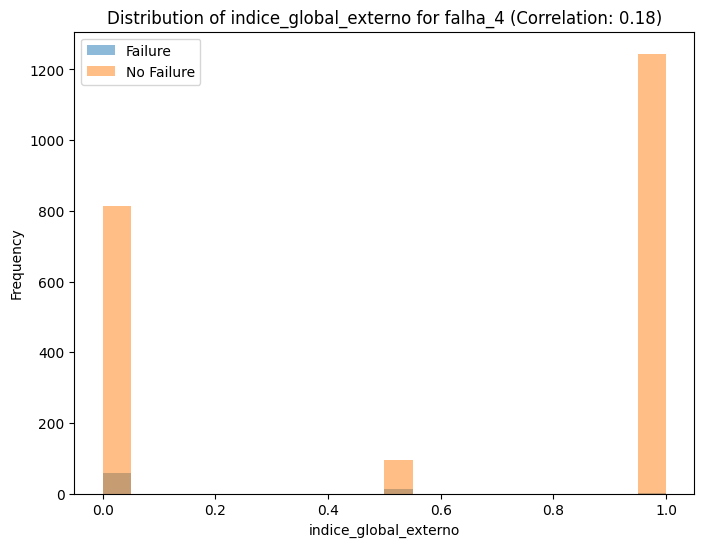

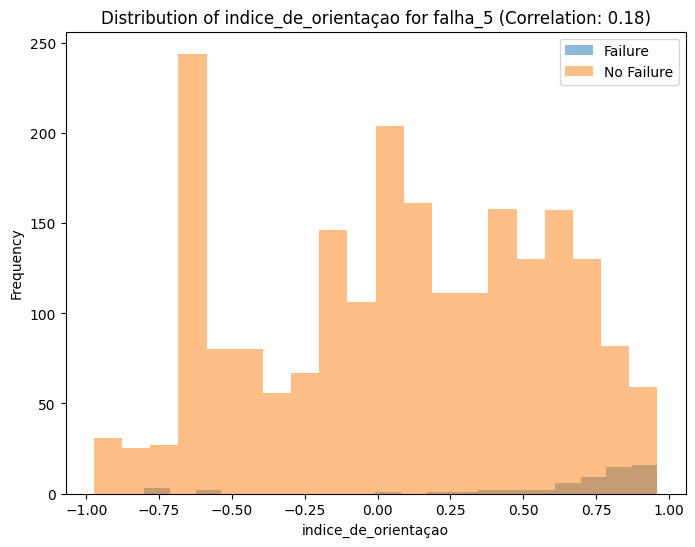

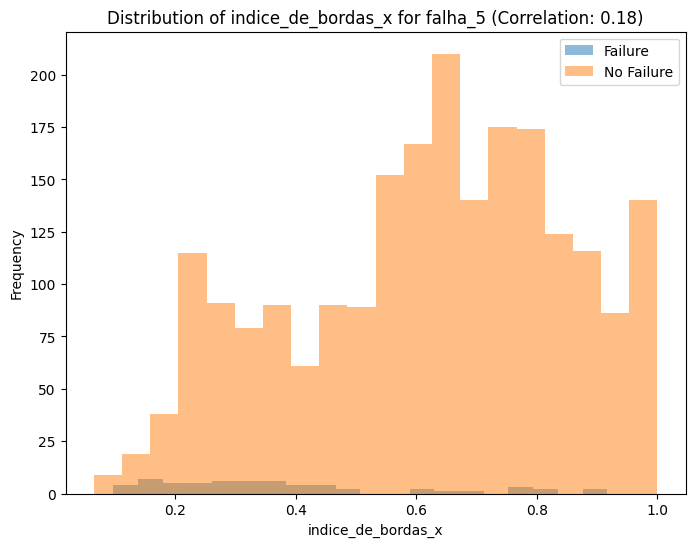

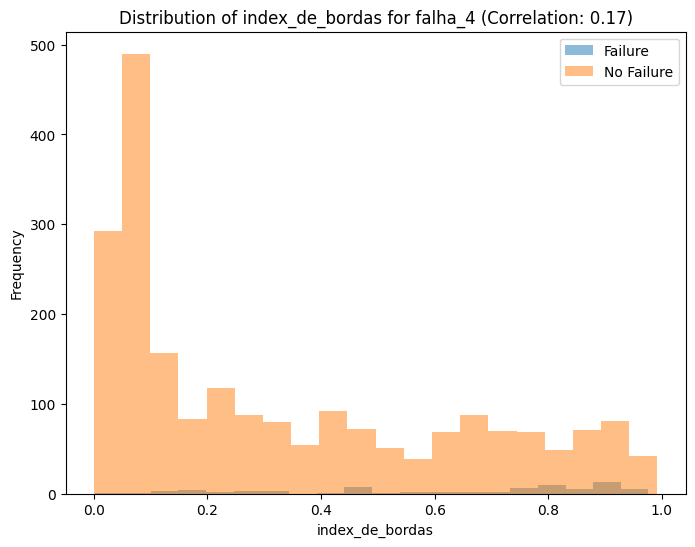

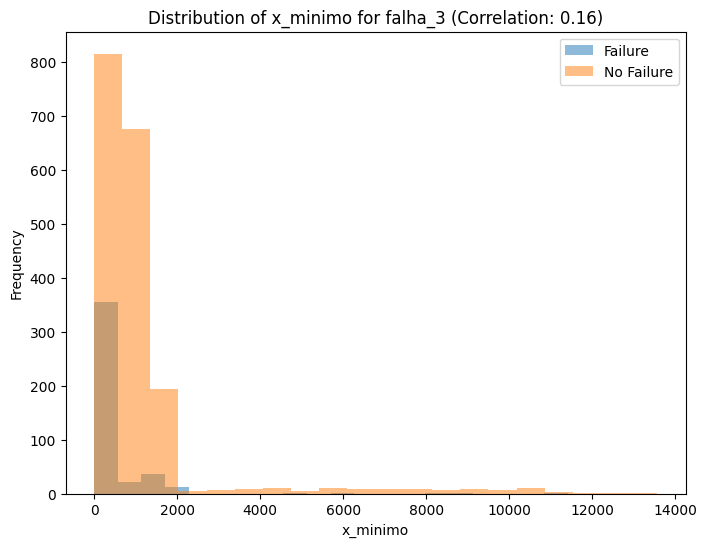

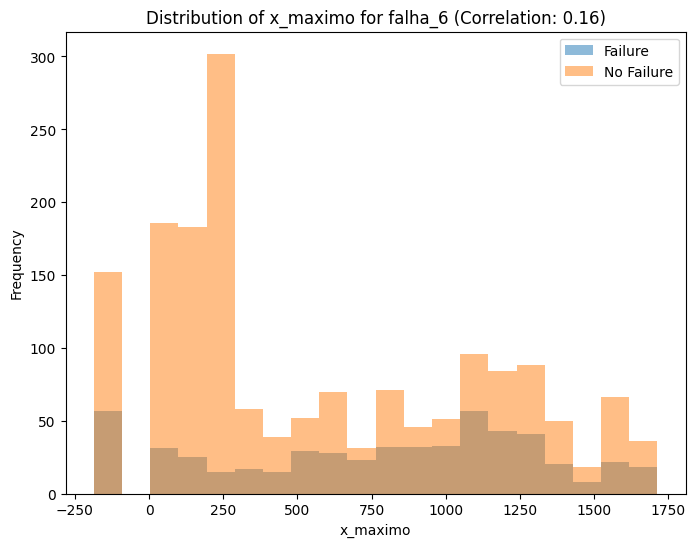

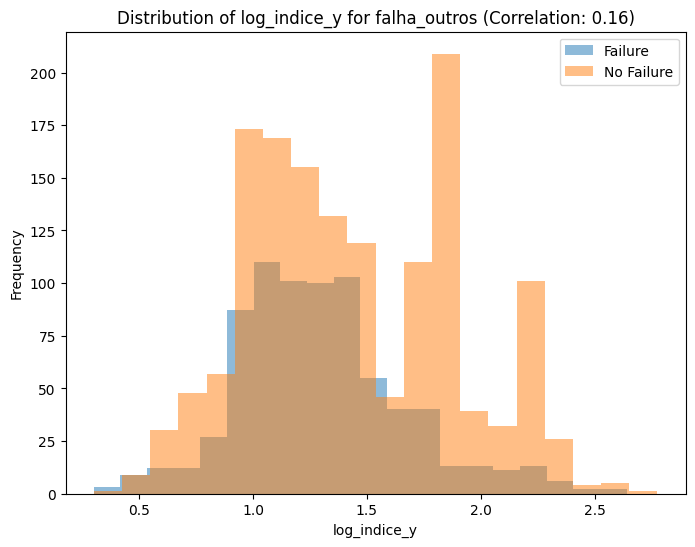

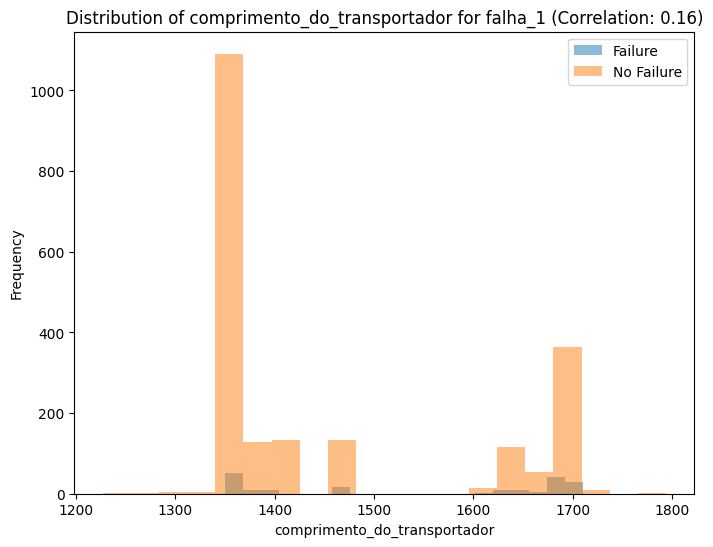

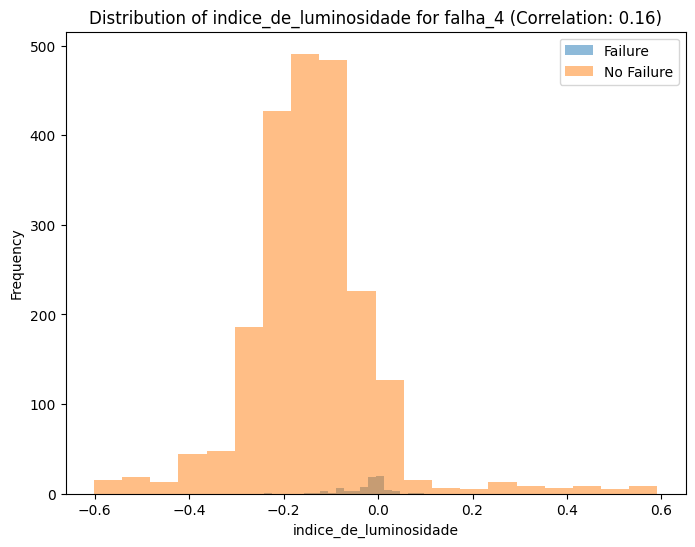

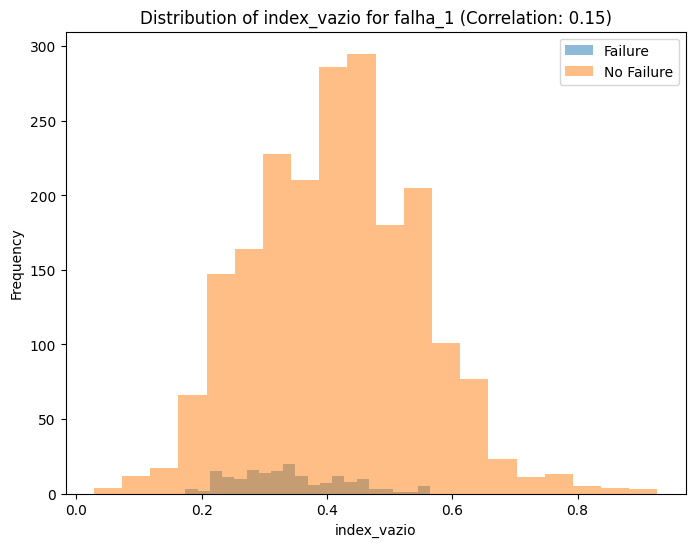

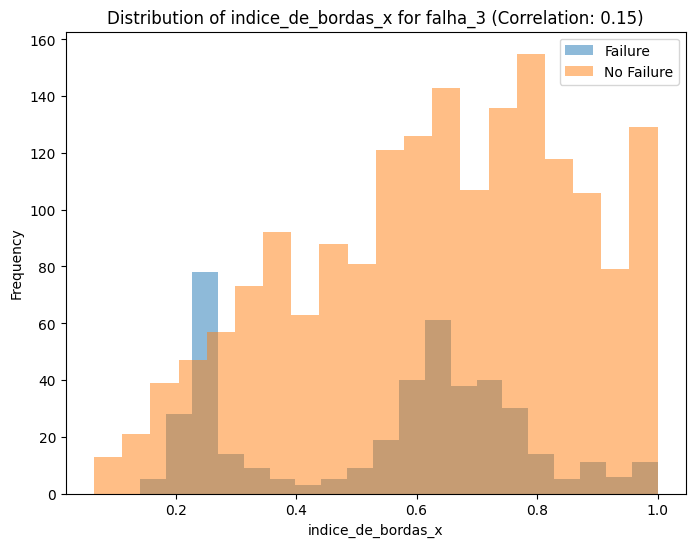

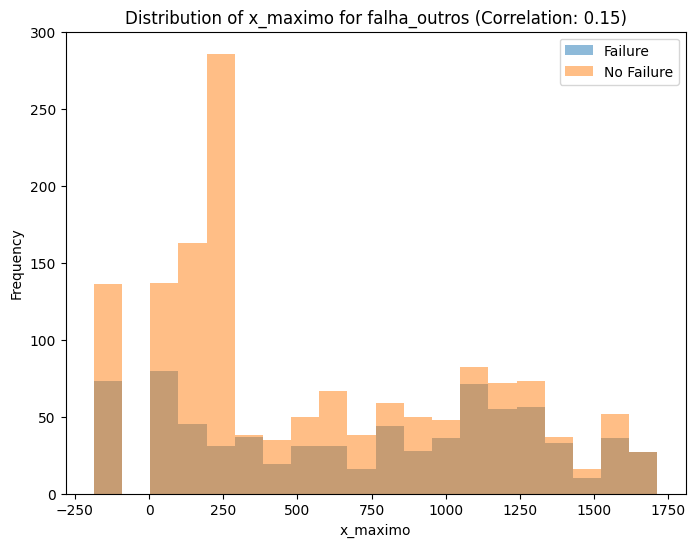

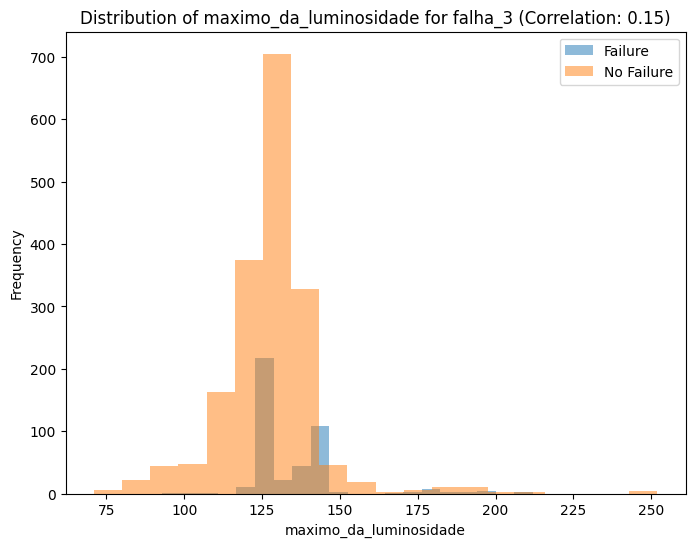

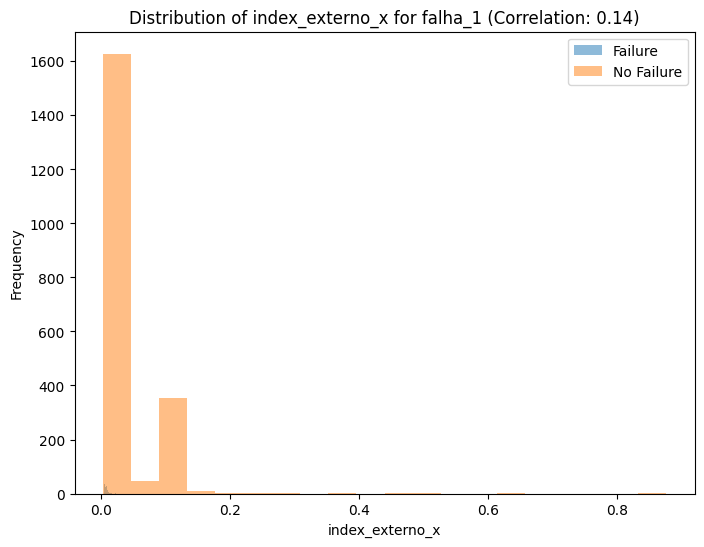

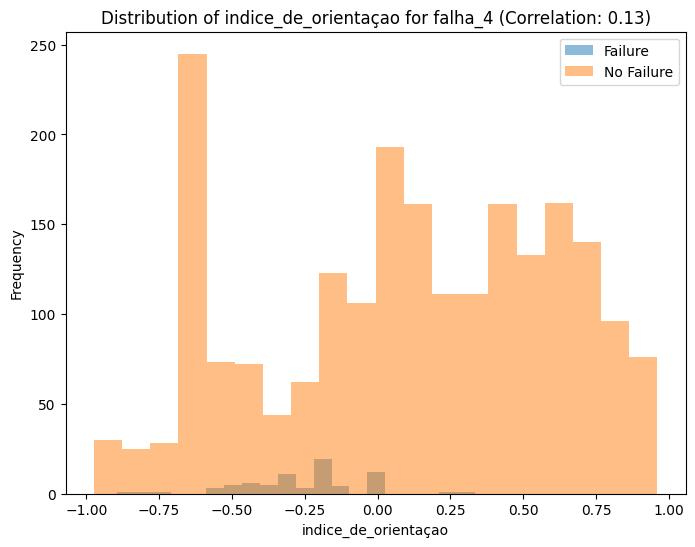

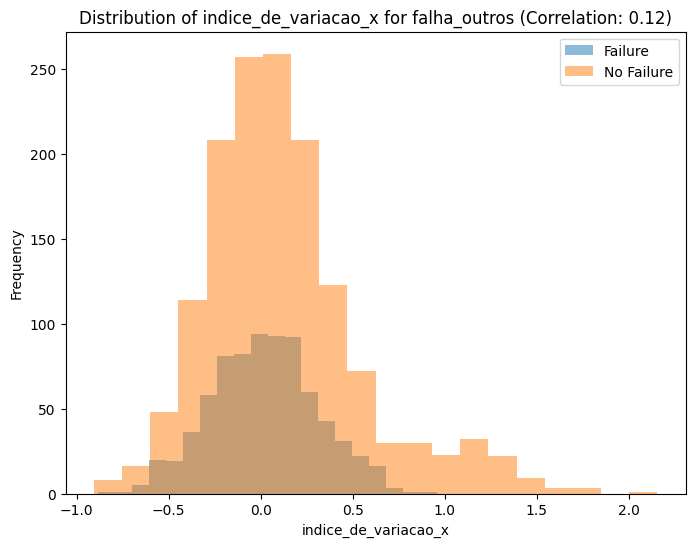

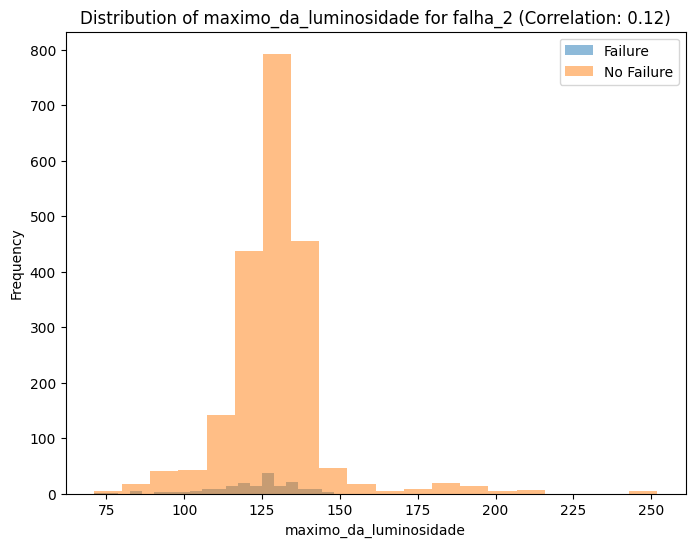

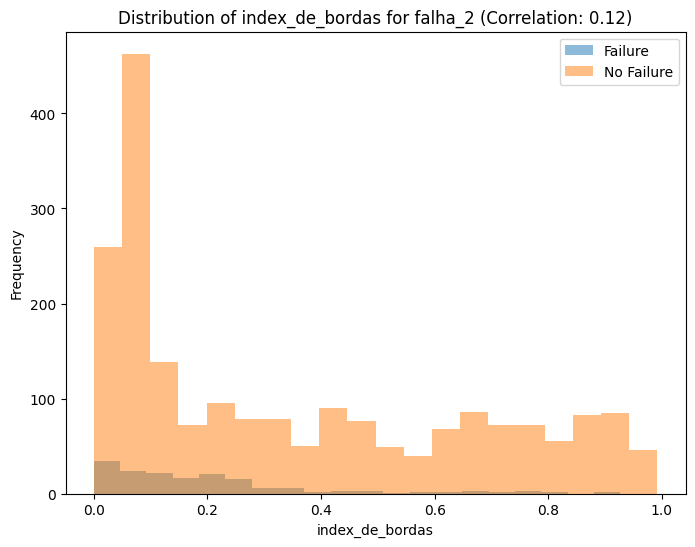

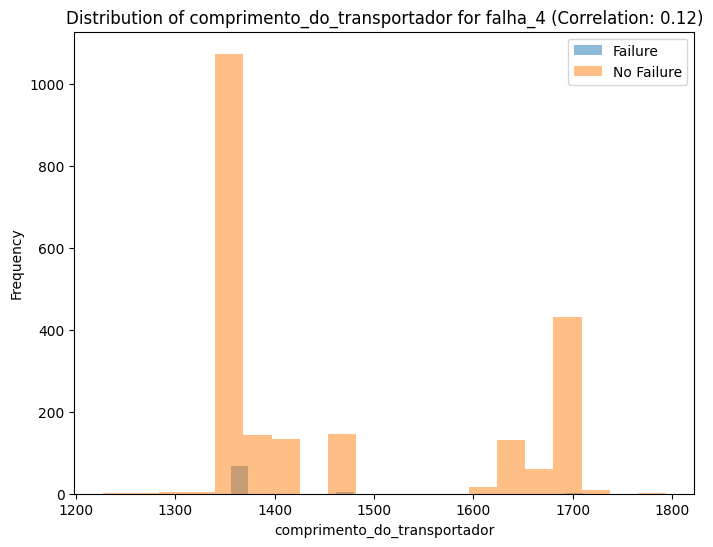

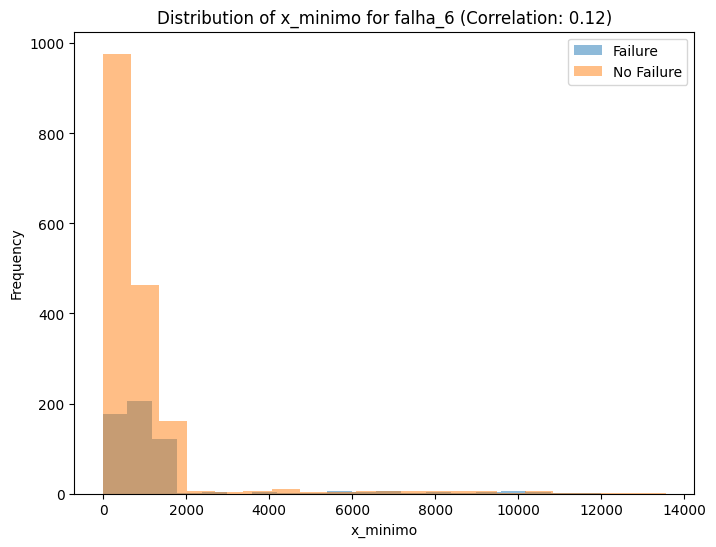

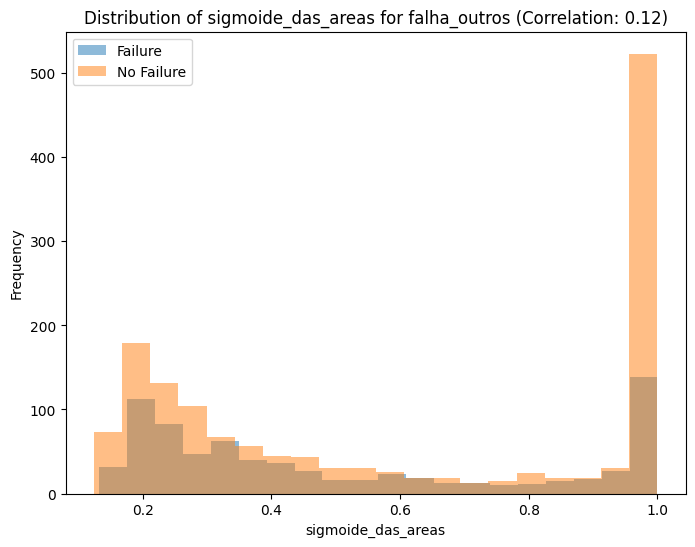

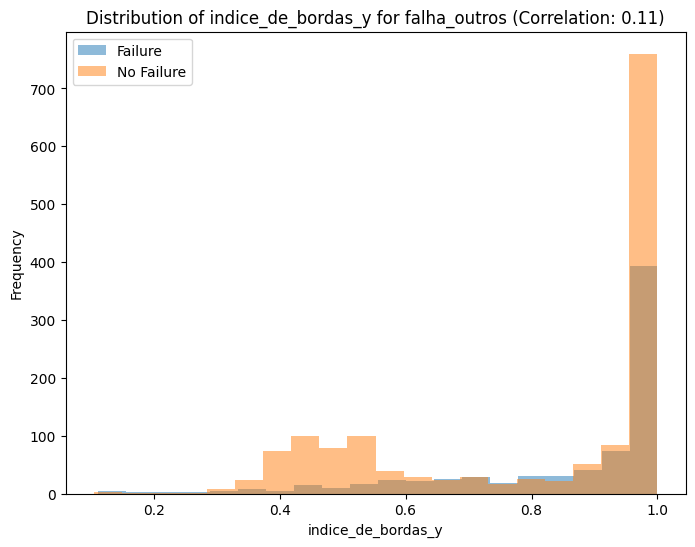

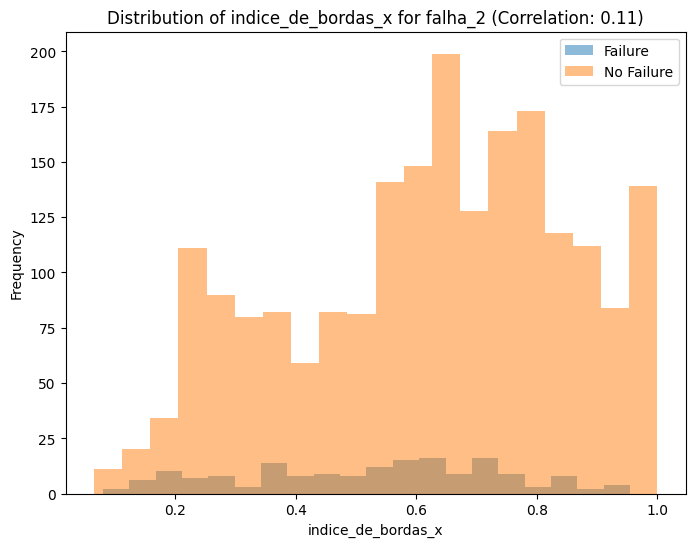

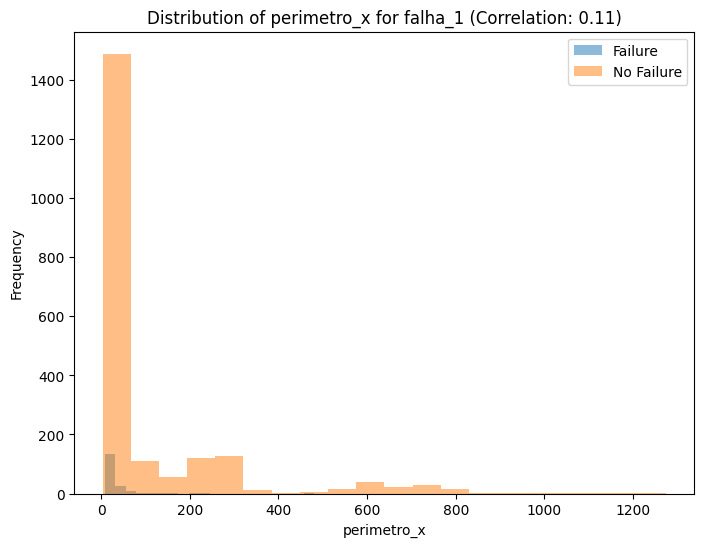

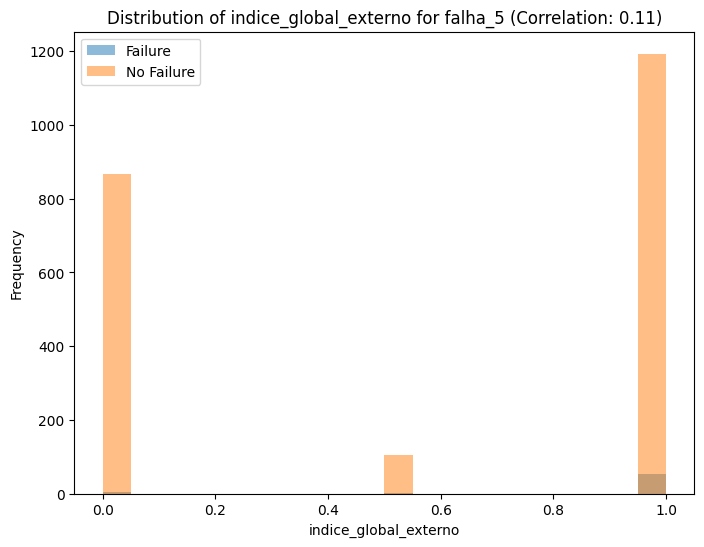

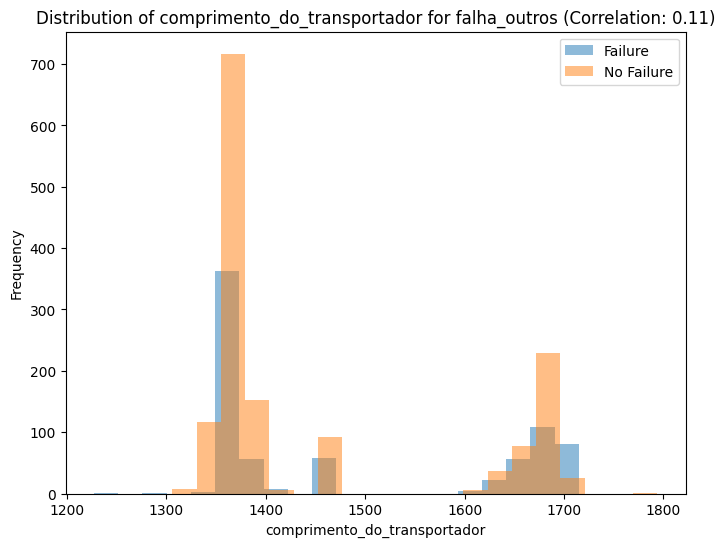

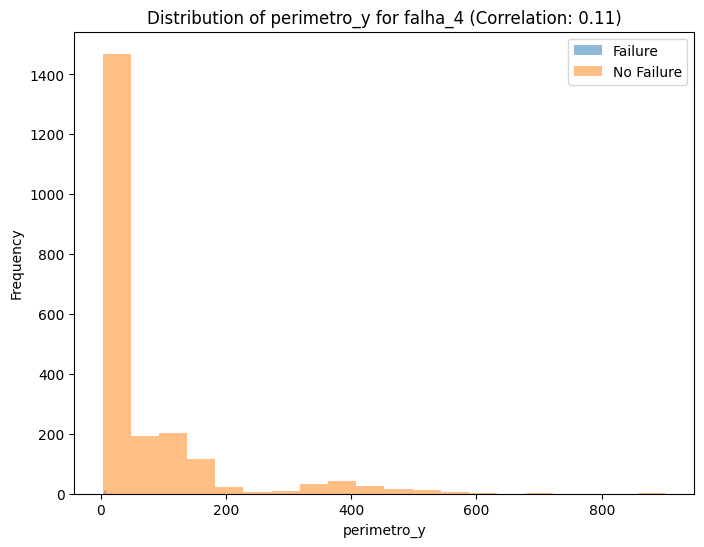

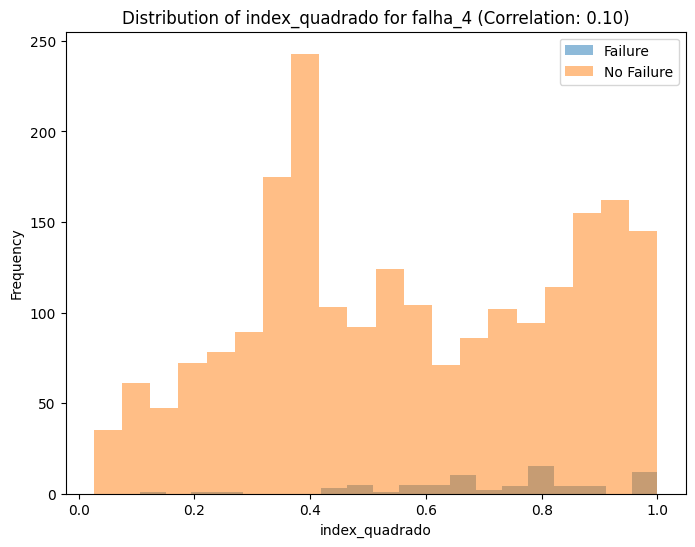

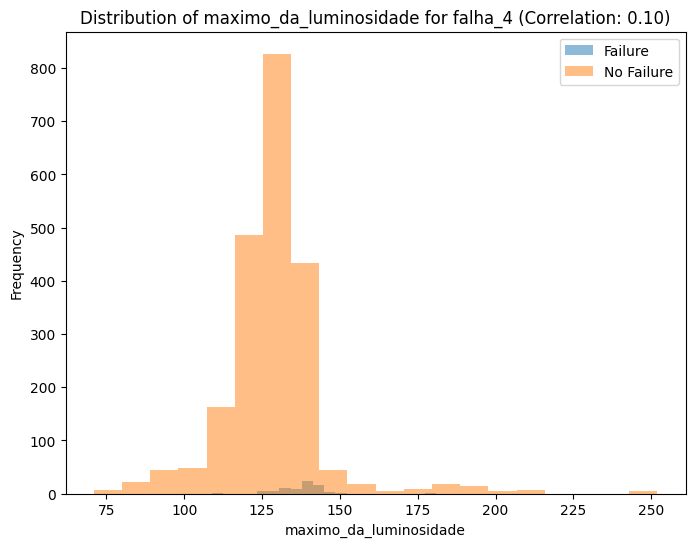

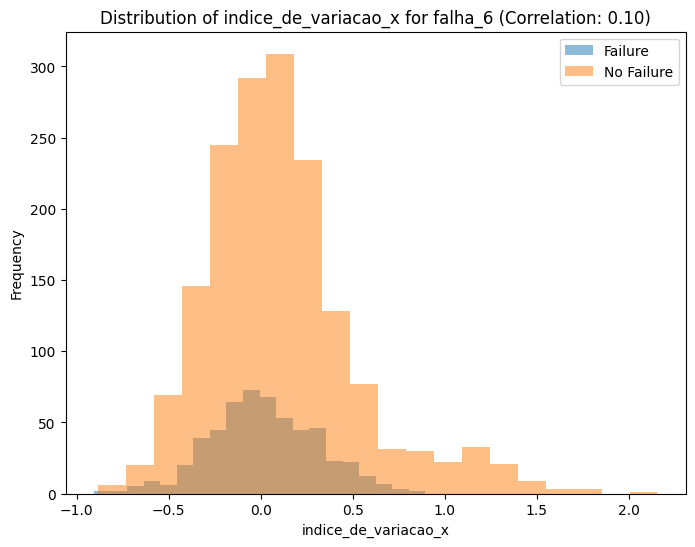

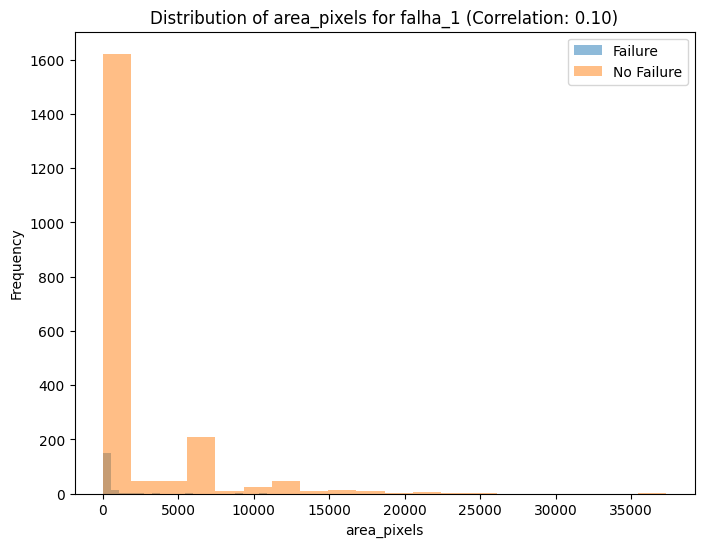

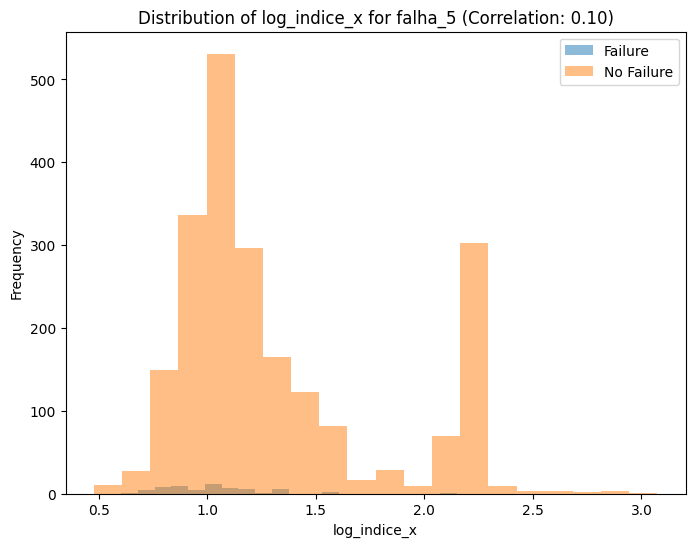

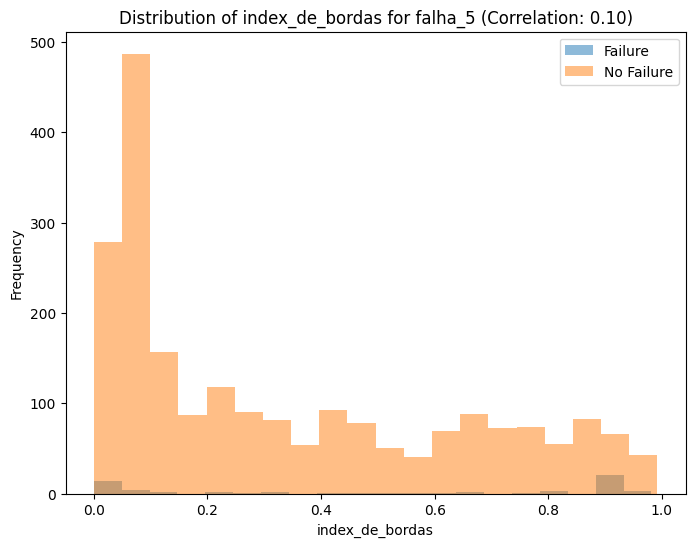

In [110]:

# Histograma da correlação de falhas

failure_cols = ['falha_1', 'falha_2', 'falha_3', 'falha_4', 'falha_5', 'falha_6', 'falha_outros']
other_cols = [col for col in df.columns if col not in failure_cols and df[col].dtype != 'bool']

correlations = {}
for failure_col in failure_cols:
    for other_col in other_cols:
        correlation = df[failure_col].corr(df[other_col])
        correlations[(failure_col, other_col)] = abs(correlation)

sorted_correlations = dict(sorted(correlations.items(), key=lambda item: item[1], reverse=True))

correlation_threshold = 0.1

for (failure_col, other_col), correlation in sorted_correlations.items():
  if correlation > correlation_threshold:
    plt.figure(figsize=(8, 6))
    plt.hist(df[df[failure_col] == True][other_col], bins=20, alpha=0.5, label='Failure')
    plt.hist(df[df[failure_col] == False][other_col], bins=20, alpha=0.5, label='No Failure')
    plt.title(f'Distribution of {other_col} for {failure_col} (Correlation: {correlation:.2f})')
    plt.xlabel(other_col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


## Treinamento do modelo

In [157]:

# Treinar o modelo com Random Forest e  Regressão Logística, inclua o multirotulo mostre a acuracia

target_columns = ['falha_1', 'falha_2', 'falha_3', 'falha_4', 'falha_5', 'falha_6', 'falha_outros']

X = df.drop(columns=['id'] + target_columns)

y = df[target_columns]

X_train, X_test, y_train, y_test =
train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = MultiOutputClassifier(RandomForestClassifier(random_state=42))
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

for i, col in enumerate(target_columns):
    rf_accuracy = accuracy_score(y_test[col], rf_predictions[:, i])
    print(f"Random Forest Acuracia: {col}: {rf_accuracy}")

lr_model = MultiOutputClassifier(LogisticRegression(max_iter=1000, random_state=42))
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

for i, col in enumerate(target_columns):
    lr_accuracy = accuracy_score(y_test[col], lr_predictions[:, i])
    print(f"Logistic Regression Acuracia: {col}: {lr_accuracy}")

Random Forest Acuracia: falha_1: 0.9327217125382263
Random Forest Acuracia: falha_2: 0.9877675840978594
Random Forest Acuracia: falha_3: 0.9724770642201835
Random Forest Acuracia: falha_4: 0.9938837920489296
Random Forest Acuracia: falha_5: 0.9785932721712538
Random Forest Acuracia: falha_6: 0.8256880733944955
Random Forest Acuracia: falha_outros: 0.7400611620795107


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/sklearn/

Logistic Regression Acuracia: falha_1: 0.9235474006116208
Logistic Regression Acuracia: falha_2: 0.9235474006116208
Logistic Regression Acuracia: falha_3: 0.9480122324159022
Logistic Regression Acuracia: falha_4: 0.9938837920489296
Logistic Regression Acuracia: falha_5: 0.9694189602446484
Logistic Regression Acuracia: falha_6: 0.7920489296636085
Logistic Regression Acuracia: falha_outros: 0.672782874617737


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [158]:

# Estatisticas de accuracy_score, f1_score, precision_score, recall_score,

for i, col in enumerate(target_columns):

    rf_accuracy = accuracy_score(y_test[col], rf_predictions[:, i])
    rf_f1 = f1_score(y_test[col], rf_predictions[:, i])
    rf_precision = precision_score(y_test[col], rf_predictions[:, i])
    rf_recall = recall_score(y_test[col], rf_predictions[:, i])

    print(f"Random Forest - {col}:")
    print(f"  Accuracy: {rf_accuracy}")
    print(f"  F1 Score: {rf_f1}")
    print(f"  Precision: {rf_precision}")
    print(f"  Recall: {rf_recall}")

    lr_accuracy = accuracy_score(y_test[col], lr_predictions[:, i])
    lr_f1 = f1_score(y_test[col], lr_predictions[:, i])
    lr_precision = precision_score(y_test[col], lr_predictions[:, i])
    lr_recall = recall_score(y_test[col], lr_predictions[:, i])

    print(f"Logistic Regression - {col}:")
    print(f"  Accuracy: {lr_accuracy}")
    print(f"  F1 Score: {lr_f1}")
    print(f"  Precision: {lr_precision}")
    print(f"  Recall: {lr_recall}")


Random Forest - falha_1:
  Accuracy: 0.9327217125382263
  F1 Score: 0.21428571428571427
  Precision: 0.75
  Recall: 0.125
Logistic Regression - falha_1:
  Accuracy: 0.9235474006116208
  F1 Score: 0.0
  Precision: 0.0
  Recall: 0.0
Random Forest - falha_2:
  Accuracy: 0.9877675840978594
  F1 Score: 0.9166666666666666
  Precision: 0.9565217391304348
  Recall: 0.88
Logistic Regression - falha_2:
  Accuracy: 0.9235474006116208
  F1 Score: 0.0
  Precision: 0.0
  Recall: 0.0
Random Forest - falha_3:
  Accuracy: 0.9724770642201835
  F1 Score: 0.9291338582677166
  Precision: 0.9833333333333333
  Recall: 0.8805970149253731
Logistic Regression - falha_3:
  Accuracy: 0.9480122324159022
  F1 Score: 0.859504132231405
  Precision: 0.9629629629629629
  Recall: 0.7761194029850746
Random Forest - falha_4:
  Accuracy: 0.9938837920489296
  F1 Score: 0.8333333333333334
  Precision: 1.0
  Recall: 0.7142857142857143
Logistic Regression - falha_4:
  Accuracy: 0.9938837920489296
  F1 Score: 0.8333333333333334

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



Random Forest - falha_5:
  Accuracy: 0.9785932721712538
  F1 Score: 0.46153846153846156
  Precision: 1.0
  Recall: 0.3
Logistic Regression - falha_5:
  Accuracy: 0.9694189602446484
  F1 Score: 0.0
  Precision: 0.0
  Recall: 0.0
Random Forest - falha_6:
  Accuracy: 0.8256880733944955
  F1 Score: 0.45714285714285713
  Precision: 0.6486486486486487
  Recall: 0.35294117647058826
Logistic Regression - falha_6:
  Accuracy: 0.7920489296636085
  F1 Score: 0.0
  Precision: 0.0
  Recall: 0.0
Random Forest - falha_outros:
  Accuracy: 0.7400611620795107
  F1 Score: 0.5853658536585366
  Precision: 0.7407407407407407
  Recall: 0.4838709677419355
Logistic Regression - falha_outros:
  Accuracy: 0.672782874617737
  F1 Score: 0.3515151515151515
  Precision: 0.7073170731707317
  Recall: 0.23387096774193547


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



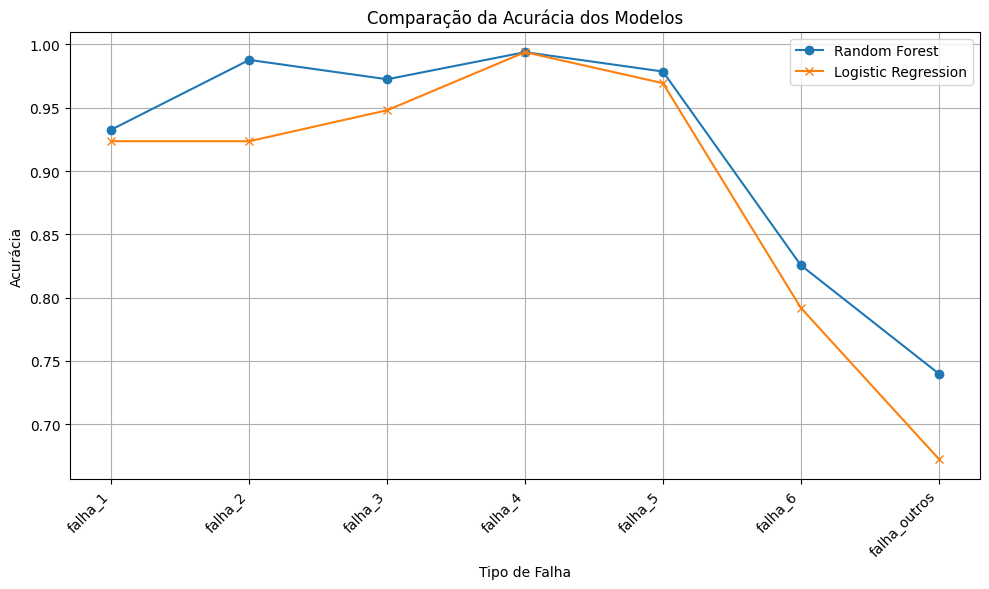

In [159]:

#Gráfico comparativo dos métodos de aprendizagem

rf_accuracies = []
lr_accuracies = []

for i, col in enumerate(target_columns):
    # Random Forest
    rf_accuracy = accuracy_score(y_test[col], rf_predictions[:, i])
    rf_accuracies.append(rf_accuracy)

    # Logistic Regression
    lr_accuracy = accuracy_score(y_test[col], lr_predictions[:, i])
    lr_accuracies.append(lr_accuracy)

x = range(len(target_columns))
plt.figure(figsize=(10, 6))
plt.plot(x, rf_accuracies, marker='o', label='Random Forest')
plt.plot(x, lr_accuracies, marker='x', label='Logistic Regression')
plt.xlabel("Tipo de Falha")
plt.ylabel("Acurácia")
plt.title("Comparação da Acurácia dos Modelos")
plt.xticks(x, target_columns, rotation=45, ha="right")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Validação da aprendizagem

In [ ]:

# Verificação e aferição da aprendizagem

caminho_drive_test = '/content/drive/MyDrive/IA/DataSetTrabalho/bootcamp_test.csv'
df_test = pd.read_csv(caminho_drive_test)

colunas_falhas_test = [col for col in df_test.columns if "falha" in col]
df_test[colunas_falhas_test] = df_test[colunas_falhas_test].applymap(
    lambda x: str(x).strip().lower() in ['true', '1', 'sim', 'yes']
)

colunas_falhas_test = [col for col in df_test.columns if "tipo_do_aço" in col]
df_test[colunas_falhas_test] = df_test[colunas_falhas_test].applymap(
    lambda x: str(x).strip().lower() in ['true', '1', 'sim', 'yes']
)

df_test = df_test[
    ~((df_test['tipo_do_aço_A300'] == True) & (df_test['tipo_do_aço_A400'] == True)) &
    ~((df_test['tipo_do_aço_A300'] == False) & (df_test['tipo_do_aço_A400'] == False))
]

df_test = df_test.dropna()
df_test = df_test.replace('', np.nan).dropna()

mean_comprimento_test = df_test.loc[df_test['comprimento_do_transportador'] >= 0, 'comprimento_do_transportador'].mean()
df_test.loc[df_test['comprimento_do_transportador'] < 0, 'comprimento_do_transportador'] = mean_comprimento_test

mean_espessura_test = df_test.loc[df_test['espessura_da_chapa_de_aço'] >= 0, 'espessura_da_chapa_de_aço'].mean()
df_test.loc[df_test['espessura_da_chapa_de_aço'] < 0, 'espessura_da_chapa_de_aço'] = mean_espessura_test

df_test = df_test[(df_test['area_pixels'] >= 0) & (df_test['perimetro_x'] >= 0) & (df_test['perimetro_y'] >= 0)]

numerical_cols_to_scale = ['area_pixels', 'perimetro_x', 'perimetro_y',
                           'comprimento_do_transportador', 'espessura_da_chapa_de_aço',
                           'temperatura']
df_test_scaled = df_test.copy()
df_test_scaled[numerical_cols_to_scale] = scaler.transform(df_test[numerical_cols_to_scale])

if 'peso_da_placa' in df_test_scaled.columns:
    df_test_scaled = df_test_scaled.drop('peso_da_placa', axis=1)

X_test_final = df_test_scaled.drop(columns=['id'])

test_predictions = rf_model.predict(X_test_final)

test_predictions

<ipython-input-59-6bdbef32d4d8>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-59-6bdbef32d4d8>:16: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-59-6bdbef32d4d8>:32: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1465.5809768637532' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

<ipython-input-59-6bdbef32d4d8>:35: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '80.73521850899743' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False,  True],
       ...,
       [False, False,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
# Previsões com o modelo treinado

test_predictions = rf_model.predict(X_test_final)

predictions_df = pd.DataFrame(test_predictions, columns=target_columns)

result_df = pd.concat([df_test['id'], predictions_df], axis=1)

result_df

result_df.to_csv('predictions.csv', index=False)


id  falha_1  falha_2  falha_3  falha_4  falha_5  falha_6  falha_outros
0    3390    False    False    False    False    False    False         False
1    3391    False    False    False    False    False    False          True
2    3392    False    False    False    False    False    False          True
3    3393    False    False    False    False    False    False         False
4    3394    False    False    False    False    False    False         False
..    ...      ...      ...      ...      ...      ...      ...           ...
384  3774    False    False    False    False    False    False         False
385  3775    False    False     True    False    False    False         False
386  3776    False    False     True    False    False    False         False
387  3777    False    False    False    False    False    False         False
388  3778    False    False    False    False    False    False         False

[389 rows x 8 columns]

In [162]:
# Analise do desempenho

for i, col in enumerate(target_columns):
    rf_accuracy = accuracy_score(y_test[col], rf_predictions[:, i])
    rf_f1 = f1_score(y_test[col], rf_predictions[:, i])
    rf_precision = precision_score(y_test[col], rf_predictions[:, i])
    rf_recall = recall_score(y_test[col], rf_predictions[:, i])
    rf_roc_auc = roc_auc_score(y_test[col], rf_predictions[:, i])

    print(f"Random Forest - {col}:")
    print(f"  Accuracy: {rf_accuracy}")
    print(f"  F1 Score: {rf_f1}")
    print(f"  Precision: {rf_precision}")
    print(f"  Recall: {rf_recall}")
    print(f"  ROC AUC: {rf_roc_auc}")

    lr_accuracy = accuracy_score(y_test[col], lr_predictions[:, i])
    lr_f1 = f1_score(y_test[col], lr_predictions[:, i])
    lr_precision = precision_score(y_test[col], lr_predictions[:, i])
    lr_recall = recall_score(y_test[col], lr_predictions[:, i])
    lr_roc_auc = roc_auc_score(y_test[col], lr_predictions[:, i])

    print(f"Logistic Regression - {col}:")
    print(f"  Accuracy: {lr_accuracy}")
    print(f"  F1 Score: {lr_f1}")
    print(f"  Precision: {lr_precision}")
    print(f"  Recall: {lr_recall}")
    print(f"  ROC AUC: {lr_roc_auc}")


Random Forest - falha_1:
  Accuracy: 0.9327217125382263
  F1 Score: 0.21428571428571427
  Precision: 0.75
  Recall: 0.125
  ROC AUC: 0.5608498349834983
Logistic Regression - falha_1:
  Accuracy: 0.9235474006116208
  F1 Score: 0.0
  Precision: 0.0
  Recall: 0.0
  ROC AUC: 0.49834983498349833
Random Forest - falha_2:
  Accuracy: 0.9877675840978594
  F1 Score: 0.9166666666666666
  Precision: 0.9565217391304348
  Recall: 0.88
  ROC AUC: 0.938344370860927
Logistic Regression - falha_2:
  Accuracy: 0.9235474006116208
  F1 Score: 0.0
  Precision: 0.0
  Recall: 0.0
  ROC AUC: 0.5
Random Forest - falha_3:
  Accuracy: 0.9724770642201835
  F1 Score: 0.9291338582677166
  Precision: 0.9833333333333333
  Recall: 0.8805970149253731
  ROC AUC: 0.9383754305396097
Logistic Regression - falha_3:
  Accuracy: 0.9480122324159022
  F1 Score: 0.859504132231405
  Precision: 0.9629629629629629
  Recall: 0.7761194029850746
  ROC AUC: 0.8842135476463835
Random Forest - falha_4:
  Accuracy: 0.9938837920489296
  F1

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [167]:
# Analise do desempenho

mae_rf = mean_absolute_error(y_test, rf_predictions)
mse_rf = mean_squared_error(y_test, rf_predictions)
r2_rf = r2_score(y_test, rf_predictions)

print("Random Forest:")
print(f"MAE: {mae_rf}")
print(f"MSE: {mse_rf}")
print(f"R²: {r2_rf}")

# Avaliação do modelo Logistic Regression
mae_lr = mean_absolute_error(y_test, lr_predictions)
mse_lr = mean_squared_error(y_test, lr_predictions)
r2_lr = r2_score(y_test, lr_predictions)

print("\nLogistic Regression:")
print(f"MAE: {mae_lr}")
print(f"MSE: {mse_lr}")
print(f"R²: {r2_lr}")


Random Forest:
MAE: 0.08125819134993446
MSE: 0.08125819134993446
R²: 0.35599648500619124

Logistic Regression:
MAE: 0.11096548711227609
MSE: 0.11096548711227609
R²: 0.0711246507761966


Limpeza e Pré-processamento dos Dados:

    Valores Ausentes: Os valores ausentes foram tratados com sucesso ao remover linhas com nulos ou strings vazias.

    Valores Negativos: Foram tratados valores negativos em colunas específicas (comprimento_do_transportador, espessura_da_chapa_de_aço) substituindo-os pela média dos valores positivos nessas colunas. Linhas com valores negativos em outras colunas (area_pixels, perimetro_x, perimetro_y) foram removidas.

    Duplicatas: As linhas duplicadas foram identificadas e tratadas. Não foram encontradas colunas constantes após o processamento inicial. A coluna peso_da_placa foi removida.

    Outliers: Foram detectados e visualizados outliers utilizando boxplots. Alguns outliers foram removidos com base em y_minimo, y_maximo e soma_da_luminosidade, que parecem estar fortemente correlacionados com as falhas. Uma análise mais profunda e tratamento adicional de outliers pode ser benéfica. Considere métodos robustos ou winsorização.

    Engenharia de Atributos: O código faz alguma engenharia básica de atributos (como criação dos perímetros calculados), mas uma criação mais sofisticada pode melhorar a acurácia do modelo. Considere interações entre variáveis, atributos polinomiais ou variáveis derivadas.

    Valores Mínimos/Máximos Inconsistentes: Foram corrigidas as linhas onde os valores mínimos estavam maiores que os máximos.

Análise Exploratória dos Dados (EDA):

    Tipos de Dados: Os dados foram categorizados em tipos numéricos, categóricos e booleanos.

    Análise de Falhas: Foi feita uma análise da distribuição e probabilidades dos diferentes tipos de falha. O código mostra um grande desbalanceamento no conjunto de dados, o que pode impactar o desempenho dos modelos.

    Perímetro e Área: Perímetros calculados foram criados para comparação com os dados existentes.

    Análise de Correlação: Foi examinada a correlação entre as variáveis e os tipos de falha. Os histogramas ajudam a visualizar a relação entre atributos selecionados e as probabilidades de falha. Seria interessante expandir essa análise para mais atributos.

    Análise de Outliers: Foram quantificados e visualizados os outliers, identificando as colunas com maior quantidade de outliers e suas distâncias em relação aos limites. Isso mostra como os outliers podem estar impactando a acurácia do modelo, sendo necessário revisar com cuidado e considerar o conhecimento do domínio para justificar qualquer tratamento.

Treinamento e Avaliação do Modelo:

    Seleção de Modelo: Foram treinados modelos com RandomForestClassifier e LogisticRegression usando MultiOutputClassifier.

    Métricas de Desempenho: Foram calculadas as acurácias para cada tipo de falha, visualizadas para facilitar a revisão. Recomenda-se incorporar métricas como precisão, recall, F1-score, curvas ROC-AUC ou matrizes de confusão para uma compreensão mais completa do desempenho, especialmente com classes desbalanceadas. A precisão e o recall podem ser mais úteis para avaliar predições em classes minoritárias.

    Dados de Teste: Os dados de teste foram pré-processados.

    Previsões: As previsões foram feitas com os dados de teste. Esses resultados devem ser avaliados com base nas métricas apropriadas para a tarefa.

Análises Futuras:

    Importância de Atributos: Analisar a importância das variáveis no modelo de Random Forest para identificar os preditores mais relevantes. Isso pode orientar melhorias na engenharia de atributos.

    Ajuste de Hiperparâmetros: Explorar o ajuste de hiperparâmetros nos modelos para potencialmente melhorar o desempenho.

    Seleção de Modelos: Avaliar outros modelos como Gradient Boosting ou Máquinas de Vetores de Suporte (SVM) para encontrar alternativas melhores.

    Classes Desbalanceadas: Considerar técnicas como SMOTE ou ADASYN para aumentar amostras das classes minoritárias e medir o impacto na performance do modelo.

    Métodos de Ensemble: Explorar métodos de ensemble como stacking ou bagging para melhorar o desempenho no conjunto de validação.

    Validação Cruzada: Usar validação cruzada (por exemplo, k-fold) para estimativas mais robustas de desempenho.

    Visualizações: Criar visualizações mais informativas como gráficos de dispersão, mapas de calor ou gráficos de coordenadas paralelas para análise multivariada.

    Conhecimento do Domínio: Discutir os resultados com especialistas da área. Conhecimento de domínio pode revelar relações ou padrões que os modelos não capturam.